# **Instalacion de librerias**

In [1]:
!pip install dask[dataframe]
!pip install lifelines==0.26.0
!pip install biopython
!pip install padelpy
!pip install padel-pywrapper
!pip install rdkit
!pip install mol2vec
!pip install rdkit-pypi
!pip install propy3
!pip install PyBioMed
!pip install PyProtein
!pip install bayesian-optimization
!pip install scikit-optimize
!pip install openpyxl
!pip install hyperopt

In [98]:
# librerias para leer datos y archivos
import pandas as pd
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Etapa 1 del desarrollo: Recopilación y Filtrado de Datos.

## clonación de iobpdb_app y lectura de bases de datos

In [49]:
!git clone https://github.com/sshuklz/iobpdb_app.git

Clonando en 'iobpdb_app'...
remote: Enumerating objects: 1268, done.
remote: Counting objects: 100% (145/145), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 1268 (delta 70), reused 96 (delta 44), pack-reused 1123 (from 1)
Recibiendo objetos: 100% (1268/1268), 213.01 MiB | 14.84 MiB/s, listo.
Resolviendo deltas: 100% (87/87), listo.


In [4]:
OBP_info_new = pd.read_csv("iobpdb_app/OBP_info_new.csv")
OBP_info = pd.read_csv("iobpdb_app/OBP_info_new.csv")
Compound_info = pd.read_csv('iobpdb_app/Compound_info.csv')
Compound_OBP_binding = pd.read_csv('iobpdb_app/Compound_OBP_binding.csv')

In [5]:
OBP_info

,Binding Protein Name,Binding Protein Type,Source(s),Binding Assay,Binding Value: Units,Species,AA Sequence,AA Sequence W/O signal peptide,Cystine count,Accession number / ID,UniProtID,RCSBPDB entry,SwissModel,Alphafold
0,AaegOBP22,Classic OBP,10.1016/j.pep.2010.09.004,1-NPN,Ki:(μM),Aedes aegypti,MKVFIAVFALIAVAAAEFTVSTTEDLQRYRTECVSSLNIPADYVEK...,EFTVSTTEDLQRYRTECVSSLNIPADYVEKFKKWEFPEDDTTMCYI...,6,EAT42725,Q178S7,-,Q178S7.pdb,AaegOBP22.pdb
1,AbamOBP28,Classic OBP,10.1002/ps.6319,1-NPN,Ki:(μM),Aenasius bambawalei,MKIEIAIVILCIASITLAEIPEEHKKKLKPHQDACLAENGLTEDVL...,EIPEEHKKKLKPHQDACLAENGLTEDVLKEAEMKKMYPTDGSLDCF...,6,-,-,-,-,AbamOBP28.pdb
2,AcerASP1,OBP,10.16380/j.kcxb.2016.01.004,1-NPN,Ki:(μM),Apis cerana,MVSNTKQSFICSVVLLCLETIFVNAAPDWVPPEVFDMVAEDKARCM...,APDWVPPEVFDMVAEDKARCMGEHGTTQAQIDEVDKGNLVNEPSIT...,6,ABD97847,Q1W1D7,-,Q1W1D7.pdb,AcerASP1.pdb
3,AcerCSP1,CSP,10.1016/j.cbpb.2015.11.014,1-NPN,Ki:(μM),Apis cerana,MRHNYIVILILSLLTWTYAEELYSDKYDYVNIDEILANDRLRNQYY...,EELYSDKYDYVNIDEILANDRLRNQYYDCFIDAGPCLTPDSVFFKS...,4,ACI03402,B5U1R4,-,-,AcerCSP1.pdb
4,AcerCSP2,CSP,10.1016/j.cbpb.2015.11.014,1-NPN,Ki:(μM),Apis cerana,MASAIKALLIVCALLVYTVTAETEEGQSGRSRVSDEQLNMALSDQR...,ETEEGQSGRSRVSDEQLNMALSDQRYLRRQLKCALGEAPCDPVGRR...,4,ACI03403,B5U1R5,-,-,AcerCSP2.pdb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,TjapOBP1,Classic OBP,10.3389/fphys.2020.01058,1-NPN,Ki:(μM),Trissolcus japonicus,MKFFIAVFALCIVGALGALTDEQKAKLKEHKEHCFTETGVDPAVVE...,ALTDEQKAKLKEHKEHCFTETGVDPAVVENVKKGQFVQDPKLACFT...,6,QNC49766,A0A7G6J4J7,-,-,TjapOBP1.pdb
432,TjapOBP2,Classic OBP,10.3389/fphys.2020.01058,1-NPN,Ki:(μM),Trissolcus japonicus,MSRTFFNAVVCVAVLQATLVIAKRPDFIDDDMMEMIKEDKTQCMQE...,KRPDFIDDDMMEMIKEDKTQCMQEHGTTEDMIEKASERNVANDPHI...,7,QNC49767,A0A7G6J4J8,-,-,TjapOBP2.pdb
433,TjapOBP3,Classic OBP,10.3389/fphys.2020.01058,1-NPN,Ki:(μM),Trissolcus japonicus,MRFYGVVTLLLTTVFLINVECKLSVPQLKGMIAKLKGSCLKKTGAS...,KLSVPQLKGMIAKLKGSCLKKTGASEEFLASAHEGNFIDDQNFACF...,6,QNC49768,A0A7G6J4J9,-,-,TjapOBP3.pdb
434,TputCSP1,CSP,10.1002/ps.4178,1-NPN,Ki:(μM),Tyrophagus putrescentiae,MKYLAAFVFAVVVAVSFARPEEKYTTKYDGVDVDEILKSDRLFNNY...,RPEEKYTTKYDGVDVDEILKSDRLFNNYFKCLMDKGKCTPDGSELK...,4,ALJ06890,A0A162J9G6,-,-,TputCSP1.pdb


In [6]:
OBP_info_new

,Binding Protein Name,Binding Protein Type,Source(s),Binding Assay,Binding Value: Units,Species,AA Sequence,AA Sequence W/O signal peptide,Cystine count,Accession number / ID,UniProtID,RCSBPDB entry,SwissModel,Alphafold
0,AaegOBP22,Classic OBP,10.1016/j.pep.2010.09.004,1-NPN,Ki:(μM),Aedes aegypti,MKVFIAVFALIAVAAAEFTVSTTEDLQRYRTECVSSLNIPADYVEK...,EFTVSTTEDLQRYRTECVSSLNIPADYVEKFKKWEFPEDDTTMCYI...,6,EAT42725,Q178S7,-,Q178S7.pdb,AaegOBP22.pdb
1,AbamOBP28,Classic OBP,10.1002/ps.6319,1-NPN,Ki:(μM),Aenasius bambawalei,MKIEIAIVILCIASITLAEIPEEHKKKLKPHQDACLAENGLTEDVL...,EIPEEHKKKLKPHQDACLAENGLTEDVLKEAEMKKMYPTDGSLDCF...,6,-,-,-,-,AbamOBP28.pdb
2,AcerASP1,OBP,10.16380/j.kcxb.2016.01.004,1-NPN,Ki:(μM),Apis cerana,MVSNTKQSFICSVVLLCLETIFVNAAPDWVPPEVFDMVAEDKARCM...,APDWVPPEVFDMVAEDKARCMGEHGTTQAQIDEVDKGNLVNEPSIT...,6,ABD97847,Q1W1D7,-,Q1W1D7.pdb,AcerASP1.pdb
3,AcerCSP1,CSP,10.1016/j.cbpb.2015.11.014,1-NPN,Ki:(μM),Apis cerana,MRHNYIVILILSLLTWTYAEELYSDKYDYVNIDEILANDRLRNQYY...,EELYSDKYDYVNIDEILANDRLRNQYYDCFIDAGPCLTPDSVFFKS...,4,ACI03402,B5U1R4,-,-,AcerCSP1.pdb
4,AcerCSP2,CSP,10.1016/j.cbpb.2015.11.014,1-NPN,Ki:(μM),Apis cerana,MASAIKALLIVCALLVYTVTAETEEGQSGRSRVSDEQLNMALSDQR...,ETEEGQSGRSRVSDEQLNMALSDQRYLRRQLKCALGEAPCDPVGRR...,4,ACI03403,B5U1R5,-,-,AcerCSP2.pdb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,TjapOBP1,Classic OBP,10.3389/fphys.2020.01058,1-NPN,Ki:(μM),Trissolcus japonicus,MKFFIAVFALCIVGALGALTDEQKAKLKEHKEHCFTETGVDPAVVE...,ALTDEQKAKLKEHKEHCFTETGVDPAVVENVKKGQFVQDPKLACFT...,6,QNC49766,A0A7G6J4J7,-,-,TjapOBP1.pdb
432,TjapOBP2,Classic OBP,10.3389/fphys.2020.01058,1-NPN,Ki:(μM),Trissolcus japonicus,MSRTFFNAVVCVAVLQATLVIAKRPDFIDDDMMEMIKEDKTQCMQE...,KRPDFIDDDMMEMIKEDKTQCMQEHGTTEDMIEKASERNVANDPHI...,7,QNC49767,A0A7G6J4J8,-,-,TjapOBP2.pdb
433,TjapOBP3,Classic OBP,10.3389/fphys.2020.01058,1-NPN,Ki:(μM),Trissolcus japonicus,MRFYGVVTLLLTTVFLINVECKLSVPQLKGMIAKLKGSCLKKTGAS...,KLSVPQLKGMIAKLKGSCLKKTGASEEFLASAHEGNFIDDQNFACF...,6,QNC49768,A0A7G6J4J9,-,-,TjapOBP3.pdb
434,TputCSP1,CSP,10.1002/ps.4178,1-NPN,Ki:(μM),Tyrophagus putrescentiae,MKYLAAFVFAVVVAVSFARPEEKYTTKYDGVDVDEILKSDRLFNNY...,RPEEKYTTKYDGVDVDEILKSDRLFNNYFKCLMDKGKCTPDGSELK...,4,ALJ06890,A0A162J9G6,-,-,TputCSP1.pdb


In [7]:
Compound_info

,CAS-number,Compound name,OBPs,Molecular formula,Smiles,acetylenic carbon,aldehyde,amide,amino acid,azo nitrogen,...,Streptococus pneumoniae,Clostridium difficile,Mycobaterium Tuberculosis,Haemophilus Influenzae,Escherichia coli,Klebisiella pneumoniae,Pseudomonas aeruginosa,COPD,Lung cancer,Asthma
0,79-77-6,ionone (beta),127,C13H20O,CC(=O)/C=C/C1=C(C)CCCC1(C)C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,123-35-3,"beta-myrcene / 7-methyl-3-methylene-1,6-octad...",75,C10H16,CC(C)=CCCC(=C)C=C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100-52-7,benzaldehyde,72,C7H6O,O=Cc1ccccc1,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN
3,928-96-1,Z-3-hexen-1-ol / cis-3-Hexen-1-ol,72,C6H12O,CC\C=C/CCO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6728-26-3,(E)-2-Hexenal,71,C6H10O,CCC/C=C/C=O,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,17302-01-1,3-ethyl-3-methylheptane,1,C10H22,CCCCC(C)(CC)CC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,4032-94-4,"2,4-Dimethyloctane",1,C10H22,CCCCC(C)CC(C)C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,592-82-5,butylisothiocyanate,1,C5H9NS,CCCCN=C=S,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,556-61-6,isothiocyanatomethane,1,C2H3NS,CN=C=S,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
Compound_OBP_binding

,CAS-number,Compound name,AaegOBP22,AbamOBP28,AcerASP1,AcerCSP1,AcerCSP2,AcerCSP3,AcerCSP4,AcerOBP2,...,SzeaOBP1,SzeaOBP28,TintPBP1,TintPBP2,TintPBP3,TjapOBP1,TjapOBP2,TjapOBP3,TputCSP1,TputCSP2
0,765-17-3,"Bombykol / (10E,12Z)-hexadeca-10,12-dien-1-ol",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6186-98-7,11-cis-Vaccenyl acetate / cis-Vaccenyl acetate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,79-77-6,ionone (beta),NaN,NaN,14.69,1.54,7.33,23.07,7.76,4.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,123-35-3,"beta-myrcene / 7-methyl-3-methylene-1,6-octad...",NaN,9.05,NaN,NaN,NaN,NaN,NaN,NaN,...,30.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100-52-7,benzaldehyde,NaN,>50,NaN,NaN,NaN,NaN,NaN,NaN,...,4.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.91,523.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,17302-01-1,3-ethyl-3-methylheptane,NaN,22.89,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,4032-94-4,"2,4-Dimethyloctane",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,592-82-5,butylisothiocyanate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,556-61-6,isothiocyanatomethane,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Concatenación de Compound_info y Compound_OBP_binding

In [9]:
df1 = Compound_OBP_binding
df2 = Compound_info

# Reordenar df2 para que coincida con el orden de df1 utilizando la columna 'key'
df1_sorted = df1.set_index(['CAS-number', 'Compound name']).reindex(df2.set_index(['CAS-number', 'Compound name']).index).reset_index()


# Concatenar los DataFrames reordenados
#result = pd.concat([df1, df2_sorted.drop(columns=['Compound name'])], axis=1)
Compounds_df = pd.concat([df2, df1_sorted.drop(columns=['CAS-number', 'Compound name'])], axis=1)
Compounds_df

,CAS-number,Compound name,OBPs,Molecular formula,Smiles,acetylenic carbon,aldehyde,amide,amino acid,azo nitrogen,...,SzeaOBP1,SzeaOBP28,TintPBP1,TintPBP2,TintPBP3,TjapOBP1,TjapOBP2,TjapOBP3,TputCSP1,TputCSP2
0,79-77-6,ionone (beta),127,C13H20O,CC(=O)/C=C/C1=C(C)CCCC1(C)C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,123-35-3,"beta-myrcene / 7-methyl-3-methylene-1,6-octad...",75,C10H16,CC(C)=CCCC(=C)C=C,NaN,NaN,NaN,NaN,NaN,...,30.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100-52-7,benzaldehyde,72,C7H6O,O=Cc1ccccc1,NaN,Yes,NaN,NaN,NaN,...,4.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.91,523.14
3,928-96-1,Z-3-hexen-1-ol / cis-3-Hexen-1-ol,72,C6H12O,CC\C=C/CCO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6728-26-3,(E)-2-Hexenal,71,C6H10O,CCC/C=C/C=O,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,17302-01-1,3-ethyl-3-methylheptane,1,C10H22,CCCCC(C)(CC)CC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,4032-94-4,"2,4-Dimethyloctane",1,C10H22,CCCCC(C)CC(C)C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,592-82-5,butylisothiocyanate,1,C5H9NS,CCCCN=C=S,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,556-61-6,isothiocyanatomethane,1,C2H3NS,CN=C=S,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### funcion para reemplazar el simbolo '>' por un espacio en el dataset filtrered_result_unique_smiles

In [10]:
# Definir una función para eliminar el símbolo '>'
def limpiar_simbolo2(valor):
    if isinstance(valor, str):
        valor = valor.strip()  # Eliminar espacios en blanco al inicio y al final
        if '>' in valor:
            valor = valor.replace('>', '')
        if valor == '':
            valor = 0
    return valor

### filtrado de Compounds_df con las proteinas del dataset OBP_info_new

In [11]:
comp_obps1 = Compounds_df

proteins_filtrered = OBP_info_new['Binding Protein Name'].to_list()
df_obps = comp_obps1[proteins_filtrered]

columns_info = Compounds_df.iloc[:, 1:5]
columns_info = columns_info.astype(str)



filtered_df_obps_transformed = df_obps.apply(limpiar_simbolo2)
filtered_df_obps_transformed = filtered_df_obps_transformed[filtered_df_obps_transformed[proteins_filtrered].notnull().any(axis=1)]


df_obps_covs_info = pd.concat([columns_info, filtered_df_obps_transformed], axis=1)

#dfs_info = dfs_info[dfs_info[proteins_filter1].notnull().any(axis=1)]

#dfs_info_transformed = dfs_info.applymap(lambda x: x if pd.notnull(x) else 10000)
#dfs_info_transformed.reset_index(drop=True, inplace=True)

df_obps_covs_info

,Compound name,OBPs,Molecular formula,Smiles,AaegOBP22,AbamOBP28,AcerASP1,AcerCSP1,AcerCSP2,AcerCSP3,...,SzeaOBP1,SzeaOBP28,TintPBP1,TintPBP2,TintPBP3,TjapOBP1,TjapOBP2,TjapOBP3,TputCSP1,TputCSP2
0,ionone (beta),127,C13H20O,CC(=O)/C=C/C1=C(C)CCCC1(C)C,NaN,NaN,14.69,1.54,7.33,23.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"beta-myrcene / 7-methyl-3-methylene-1,6-octad...",75,C10H16,CC(C)=CCCC(=C)C=C,NaN,9.05,NaN,NaN,NaN,NaN,...,30.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,benzaldehyde,72,C7H6O,O=Cc1ccccc1,NaN,>50,NaN,NaN,NaN,NaN,...,4.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.91,523.14
3,Z-3-hexen-1-ol / cis-3-Hexen-1-ol,72,C6H12O,CC\C=C/CCO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(E)-2-Hexenal,71,C6H10O,CCC/C=C/C=O,NaN,27.31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,3-ethyl-3-methylheptane,1,C10H22,CCCCC(C)(CC)CC,NaN,22.89,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,"2,4-Dimethyloctane",1,C10H22,CCCCC(C)CC(C)C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,butylisothiocyanate,1,C5H9NS,CCCCN=C=S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,isothiocyanatomethane,1,C2H3NS,CN=C=S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### grupos funcionales de los compuestos (opcional)


In [12]:
groups_functionals_covs = Compounds_df.iloc[:, :70]
groups_functionals_covs

,CAS-number,Compound name,OBPs,Molecular formula,Smiles,acetylenic carbon,aldehyde,amide,amino acid,azo nitrogen,...,Streptococus pneumoniae,Clostridium difficile,Mycobaterium Tuberculosis,Haemophilus Influenzae,Escherichia coli,Klebisiella pneumoniae,Pseudomonas aeruginosa,COPD,Lung cancer,Asthma
0,79-77-6,ionone (beta),127,C13H20O,CC(=O)/C=C/C1=C(C)CCCC1(C)C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,123-35-3,"beta-myrcene / 7-methyl-3-methylene-1,6-octad...",75,C10H16,CC(C)=CCCC(=C)C=C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100-52-7,benzaldehyde,72,C7H6O,O=Cc1ccccc1,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN
3,928-96-1,Z-3-hexen-1-ol / cis-3-Hexen-1-ol,72,C6H12O,CC\C=C/CCO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6728-26-3,(E)-2-Hexenal,71,C6H10O,CCC/C=C/C=O,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,17302-01-1,3-ethyl-3-methylheptane,1,C10H22,CCCCC(C)(CC)CC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
617,4032-94-4,"2,4-Dimethyloctane",1,C10H22,CCCCC(C)CC(C)C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
618,592-82-5,butylisothiocyanate,1,C5H9NS,CCCCN=C=S,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,556-61-6,isothiocyanatomethane,1,C2H3NS,CN=C=S,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Eliminación de proteínas con secuencias de aminoácidos repetidas

In [13]:
sequences_unique = OBP_info_new['AA Sequence W/O signal peptide'].unique()
seq_OBPs_unique = OBP_info_new.drop_duplicates(subset=['AA Sequence W/O signal peptide'])
seq_OBPs_unique

,Binding Protein Name,Binding Protein Type,Source(s),Binding Assay,Binding Value: Units,Species,AA Sequence,AA Sequence W/O signal peptide,Cystine count,Accession number / ID,UniProtID,RCSBPDB entry,SwissModel,Alphafold
0,AaegOBP22,Classic OBP,10.1016/j.pep.2010.09.004,1-NPN,Ki:(μM),Aedes aegypti,MKVFIAVFALIAVAAAEFTVSTTEDLQRYRTECVSSLNIPADYVEK...,EFTVSTTEDLQRYRTECVSSLNIPADYVEKFKKWEFPEDDTTMCYI...,6,EAT42725,Q178S7,-,Q178S7.pdb,AaegOBP22.pdb
1,AbamOBP28,Classic OBP,10.1002/ps.6319,1-NPN,Ki:(μM),Aenasius bambawalei,MKIEIAIVILCIASITLAEIPEEHKKKLKPHQDACLAENGLTEDVL...,EIPEEHKKKLKPHQDACLAENGLTEDVLKEAEMKKMYPTDGSLDCF...,6,-,-,-,-,AbamOBP28.pdb
2,AcerASP1,OBP,10.16380/j.kcxb.2016.01.004,1-NPN,Ki:(μM),Apis cerana,MVSNTKQSFICSVVLLCLETIFVNAAPDWVPPEVFDMVAEDKARCM...,APDWVPPEVFDMVAEDKARCMGEHGTTQAQIDEVDKGNLVNEPSIT...,6,ABD97847,Q1W1D7,-,Q1W1D7.pdb,AcerASP1.pdb
3,AcerCSP1,CSP,10.1016/j.cbpb.2015.11.014,1-NPN,Ki:(μM),Apis cerana,MRHNYIVILILSLLTWTYAEELYSDKYDYVNIDEILANDRLRNQYY...,EELYSDKYDYVNIDEILANDRLRNQYYDCFIDAGPCLTPDSVFFKS...,4,ACI03402,B5U1R4,-,-,AcerCSP1.pdb
4,AcerCSP2,CSP,10.1016/j.cbpb.2015.11.014,1-NPN,Ki:(μM),Apis cerana,MASAIKALLIVCALLVYTVTAETEEGQSGRSRVSDEQLNMALSDQR...,ETEEGQSGRSRVSDEQLNMALSDQRYLRRQLKCALGEAPCDPVGRR...,4,ACI03403,B5U1R5,-,-,AcerCSP2.pdb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,TjapOBP1,Classic OBP,10.3389/fphys.2020.01058,1-NPN,Ki:(μM),Trissolcus japonicus,MKFFIAVFALCIVGALGALTDEQKAKLKEHKEHCFTETGVDPAVVE...,ALTDEQKAKLKEHKEHCFTETGVDPAVVENVKKGQFVQDPKLACFT...,6,QNC49766,A0A7G6J4J7,-,-,TjapOBP1.pdb
432,TjapOBP2,Classic OBP,10.3389/fphys.2020.01058,1-NPN,Ki:(μM),Trissolcus japonicus,MSRTFFNAVVCVAVLQATLVIAKRPDFIDDDMMEMIKEDKTQCMQE...,KRPDFIDDDMMEMIKEDKTQCMQEHGTTEDMIEKASERNVANDPHI...,7,QNC49767,A0A7G6J4J8,-,-,TjapOBP2.pdb
433,TjapOBP3,Classic OBP,10.3389/fphys.2020.01058,1-NPN,Ki:(μM),Trissolcus japonicus,MRFYGVVTLLLTTVFLINVECKLSVPQLKGMIAKLKGSCLKKTGAS...,KLSVPQLKGMIAKLKGSCLKKTGASEEFLASAHEGNFIDDQNFACF...,6,QNC49768,A0A7G6J4J9,-,-,TjapOBP3.pdb
434,TputCSP1,CSP,10.1002/ps.4178,1-NPN,Ki:(μM),Tyrophagus putrescentiae,MKYLAAFVFAVVVAVSFARPEEKYTTKYDGVDVDEILKSDRLFNNY...,RPEEKYTTKYDGVDVDEILKSDRLFNNYFKCLMDKGKCTPDGSELK...,4,ALJ06890,A0A162J9G6,-,-,TputCSP1.pdb


### proteínas que tienen la secuencia de aminoácidos repetida

In [14]:

seq_OBP_unique1 = pd.concat([seq_OBPs_unique, OBP_info_new]).drop_duplicates(keep=False)
seq_OBP_repeat = OBP_info_new[OBP_info_new['AA Sequence W/O signal peptide'].isin(seq_OBP_unique1['AA Sequence W/O signal peptide'])]
# Mostrar el DataFrame resultante
#seq_OBP_unique1[['Binding Protein Name', 'AA Sequence W/O signal peptide']]

seq_OBP_repeat[['Binding Protein Name', 'AA Sequence W/O signal peptide']]

,Binding Protein Name,AA Sequence W/O signal peptide
295,LstiGOBP1 T15A/W43A,DLGVMTDVALGFGQALEQCREESGLSEEKTEEFFHFASEDFKLEAR...
297,LstiGOBP1 W43A,DLGVMTDVALGFGQALEQCREESGLSEEKTEEFFHFASEDFKLEAR...
338,MvitPBP1,SQNVMHKMTVNFAKALEYCKKELNLPDVMNQEFYNFWKEEHELTNR...
340,MvitPBP3,SQNVMHKMTVNFAKALEYCKKELNLPDVMNQEFYNFWKEEHELTNR...


buscar las 4 proteínas en las columnas del dataset df_obps_covs_info y eliminar los compuestos que no tienen interacción con estas proteínas

In [15]:

proteinas_a_buscar = seq_OBP_repeat['Binding Protein Name'].to_list()  # Reemplaza con los nombres de las 4 proteínas que deseas buscar

list = ['Compound name']
ttl = list + proteinas_a_buscar

# Filtrar las columnas del DataFrame df_obps_covs_info para incluir solo las 4 proteínas
df_filtrado = df_obps_covs_info[ttl]

# Eliminar filas donde todas las columnas de las proteínas son NULL
df_filtrado_sin_null = df_filtrado.dropna(subset=proteinas_a_buscar, how='all')

df_filtrado_sin_null


,Compound name,LstiGOBP1 T15A/W43A,LstiGOBP1 W43A,MvitPBP1,MvitPBP3
2,benzaldehyde,>40,18.93,23.63,22.93
4,(E)-2-Hexenal,>40,26.14,NaN,NaN
14,1-hexanol,>40,>40,NaN,NaN
27,dl-limonene,NaN,NaN,26.56,20.94
37,acetophenone,NaN,NaN,23.89,30.15
45,3-phenyl-2-propenal / cinnamaldehyde,>40,16.22,NaN,NaN
46,"butanoic acid, butyl ester / Butyl butyrate",NaN,NaN,23.96,24.23
63,1-heptanol,>40,>40,NaN,NaN
88,2-hydroxybenzaldehyde / Salicylaldehyde,NaN,NaN,25.97,21.20
117,E-11-Tetradecen-1-ol acetate / E11-14:Ac,>40,>40,NaN,NaN


Conteo de interacciones que tiene cada proteína con compuestos

In [16]:

# Crear un diccionario para almacenar la cantidad de filas no nulas por columna
cantidad_filas_por_columna = {}

# Iterar sobre las columnas del DataFrame
for columna in df_filtrado_sin_null.columns:
  # Contar la cantidad de filas no nulas en la columna actual
  cantidad_filas = df_filtrado_sin_null[columna].notna().sum()
  # Almacenar la cantidad en el diccionario
  cantidad_filas_por_columna[columna] = cantidad_filas

# Imprimir el diccionario con la cantidad de filas por columna
cantidad_filas_por_columna


{'Compound name': 22,
 'LstiGOBP1 T15A/W43A': 6,
 'LstiGOBP1 W43A': 6,
 'MvitPBP1': 17,
 'MvitPBP3': 17}

In [17]:
indices_list_repeat = seq_OBP_repeat.index.tolist()
print(indices_list_repeat)

[295, 297, 338, 340]


### Proteínas con Secuencia unica

In [18]:
OBP_seq_unique = OBP_info_new.drop([295, 338])
OBP_seq_unique.reset_index(drop=True, inplace=True)
result_unique_seq = OBP_seq_unique
result_unique_seq

,Binding Protein Name,Binding Protein Type,Source(s),Binding Assay,Binding Value: Units,Species,AA Sequence,AA Sequence W/O signal peptide,Cystine count,Accession number / ID,UniProtID,RCSBPDB entry,SwissModel,Alphafold
0,AaegOBP22,Classic OBP,10.1016/j.pep.2010.09.004,1-NPN,Ki:(μM),Aedes aegypti,MKVFIAVFALIAVAAAEFTVSTTEDLQRYRTECVSSLNIPADYVEK...,EFTVSTTEDLQRYRTECVSSLNIPADYVEKFKKWEFPEDDTTMCYI...,6,EAT42725,Q178S7,-,Q178S7.pdb,AaegOBP22.pdb
1,AbamOBP28,Classic OBP,10.1002/ps.6319,1-NPN,Ki:(μM),Aenasius bambawalei,MKIEIAIVILCIASITLAEIPEEHKKKLKPHQDACLAENGLTEDVL...,EIPEEHKKKLKPHQDACLAENGLTEDVLKEAEMKKMYPTDGSLDCF...,6,-,-,-,-,AbamOBP28.pdb
2,AcerASP1,OBP,10.16380/j.kcxb.2016.01.004,1-NPN,Ki:(μM),Apis cerana,MVSNTKQSFICSVVLLCLETIFVNAAPDWVPPEVFDMVAEDKARCM...,APDWVPPEVFDMVAEDKARCMGEHGTTQAQIDEVDKGNLVNEPSIT...,6,ABD97847,Q1W1D7,-,Q1W1D7.pdb,AcerASP1.pdb
3,AcerCSP1,CSP,10.1016/j.cbpb.2015.11.014,1-NPN,Ki:(μM),Apis cerana,MRHNYIVILILSLLTWTYAEELYSDKYDYVNIDEILANDRLRNQYY...,EELYSDKYDYVNIDEILANDRLRNQYYDCFIDAGPCLTPDSVFFKS...,4,ACI03402,B5U1R4,-,-,AcerCSP1.pdb
4,AcerCSP2,CSP,10.1016/j.cbpb.2015.11.014,1-NPN,Ki:(μM),Apis cerana,MASAIKALLIVCALLVYTVTAETEEGQSGRSRVSDEQLNMALSDQR...,ETEEGQSGRSRVSDEQLNMALSDQRYLRRQLKCALGEAPCDPVGRR...,4,ACI03403,B5U1R5,-,-,AcerCSP2.pdb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
429,TjapOBP1,Classic OBP,10.3389/fphys.2020.01058,1-NPN,Ki:(μM),Trissolcus japonicus,MKFFIAVFALCIVGALGALTDEQKAKLKEHKEHCFTETGVDPAVVE...,ALTDEQKAKLKEHKEHCFTETGVDPAVVENVKKGQFVQDPKLACFT...,6,QNC49766,A0A7G6J4J7,-,-,TjapOBP1.pdb
430,TjapOBP2,Classic OBP,10.3389/fphys.2020.01058,1-NPN,Ki:(μM),Trissolcus japonicus,MSRTFFNAVVCVAVLQATLVIAKRPDFIDDDMMEMIKEDKTQCMQE...,KRPDFIDDDMMEMIKEDKTQCMQEHGTTEDMIEKASERNVANDPHI...,7,QNC49767,A0A7G6J4J8,-,-,TjapOBP2.pdb
431,TjapOBP3,Classic OBP,10.3389/fphys.2020.01058,1-NPN,Ki:(μM),Trissolcus japonicus,MRFYGVVTLLLTTVFLINVECKLSVPQLKGMIAKLKGSCLKKTGAS...,KLSVPQLKGMIAKLKGSCLKKTGASEEFLASAHEGNFIDDQNFACF...,6,QNC49768,A0A7G6J4J9,-,-,TjapOBP3.pdb
432,TputCSP1,CSP,10.1002/ps.4178,1-NPN,Ki:(μM),Tyrophagus putrescentiae,MKYLAAFVFAVVVAVSFARPEEKYTTKYDGVDVDEILKSDRLFNNY...,RPEEKYTTKYDGVDVDEILKSDRLFNNYFKCLMDKGKCTPDGSELK...,4,ALJ06890,A0A162J9G6,-,-,TputCSP1.pdb


In [19]:
proteins_seq_unique = result_unique_seq['Binding Protein Name'].to_list()
print(proteins_seq_unique)

['AaegOBP22', 'AbamOBP28', 'AcerASP1', 'AcerCSP1', 'AcerCSP2', 'AcerCSP3', 'AcerCSP4', 'AcerOBP10', 'AcerOBP11', 'AcerOBP2', 'AfasOBP11', 'AgamCSP3', 'AgamCSP6', 'AgamOBP1', 'AgamOBP12', 'AgamOBP19', 'AgamOBP3', 'AgamOBP4', 'AgamOBP47', 'AgamSAP1', 'AgamSAP2', 'AgamSAP3', 'AgosOBP2', 'AgosOBP3', 'AgosOBP4', 'AgosOBP6', 'AgosOBP7', 'AgosOBP8', 'AimelOBP3', 'AimelOBP3 E120A', 'AimelOBP3 N90L', 'AimelOBP3 S122A', 'AimelOBP5', 'AipsGOBP1', 'AipsGOBP2', 'AipsPBP1', 'AipsPBP2', 'AipsPBP3', 'AlepGOBP1', 'AlepGOBP2', 'AlepGOBP2 F118A', 'AlepGOBP2 F12A', 'AlepGOBP2 I52A', 'AlepGOBP2 I94A', 'AlepPBP1', 'AlepPBP2', 'AlepPBP3', 'AlinCSP1', 'AlinCSP2', 'AlinCSP3', 'AlinCSP4', 'AlinCSP5', 'AlinCSP6', 'AlinOBP1', 'AlinOBP10', 'AlinOBP11', 'AlinOBP13', 'AlinOBP14', 'AlinOBP14 N term mut', 'AlinOBP2', 'AlinOBP3', 'AlinOBP4', 'AlinOBP5', 'AlinOBP5 K74A', 'AlinOBP5 M75A', 'AlinOBP5 P121A', 'AlinOBP6', 'AlucOBP22', 'AlucOBP22 I60A', 'AlucOBP22 K90A', 'AlucOBP22 L25A', 'AlucOBP22 M65A', 'AlucOBP22 M6A', 'A

## Filtrado de proteínas con secuencia de aminoácidos unica y eliminación de Compuestos con Smiles erroneos para la busqueda de descriptores

Compuestos con Smiles erroneos para la obtención de descriptores

In [20]:
smiles_with_yes = df_obps_covs_info[df_obps_covs_info['Smiles'].str.contains('Yes', na=False)]['Smiles']
smiles_with_yes

272    Nc1n(nc(C#N)c1[S](=O)C(Yes)(Yes)Yes)c2c(Cl)cc(...
499                    CCOC(=O)CNC(=O)CSC1=CC=C(C=C1)Yes
500                      COC(=O)CSCC(=O)C1=CC=C(C=C1)Yes
550    CC1=CC(=CC(=C1NC(=O)C2=CC(=NN2C3=C(C=CC=N3)Cl)...
Name: Smiles, dtype: object

In [21]:
df_obps_covs_info.iloc[[272, 499, 500, 550], :]

,Compound name,OBPs,Molecular formula,Smiles,AaegOBP22,AbamOBP28,AcerASP1,AcerCSP1,AcerCSP2,AcerCSP3,...,SzeaOBP1,SzeaOBP28,TintPBP1,TintPBP2,TintPBP3,TjapOBP1,TjapOBP2,TjapOBP3,TputCSP1,TputCSP2
272,fipronil,4,C12H4Cl2F6N4OS,Nc1n(nc(C#N)c1[S](=O)C(Yes)(Yes)Yes)c2c(Cl)cc(...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,ethyl 2-({2-[(4-bromophenyl)sulfanyl]acetyl}am...,1,C12H14BrNO3S,CCOC(=O)CNC(=O)CSC1=CC=C(C=C1)Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
500,methyl 2-{[2-(4-bromophenyl)-2-oxoethyl]sulfan...,1,C11H11BrO3S,COC(=O)CSCC(=O)C1=CC=C(C=C1)Yes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
550,Chlorantraniliprole,1,C18H14BrCl2N5O2,CC1=CC(=CC(=C1NC(=O)C2=CC(=NN2C3=C(C=CC=N3)Cl)...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Filtrado de columnas por proteínas que tienen secuencia de aminoácidos unica y eliminación de smiles erroneos dentro del conjunto de datos


In [22]:
comp_obps1 = df_obps_covs_info

df_obps = comp_obps1[proteins_seq_unique]

columns_info = Compounds_df.iloc[:, 1:5]
columns_info = columns_info.astype(str)



filtered_df_obps_transformed = df_obps.apply(limpiar_simbolo2)
filtered_df_obps_transformed = filtered_df_obps_transformed[filtered_df_obps_transformed[proteins_seq_unique].notnull().any(axis=1)]


df_obps_covs_info_filtrered = pd.concat([columns_info, filtered_df_obps_transformed], axis=1)


df_obps_covs_info_filtrered = df_obps_covs_info_filtrered.drop([272, 499, 500, 550])

df_obps_covs_info_filtrered.reset_index(drop=True, inplace=True)

df_obps_covs_info_filtrered

,Compound name,OBPs,Molecular formula,Smiles,AaegOBP22,AbamOBP28,AcerASP1,AcerCSP1,AcerCSP2,AcerCSP3,...,SzeaOBP1,SzeaOBP28,TintPBP1,TintPBP2,TintPBP3,TjapOBP1,TjapOBP2,TjapOBP3,TputCSP1,TputCSP2
0,ionone (beta),127,C13H20O,CC(=O)/C=C/C1=C(C)CCCC1(C)C,NaN,NaN,14.69,1.54,7.33,23.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"beta-myrcene / 7-methyl-3-methylene-1,6-octad...",75,C10H16,CC(C)=CCCC(=C)C=C,NaN,9.05,NaN,NaN,NaN,NaN,...,30.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,benzaldehyde,72,C7H6O,O=Cc1ccccc1,NaN,>50,NaN,NaN,NaN,NaN,...,4.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.91,523.14
3,Z-3-hexen-1-ol / cis-3-Hexen-1-ol,72,C6H12O,CC\C=C/CCO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(E)-2-Hexenal,71,C6H10O,CCC/C=C/C=O,NaN,27.31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,3-ethyl-3-methylheptane,1,C10H22,CCCCC(C)(CC)CC,NaN,22.89,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,"2,4-Dimethyloctane",1,C10H22,CCCCC(C)CC(C)C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,butylisothiocyanate,1,C5H9NS,CCCCN=C=S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615,isothiocyanatomethane,1,C2H3NS,CN=C=S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### grupos funcionales de los compuestos (opcional)

In [23]:
groups_functionals_covs = Compounds_df.iloc[:, :70]
groups_functionals_covs = groups_functionals_covs.drop([272, 499, 500, 550])
groups_functionals_covs.reset_index(drop=True, inplace=True)
groups_functionals_covs

,CAS-number,Compound name,OBPs,Molecular formula,Smiles,acetylenic carbon,aldehyde,amide,amino acid,azo nitrogen,...,Streptococus pneumoniae,Clostridium difficile,Mycobaterium Tuberculosis,Haemophilus Influenzae,Escherichia coli,Klebisiella pneumoniae,Pseudomonas aeruginosa,COPD,Lung cancer,Asthma
0,79-77-6,ionone (beta),127,C13H20O,CC(=O)/C=C/C1=C(C)CCCC1(C)C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,123-35-3,"beta-myrcene / 7-methyl-3-methylene-1,6-octad...",75,C10H16,CC(C)=CCCC(=C)C=C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100-52-7,benzaldehyde,72,C7H6O,O=Cc1ccccc1,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN
3,928-96-1,Z-3-hexen-1-ol / cis-3-Hexen-1-ol,72,C6H12O,CC\C=C/CCO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6728-26-3,(E)-2-Hexenal,71,C6H10O,CCC/C=C/C=O,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,17302-01-1,3-ethyl-3-methylheptane,1,C10H22,CCCCC(C)(CC)CC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,4032-94-4,"2,4-Dimethyloctane",1,C10H22,CCCCC(C)CC(C)C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,592-82-5,butylisothiocyanate,1,C5H9NS,CCCCN=C=S,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615,556-61-6,isothiocyanatomethane,1,C2H3NS,CN=C=S,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Eliminacion de Compuestos con Smiles repetidos

In [24]:
smiles_unique = df_obps_covs_info_filtrered['Smiles'].unique()
cov_unique = df_obps_covs_info_filtrered.drop_duplicates(subset=['Smiles'])
cov_unique

,Compound name,OBPs,Molecular formula,Smiles,AaegOBP22,AbamOBP28,AcerASP1,AcerCSP1,AcerCSP2,AcerCSP3,...,SzeaOBP1,SzeaOBP28,TintPBP1,TintPBP2,TintPBP3,TjapOBP1,TjapOBP2,TjapOBP3,TputCSP1,TputCSP2
0,ionone (beta),127,C13H20O,CC(=O)/C=C/C1=C(C)CCCC1(C)C,NaN,NaN,14.69,1.54,7.33,23.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"beta-myrcene / 7-methyl-3-methylene-1,6-octad...",75,C10H16,CC(C)=CCCC(=C)C=C,NaN,9.05,NaN,NaN,NaN,NaN,...,30.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,benzaldehyde,72,C7H6O,O=Cc1ccccc1,NaN,>50,NaN,NaN,NaN,NaN,...,4.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.91,523.14
3,Z-3-hexen-1-ol / cis-3-Hexen-1-ol,72,C6H12O,CC\C=C/CCO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(E)-2-Hexenal,71,C6H10O,CCC/C=C/C=O,NaN,27.31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,3-ethyl-3-methylheptane,1,C10H22,CCCCC(C)(CC)CC,NaN,22.89,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
613,"2,4-Dimethyloctane",1,C10H22,CCCCC(C)CC(C)C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
614,butylisothiocyanate,1,C5H9NS,CCCCN=C=S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
615,isothiocyanatomethane,1,C2H3NS,CN=C=S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Compuestos con smiles repetidos dentro del dataset df_obps_covs_info

In [25]:

# Concatenar solo las filas que no se repiten en ambos DataFrames
cov_smiles_uniques_df = pd.concat([df_obps_covs_info_filtrered, cov_unique]).drop_duplicates(keep=False)

cov_smiles_uniques_df_filtered = df_obps_covs_info_filtrered[df_obps_covs_info_filtrered['Smiles'].isin(cov_smiles_uniques_df['Smiles'])]

cov_smiles_uniques_df_filtered_sorted =  cov_smiles_uniques_df_filtered.sort_values('Smiles')
cov_smiles_uniques_df_filtered_sorted


,Compound name,OBPs,Molecular formula,Smiles,AaegOBP22,AbamOBP28,AcerASP1,AcerCSP1,AcerCSP2,AcerCSP3,...,SzeaOBP1,SzeaOBP28,TintPBP1,TintPBP2,TintPBP3,TjapOBP1,TjapOBP2,TjapOBP3,TputCSP1,TputCSP2
5,(+/-) nerolidol,66,C15H26O,CC(C)=CCC\C(C)=C\CCC(C)(O)C=C,NaN,5.89,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,trans-nerolidol,5,C15H26O,CC(C)=CCC\C(C)=C\CCC(C)(O)C=C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,Farnesol,49,C15H26O,CC(C)=CCC\C(C)=C\CC\C(C)=C\CO,NaN,NaN,NaN,1.87,3.49,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,"(2E,6E)-3,7,11-trimethyldodeca-2,6,10-trien-1-...",12,C15H26O,CC(C)=CCC\C(C)=C\CC\C(C)=C\CO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,beta-ocimene / Ocimene,51,C10H16,CC(C)=CC\C=C(/C)C=C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,trans-(3E)-beta-ocimene,7,C10H16,CC(C)=CC\C=C(/C)C=C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,(R)-(-)-a-Phellandrene,1,C10H16,CC(C)[C@H]1CC=C(C)C=C1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,alpha-phellandrene / Phellandrene,16,C10H16,CC(C)[C@H]1CC=C(C)C=C1,NaN,19.41,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
470,2-hexen-1-ol,1,C6H12O,CCC/C=C/CO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,E-2-hexen-1-ol,26,C6H12O,CCC/C=C/CO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


conteo de interacciones totales por cada compuesto que tiene su smile repetido en el dataset

In [26]:
cov_smiles_uniques_df_filtered_sorted1 = cov_smiles_uniques_df_filtered_sorted.iloc[:, 4:]
cov_smiles_uniques_df_filtered_sorted2 = pd.concat([cov_smiles_uniques_df_filtered_sorted['Compound name'], cov_smiles_uniques_df_filtered_sorted1], axis=1)

row_counts = cov_smiles_uniques_df_filtered_sorted2.apply(lambda row: row.count(), axis=1)
cov_interacctions_count = pd.concat([cov_smiles_uniques_df_filtered_sorted2['Compound name'], row_counts, cov_smiles_uniques_df_filtered_sorted['Smiles']], axis=1)
cov_interacctions_count.columns = ['Compound name', 'Number of interactions', 'Smiles']
cov_interacctions_count

,Compound name,Number of interactions,Smiles
5,(+/-) nerolidol,106,CC(C)=CCC\C(C)=C\CCC(C)(O)C=C
221,trans-nerolidol,18,CC(C)=CCC\C(C)=C\CCC(C)(O)C=C
12,Farnesol,77,CC(C)=CCC\C(C)=C\CC\C(C)=C\CO
97,"(2E,6E)-3,7,11-trimethyldodeca-2,6,10-trien-1-...",24,CC(C)=CCC\C(C)=C\CC\C(C)=C\CO
11,beta-ocimene / Ocimene,91,CC(C)=CC\C=C(/C)C=C
183,trans-(3E)-beta-ocimene,11,CC(C)=CC\C=C(/C)C=C
487,(R)-(-)-a-Phellandrene,2,CC(C)[C@H]1CC=C(C)C=C1
65,alpha-phellandrene / Phellandrene,48,CC(C)[C@H]1CC=C(C)C=C1
470,2-hexen-1-ol,10,CCC/C=C/CO
32,E-2-hexen-1-ol,38,CCC/C=C/CO


compuestos que tienen mas interacciones con proteinas

In [27]:

# Group by 'Smiles' and get the row with the maximum 'Number of interactions' for each group
cov_interacctions_count_max = cov_interacctions_count.loc[cov_interacctions_count.groupby('Smiles')['Number of interactions'].idxmax()]

# Print the resulting DataFrame
cov_interacctions_count_max


,Compound name,Number of interactions,Smiles
5,(+/-) nerolidol,106,CC(C)=CCC\C(C)=C\CCC(C)(O)C=C
12,Farnesol,77,CC(C)=CCC\C(C)=C\CC\C(C)=C\CO
11,beta-ocimene / Ocimene,91,CC(C)=CC\C=C(/C)C=C
65,alpha-phellandrene / Phellandrene,48,CC(C)[C@H]1CC=C(C)C=C1
32,E-2-hexen-1-ol,38,CCC/C=C/CO
312,"(E,Z)-5,7-Dodecadien-1-ol / E5,Z7-12:OH",4,CCCCC=CC=CCCCCO
298,"(5E,7Z)-5,7-dodecadien-1-ol acetate / E5,Z7-12:Ac",4,CCCCC=CC=CCCCCOC(=O)C
122,(E)-10-Hexadecenal / E10-16:Ald,11,CCCCCC=CCCCCCCCCC=O
116,9-octadecenoic acid / oleic acid,28,CCCCCCCC/C=C/CCCCCCCC(O)=O
281,2-undecanol,8,CCCCCCCCCC(C)O


compuestos que tienen menos interacciones con proteina

In [28]:

# Agrupar por 'Smiles' y obtener la fila con el máximo 'Number of interactions' para cada grupo
df_max_interactions = cov_interacctions_count.loc[cov_interacctions_count.groupby('Smiles')['Number of interactions'].idxmax()]

# Crear un nuevo DataFrame con las filas eliminadas
df_removed = cov_interacctions_count[~cov_interacctions_count.index.isin(df_max_interactions.index)]

df_removed

,Compound name,Number of interactions,Smiles
221,trans-nerolidol,18,CC(C)=CCC\C(C)=C\CCC(C)(O)C=C
97,"(2E,6E)-3,7,11-trimethyldodeca-2,6,10-trien-1-...",24,CC(C)=CCC\C(C)=C\CC\C(C)=C\CO
183,trans-(3E)-beta-ocimene,11,CC(C)=CC\C=C(/C)C=C
487,(R)-(-)-a-Phellandrene,2,CC(C)[C@H]1CC=C(C)C=C1
470,2-hexen-1-ol,10,CCC/C=C/CO
313,"(Z,E)-5,7-Dodecadien-1-ol / Z5,E7-12:OH",4,CCCCC=CC=CCCCCO
352,"(5Z,7E)-5,7-dodecadien-1-ol acetate / Z5,E7-12:Ac",3,CCCCC=CC=CCCCCOC(=O)C
139,(Z)-10-Hexadecenal / Z10-16:Ald,11,CCCCCC=CCCCCCCCCC=O
347,Oleate,3,CCCCCCCC/C=C/CCCCCCCC(O)=O
415,undecanol,4,CCCCCCCCCC(C)O


indices de los smiles con menos interacción que seran eliminados del dataset

In [29]:

indices_list = df_removed.index.tolist()
indices_list.sort()
print(indices_list)

[97, 139, 183, 221, 313, 347, 352, 374, 415, 470, 487, 517]


### eliminación de smiles repetidos dentro del conjunto de datos


In [30]:
df_obps_covs_info_filtrered_unique = df_obps_covs_info_filtrered.drop(indices_list)
df_obps_covs_info_filtrered_unique.reset_index(drop=True, inplace=True)

In [31]:
result_unique_smiles = df_obps_covs_info_filtrered_unique
result_unique_smiles

,Compound name,OBPs,Molecular formula,Smiles,AaegOBP22,AbamOBP28,AcerASP1,AcerCSP1,AcerCSP2,AcerCSP3,...,SzeaOBP1,SzeaOBP28,TintPBP1,TintPBP2,TintPBP3,TjapOBP1,TjapOBP2,TjapOBP3,TputCSP1,TputCSP2
0,ionone (beta),127,C13H20O,CC(=O)/C=C/C1=C(C)CCCC1(C)C,NaN,NaN,14.69,1.54,7.33,23.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"beta-myrcene / 7-methyl-3-methylene-1,6-octad...",75,C10H16,CC(C)=CCCC(=C)C=C,NaN,9.05,NaN,NaN,NaN,NaN,...,30.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,benzaldehyde,72,C7H6O,O=Cc1ccccc1,NaN,>50,NaN,NaN,NaN,NaN,...,4.44,NaN,NaN,NaN,NaN,NaN,NaN,NaN,192.91,523.14
3,Z-3-hexen-1-ol / cis-3-Hexen-1-ol,72,C6H12O,CC\C=C/CCO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(E)-2-Hexenal,71,C6H10O,CCC/C=C/C=O,NaN,27.31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,3-ethyl-3-methylheptane,1,C10H22,CCCCC(C)(CC)CC,NaN,22.89,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,"2,4-Dimethyloctane",1,C10H22,CCCCC(C)CC(C)C,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,butylisothiocyanate,1,C5H9NS,CCCCN=C=S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
603,isothiocyanatomethane,1,C2H3NS,CN=C=S,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### grupos funcionales de los compuestos (opcional)

In [32]:
groups_functionals_covs = groups_functionals_covs.drop(indices_list)

groups_functionals_covs.reset_index(drop=True, inplace=True)
groups_functionals_covs

,CAS-number,Compound name,OBPs,Molecular formula,Smiles,acetylenic carbon,aldehyde,amide,amino acid,azo nitrogen,...,Streptococus pneumoniae,Clostridium difficile,Mycobaterium Tuberculosis,Haemophilus Influenzae,Escherichia coli,Klebisiella pneumoniae,Pseudomonas aeruginosa,COPD,Lung cancer,Asthma
0,79-77-6,ionone (beta),127,C13H20O,CC(=O)/C=C/C1=C(C)CCCC1(C)C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,123-35-3,"beta-myrcene / 7-methyl-3-methylene-1,6-octad...",75,C10H16,CC(C)=CCCC(=C)C=C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100-52-7,benzaldehyde,72,C7H6O,O=Cc1ccccc1,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,NaN,NaN
3,928-96-1,Z-3-hexen-1-ol / cis-3-Hexen-1-ol,72,C6H12O,CC\C=C/CCO,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6728-26-3,(E)-2-Hexenal,71,C6H10O,CCC/C=C/C=O,NaN,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,17302-01-1,3-ethyl-3-methylheptane,1,C10H22,CCCCC(C)(CC)CC,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,4032-94-4,"2,4-Dimethyloctane",1,C10H22,CCCCC(C)CC(C)C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,592-82-5,butylisothiocyanate,1,C5H9NS,CCCCN=C=S,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
603,556-61-6,isothiocyanatomethane,1,C2H3NS,CN=C=S,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## filtrado de Proteinas fijadoras de olor de tipo PBP y GOBP y obtención de lista de secuencia de aminoacidos para calcular sus descriptores

In [33]:


selected_binding_types = ['GOBP1', 'GOBP2', 'PBP']

filtered_OBP_info_new = result_unique_seq[result_unique_seq['Binding Protein Type'].isin(selected_binding_types)]
filtered_OBP_info_new.reset_index(drop=True, inplace=True)
filtered_OBP_info_new

,Binding Protein Name,Binding Protein Type,Source(s),Binding Assay,Binding Value: Units,Species,AA Sequence,AA Sequence W/O signal peptide,Cystine count,Accession number / ID,UniProtID,RCSBPDB entry,SwissModel,Alphafold
0,AipsGOBP1,GOBP1,https://www.sciencedirect.com/science/article/...,1-NPN,Ki:(μM),Agrotis ipsilon,MTQPGQVLVLVLLAAAALADVNVMKDVTLGFGQALDKCRQESDLTE...,DVNVMKDVTLGFGQALDKCRQESDLTEEKMEEFFHFWRDDFKFEHR...,7,AFM36759,I6QLR4,-,-,AipsGOBP1.pdb
1,AipsGOBP2,GOBP2,https://www.sciencedirect.com/science/article/...,1-NPN,Ki:(μM),Agrotis ipsilon,MTLRCCLLLVVVAAVTRSVVGTAEVMSHVTAHFGKALEECRDESGL...,TAEVMSHVTAHFGKALEECRDESGLSAEVLEEFQHFWREDFEVVHR...,6,AFM36760,I6QZY2,-,-,AipsGOBP2.pdb
2,AipsPBP1,PBP,10.1016/j.ibmb.2012.12.009,1-NPN,Ki:(μM),Agrotis ipsilon,MAPHPSVTMYVRLALVIIAGLFITVECSQEIIKNLSLQFAKPLEDC...,SQEIIKNLSLQFAKPLEDCKKEMDLSDTVITDFYNFWKEGYEFTNR...,6,AFM36756,I6QUP0,-,I6QUP0.pdb,AipsPBP1.pdb
3,AipsPBP2,PBP,10.1016/j.ibmb.2012.12.009,1-NPN,Ki:(μM),Agrotis ipsilon,MAASRWCIACLVCVLFAARSVMTSQEVVASFSKGFTNVVEHCKAEV...,SQEVVASFSKGFTNVVEHCKAEVNAGEHIMQDIYNFWREEYQLVNR...,6,AFM36757,I6QNQ5,-,-,AipsPBP2.pdb
4,AipsPBP3,PBP,10.1016/j.ibmb.2012.12.009,1-NPN,Ki:(μM),Agrotis ipsilon,MGTYNVFFAFVLMAAGVREIEPSKDAMKYITSGFVKVLEECKQELN...,EIEPSKDAMKYITSGFVKVLEECKQELNMNDRIIADLFHYWKLDYT...,6,AFM36758,I6R2Q9,-,-,AipsPBP3.pdb
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,SlitGOBP2,GOBP2,10.1016/j.cbpa.2014.11.005,1-NPN,Ki:(μM),Spodoptera litura,MTSKCCLLLVLMAAATSSVMGTAEVMSHVTAHFGKALEECREESGL...,TAEVMSHVTAHFGKALEECREESGLSAEVLEEFQHFWREDFEVVHR...,6,AKI87961,A0A0G2YHQ6,-,-,SlitGOBP2.pdb
106,SlitPBP1,PBP,10.1016/j.cbpb.2011.11.007,1-NPN,Ki:(μM),Spodoptera litura,MANARWRFVFVVYALYLTSAVLGSQDLMVKMTKGFTRVVDDCKTEL...,SQDLMVKMTKGFTRVVDDCKTELNVGDHIMQDMYNYWREDYQLINR...,6,AAY21255,Q4ZJ97,-,Q4ZJ97.pdb,SlitPBP1.pdb
107,TintPBP1,PBP,10.1038/s41598-018-29164-5,1-NPN,Ki:(μM),Tryporyza intacta,MRLIVGLVTITYLAISGVRCSQDVMKQMTLNFAKLVDLCKKELDLP...,SQDVMKQMTLNFAKLVDLCKKELDLPDTISKDFANFWKEGYEISDR...,6,AXF80669,A0A345D2V5,-,-,TintPBP1.pdb
108,TintPBP2,PBP,10.1038/s41598-018-29164-5,1-NPN,Ki:(μM),Tryporyza intacta,MCGAMKLMAFAVVLLVNGVIVKSSQDVMKSMTKNFLKAYEVCSKEY...,SQDVMKSMTKNFLKAYEVCSKEYNLPENTANELVNFWKEDFTTTNR...,6,AXF80670,A0A345D2V6,-,-,TintPBP2.pdb


lista de las 110 proteinas filtradas desde el dataset OBP_info_new

In [34]:
proteins_filter = filtered_OBP_info_new['Binding Protein Name'].to_list()
print(proteins_filter)

['AipsGOBP1', 'AipsGOBP2', 'AipsPBP1', 'AipsPBP2', 'AipsPBP3', 'AlepGOBP1', 'AlepGOBP2', 'AlepGOBP2 F118A', 'AlepGOBP2 F12A', 'AlepGOBP2 I52A', 'AlepGOBP2 I94A', 'AlepPBP1', 'AlepPBP2', 'AlepPBP3', 'CbuqPBP1', 'CbuqPBP1 F69A', 'CinfGOBP1', 'CinfGOBP2', 'CinfPBP1', 'CinfPBP2', 'CinfPBP3', 'CmedPBP4', 'CpinGOBP1', 'CpinGOBP2', 'CpinPBP1', 'CpinPBP2', 'CpinPBP3', 'CpinPBP4', 'CpomPBP2', 'CpunPBP2', 'CpunPBP5', 'CsasGOBP1', 'CsasGOBP2', 'CsasPBP1', 'CsasPBP2', 'CsasPBP3', 'CsinGOBP1', 'CsinGOBP2', 'CsupGOBP1', 'CsupGOBP2', 'DhouPBP1', 'DhouPBP2', 'DkikPBP1', 'DkikPBP2', 'EhipPBP1', 'EoblGOBP2', 'EoblPBP1', 'EoblPBP2', 'GmelGOBP2', 'GmolGOBP1', 'GmolGOBP2', 'GmolPBP1', 'GmolPBP2', 'GmolPBP3', 'HarmPBP1', 'HarmPBP2', 'HarmPBP3', 'HassPBP1', 'HassPBP2', 'HassPBP3', 'HcunPBP1', 'HcunPBP2', 'HcunPBP3', 'LbotPBP1', 'LdisPBP1', 'LdisPBP2', 'LstiGOBP1', 'LstiGOBP1 T15A', 'LstiGOBP1 V14A', 'LstiGOBP1 W43A', 'LstiGOBP2', 'LstiPBP1', 'LstiPBP3', 'MvitGOBP1', 'MvitGOBP2', 'MvitPBP2', 'MvitPBP3', 'Oach

### lista de las 110 secuencias de aminoácidos de proteínas para la busqueda de descriptores

In [35]:
sequences_OBPs = filtered_OBP_info_new['AA Sequence W/O signal peptide']
sequences_OBPs

0      DVNVMKDVTLGFGQALDKCRQESDLTEEKMEEFFHFWRDDFKFEHR...
1      TAEVMSHVTAHFGKALEECRDESGLSAEVLEEFQHFWREDFEVVHR...
2      SQEIIKNLSLQFAKPLEDCKKEMDLSDTVITDFYNFWKEGYEFTNR...
3      SQEVVASFSKGFTNVVEHCKAEVNAGEHIMQDIYNFWREEYQLVNR...
4      EIEPSKDAMKYITSGFVKVLEECKQELNMNDRIIADLFHYWKLDYT...
                             ...                        
105    TAEVMSHVTAHFGKALEECREESGLSAEVLEEFQHFWREDFEVVHR...
106    SQDLMVKMTKGFTRVVDDCKTELNVGDHIMQDMYNYWREDYQLINR...
107    SQDVMKQMTLNFAKLVDLCKKELDLPDTISKDFANFWKEGYEISDR...
108    SQDVMKSMTKNFLKAYEVCSKEYNLPENTANELVNFWKEDFTTTNR...
109    ANVKTDDNSAKAKSDNMKDGNDEKKTEATETIDLMAVMVECNETFR...
Name: AA Sequence W/O signal peptide, Length: 110, dtype: object

## Filtrado de compuestos volatiles organicos por Proteinas de tipo PBP y GOBP más obtención de lista de Smiles para el calculo de sus descriptores

filtrado de dataset result_unique_smiles por las proteinas que estan en la lista proteins_filter

In [36]:

# Filtrar result_unique_smiles por las columnas que están en proteins_filter
filtered_result_unique_smiles = result_unique_smiles[result_unique_smiles.columns[result_unique_smiles.columns.isin(proteins_filter)]]

# Mostrar el resultado
filtered_result_unique_smiles = pd.concat([result_unique_smiles[['Compound name', 'Smiles']], filtered_result_unique_smiles], axis=1)
filtered_result_unique_smiles


,Compound name,Smiles,AipsGOBP1,AipsGOBP2,AipsPBP1,AipsPBP2,AipsPBP3,AlepGOBP1,AlepGOBP2,AlepGOBP2 F118A,...,SexiPBP3,SinfPBP1,SinfPBP2,SinfPBP3,SlitGOBP1,SlitGOBP2,SlitPBP1,TintPBP1,TintPBP2,TintPBP3
0,ionone (beta),CC(=O)/C=C/C1=C(C)CCCC1(C)C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"beta-myrcene / 7-methyl-3-methylene-1,6-octad...",CC(C)=CCCC(=C)C=C,20.10,20.10,NaN,NaN,NaN,>20,>20,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,benzaldehyde,O=Cc1ccccc1,>30,>30,NaN,NaN,NaN,>20,>20,NaN,...,>20,NaN,NaN,NaN,NaN,NaN,13.13,NaN,NaN,NaN
3,Z-3-hexen-1-ol / cis-3-Hexen-1-ol,CC\C=C/CCO,13.30,4.30,NaN,NaN,NaN,NaN,NaN,NaN,...,>40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(E)-2-Hexenal,CCC/C=C/C=O,>30,24.30,NaN,NaN,NaN,NaN,NaN,NaN,...,>40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
600,3-ethyl-3-methylheptane,CCCCC(C)(CC)CC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
601,"2,4-Dimethyloctane",CCCCC(C)CC(C)C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
602,butylisothiocyanate,CCCCN=C=S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
603,isothiocyanatomethane,CN=C=S,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Filtrado de los compuestos que no tienen ninguna interacción con proteinas más el reemplazo de los valores 'NaN' por un valor de 10000

In [37]:
comp_obps = result_unique_smiles


df_pbps_gobps = comp_obps[proteins_filter]


columns_info = result_unique_smiles.iloc[:, :4]
columns_info = columns_info.astype(str)


filtered_df_pbps_gobp_transformed = df_pbps_gobps.apply(limpiar_simbolo2)
filtered_df_pbps_gobp_transformed = filtered_df_pbps_gobp_transformed[filtered_df_pbps_gobp_transformed[proteins_filter].notnull().any(axis=1)]


dfs_info = pd.concat([columns_info, filtered_df_pbps_gobp_transformed], axis=1)

dfs_info = dfs_info[dfs_info[proteins_filter].notnull().any(axis=1)]

dfs_info_cov_transformed = dfs_info.applymap(lambda x: x if pd.notnull(x) else 10000)
dfs_info_cov_transformed = dfs_info_cov_transformed.applymap(limpiar_simbolo2)
dfs_info_cov_transformed.reset_index(drop=True, inplace=True)

dfs_info_cov_transformed

/tmp/ipykernel_3568383/3398679195.py:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfs_info_cov_transformed = dfs_info.applymap(lambda x: x if pd.notnull(x) else 10000)
/tmp/ipykernel_3568383/3398679195.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfs_info_cov_transformed = dfs_info_cov_transformed.applymap(limpiar_simbolo2)


,Compound name,OBPs,Molecular formula,Smiles,AipsGOBP1,AipsGOBP2,AipsPBP1,AipsPBP2,AipsPBP3,AlepGOBP1,...,SexiPBP3,SinfPBP1,SinfPBP2,SinfPBP3,SlitGOBP1,SlitGOBP2,SlitPBP1,TintPBP1,TintPBP2,TintPBP3
0,ionone (beta),127,C13H20O,CC(=O)/C=C/C1=C(C)CCCC1(C)C,10000,10000,10000,10000,10000,10000,...,9.66,10000,10000,10000,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0
1,"beta-myrcene / 7-methyl-3-methylene-1,6-octad...",75,C10H16,CC(C)=CCCC(=C)C=C,20.10,20.10,10000,10000,10000,20,...,10000,10000,10000,10000,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0
2,benzaldehyde,72,C7H6O,O=Cc1ccccc1,30,30,10000,10000,10000,20,...,20,10000,10000,10000,10000.0,10000.0,13.13,10000.0,10000.0,10000.0
3,Z-3-hexen-1-ol / cis-3-Hexen-1-ol,72,C6H12O,CC\C=C/CCO,13.30,4.30,10000,10000,10000,10000,...,40,10000,10000,10000,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0
4,(E)-2-Hexenal,71,C6H10O,CCC/C=C/C=O,30,24.30,10000,10000,10000,10000,...,40,10000,10000,10000,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Isooctanol / isooctyl alcohol,1,C8H18O,CC(C)CCCCCO,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0
250,"2,5‐Hexanediol",1,C6H14O2,CC(O)CCC(C)O,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0
251,2-methyl-3-pentanol,1,C6H14O,CCC(O)C(C)C,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0
252,Methyl benzyl ether,1,C8H10O,COCc1ccccc1,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0


### lista de smiles de los compuestos filtrados para la busqueda de descriptores

In [38]:
compounds_PBPs_GOBPs = dfs_info_cov_transformed['Smiles']
compounds_PBPs_GOBPs

0      CC(=O)/C=C/C1=C(C)CCCC1(C)C
1                CC(C)=CCCC(=C)C=C
2                      O=Cc1ccccc1
3                       CC\C=C/CCO
4                      CCC/C=C/C=O
                  ...             
249                    CC(C)CCCCCO
250                   CC(O)CCC(C)O
251                    CCC(O)C(C)C
252                    COCc1ccccc1
253        C[Si](C)(C)O[Si](C)(C)C
Name: Smiles, Length: 254, dtype: object

### grupo funcionales de los compuestos (opcional)

In [39]:
comp_obps = result_unique_smiles


df_pbps_gobps = comp_obps[proteins_filter]


columns_info = result_unique_smiles.iloc[:, :4]
columns_info = columns_info.astype(str)

groups_functionals_covs1 = groups_functionals_covs.iloc[:, 5:]
group_functions_compounds_transformed = groups_functionals_covs1.applymap(lambda x: 1 if pd.notnull(x) else 0)
group_functions_compounds_transformed = group_functions_compounds_transformed.astype('int')

filtered_df_pbps_gobp_transformed = df_pbps_gobps.apply(limpiar_simbolo2)
filtered_df_pbps_gobp_transformed = filtered_df_pbps_gobp_transformed[filtered_df_pbps_gobp_transformed[proteins_filter].notnull().any(axis=1)]


dfs_info = pd.concat([columns_info, group_functions_compounds_transformed, filtered_df_pbps_gobp_transformed], axis=1)

dfs_info = dfs_info[dfs_info[proteins_filter].notnull().any(axis=1)]

dfs_info_groups_transformed = dfs_info.applymap(lambda x: x if pd.notnull(x) else 10000)
dfs_info_groups_transformed.reset_index(drop=True, inplace=True)

dfs_info_groups_transformed = dfs_info_groups_transformed.iloc[:, :69]
dfs_info_groups_transformed

/tmp/ipykernel_3568383/1349529660.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  group_functions_compounds_transformed = groups_functionals_covs1.applymap(lambda x: 1 if pd.notnull(x) else 0)
/tmp/ipykernel_3568383/1349529660.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dfs_info_groups_transformed = dfs_info.applymap(lambda x: x if pd.notnull(x) else 10000)


,Compound name,OBPs,Molecular formula,Smiles,acetylenic carbon,aldehyde,amide,amino acid,azo nitrogen,azole,...,Streptococus pneumoniae,Clostridium difficile,Mycobaterium Tuberculosis,Haemophilus Influenzae,Escherichia coli,Klebisiella pneumoniae,Pseudomonas aeruginosa,COPD,Lung cancer,Asthma
0,ionone (beta),127,C13H20O,CC(=O)/C=C/C1=C(C)CCCC1(C)C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"beta-myrcene / 7-methyl-3-methylene-1,6-octad...",75,C10H16,CC(C)=CCCC(=C)C=C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,benzaldehyde,72,C7H6O,O=Cc1ccccc1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Z-3-hexen-1-ol / cis-3-Hexen-1-ol,72,C6H12O,CC\C=C/CCO,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,(E)-2-Hexenal,71,C6H10O,CCC/C=C/C=O,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Isooctanol / isooctyl alcohol,1,C8H18O,CC(C)CCCCCO,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250,"2,5‐Hexanediol",1,C6H14O2,CC(O)CCC(C)O,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,2-methyl-3-pentanol,1,C6H14O,CCC(O)C(C)C,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,Methyl benzyl ether,1,C8H10O,COCc1ccccc1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Etapa 2 del desarrollo: Busqueda de Descriptores.

## Funciones para busqueda de descriptores
---
PaDEL-Descriptor es una herramienta muy popular para calcular una amplia gama de descriptores moleculares, que se utilizan para estudiar las propiedades químicas y fisicoquímicas de los compuestos a partir de su estructura en formato SMILES (Simplified Molecular Input Line Entry System). PaDEL-Descriptor ofrece 1875 tipos de descriptores moleculares que se pueden clasificar en varias categorías principales, las cuales explico a continuación:

1. Descriptores basados en átomos
    - Número de átomos: Calcula el número total de átomos, así como el número de átomos específicos, como oxígeno, nitrógeno, etc.
    - Distribución de átomos: Incluye parámetros relacionados con la distribución espacial y la conectividad de los átomos en la molécula.
2. Descriptores topológicos
    - Índices de conectividad: Descriptores que consideran cómo los átomos están conectados, como el índice de conectividad de Randic.
    - Índices de distancias: Describen las distancias entre átomos, considerando rutas mínimas en la estructura molecular.
    - Índices de Balaban y Wiener: Representan propiedades basadas en la conectividad del grafo molecular.
3. Descriptores de carga
    - Carga parcial: Calcula la distribución de la carga parcial sobre átomos específicos y el centro de la carga electrónica.
    - Dipolo eléctrico: Descriptores relacionados con el momento dipolar de la molécula, relevante para su reactividad y comportamiento en campos eléctricos.
4. Descriptores fisicoquímicos generales
    - Hidrofobicidad (LogP): Mide la lipofilicidad de la molécula, importante para la solubilidad y permeabilidad.
    - Área de superficie polar: Relacionado con la capacidad de la molécula para formar enlaces de hidrógeno, lo que afecta la absorción y la biodisponibilidad.
    - Punto de fusión y ebullición estimados: Factores importantes para la estabilidad y propiedades de estado físico.
5. Descriptores de fragmentos moleculares
    - Presencia de grupos funcionales: Informa sobre la presencia o ausencia de grupos funcionales específicos, como ésteres, aminas, cetonas, etc.
    - Frecuencia de ciertos subfragmentos: Cuantifica la aparición de ciertos subfragmentos estructurales, lo cual es útil para análisis de similaridad.
6. Descriptores tridimensionales (3D)
    - Índices de forma: Evalúan la forma global de la molécula, lo que influye en la interacción con otras moléculas.
    - Propiedades estéricas: Incluyen descriptores que representan el espacio ocupado por la molécula, como el volumen molecular y el área de superficie molecular.
7. Descriptores de carga y polaridad
    - Momento dipolar: Describe cómo las cargas están distribuidas en la molécula.
    - Índices de polarizabilidad: Indican cuán fácilmente una molécula puede ser polarizada por un campo eléctrico externo.
8. Descriptores electrónicos
    - Propiedades de orbitales moleculares: Calcula descriptores relacionados con los orbitales de frontera HOMO y LUMO, que son importantes para la reactividad química.
    - Electronegatividad: Mide la tendencia de una molécula a atraer electrones.
9. Descriptores basados en la información
    - Entropía de información: Cuantifica la cantidad de información estructural de la molécula.
    - Índices de complejidad: Evalúan la complejidad estructural de la molécula a partir de sus representaciones como grafos.
10. Descriptores quimioinformáticos específicos
    - Fingerprints: Generan representaciones binarias que describen la presencia de patrones estructurales específicos, útiles para análisis de similaridad molecular.

---
La función GetAll() de la biblioteca Propy3 permite calcular una variedad de descriptores a partir de una secuencia de aminoácidos de una proteína. Estos descriptores proporcionan información sobre las características estructurales, fisicoquímicas y secuenciales de las proteínas, que son esenciales para estudios de bioinformática y predicción de funciones biológicas. Aquí te explico las categorías principales de descriptores generados por esta función:

1. Composición de aminoácidos (AAC)
    - Calcula el porcentaje de cada uno de los 20 aminoácidos en la secuencia. Este descriptor es importante para entender la abundancia relativa de diferentes aminoácidos en la proteína.
    - Ejemplo: Si la secuencia tiene una alta proporción de leucina, esto puede sugerir propiedades específicas como hidrofobicidad.
2. Composición de dipéptidos (DPC)
    - Proporciona el porcentaje de cada uno de los posibles dipéptidos formados por combinaciones de dos aminoácidos consecutivos. Hay 400 posibles combinaciones, por lo que este descriptor es más detallado que AAC y captura información sobre la secuencia y orden de los aminoácidos.
    - Aplicación: Los dipéptidos pueden ser útiles para identificar motivos que influyen en la función o estabilidad de la proteína.
3. Composición de tripletes de aminoácidos
    - Similar al descriptor de dipéptidos, este descriptor analiza tripletes de aminoácidos para proporcionar información más detallada sobre la secuencia y sus posibles motivos funcionales.
    - Ejemplo: La presencia de un triplete específico podría estar relacionado con un sitio activo o de unión enzimático.
4. Propiedades fisicoquímicas basadas en escalas experimentales
    - Calcula descriptores basados en propiedades experimentales de los aminoácidos, como:
        - Hidrofobicidad: Mide cómo los residuos interactúan con el agua, utilizando escalas como la de Kyte-Doolittle.
        - Punto isoeléctrico (pI): Calcula el valor del pH al cual la proteína tiene carga neta cero.
        - Volumen molecular: Informa sobre el espacio que ocupan los aminoácidos en la estructura.
        - Propiedades de carga: Evaluaciones relacionadas con las cargas positivas y negativas de los aminoácidos.
5. Descriptores de composición, transición y distribución (CTD)
    - Composición (C): Calcula el porcentaje de aminoácidos que poseen una propiedad específica (como ser hidrofóbicos, polares, etc.).
    - Transición (T): Mide la frecuencia con la que cambia una propiedad (por ejemplo, de hidrofóbico a polar) a lo largo de la secuencia.
    - Distribución (D): Evalúa la posición en la secuencia donde aparecen por primera vez, en el medio y al final los aminoácidos con una propiedad específica.
6. Descriptores de orden de pseudo-aminoácidos (PseAAC)
    - Incluyen descriptores que combinan información sobre la secuencia de aminoácidos y propiedades fisicoquímicas para capturar la complejidad estructural de las proteínas.
        - PseAAC Clásico: Una extensión de AAC que incorpora la correlación de propiedades de aminoácidos a lo largo de la secuencia.
        - PseAAC Extendido: Añade información sobre el contexto espacial de la proteína y su composición, muy útil en estudios de predicción de funciones.
7. Descriptores de autocorrelación
    - Miden la correlación de una propiedad específica a lo largo de la secuencia, basándose en distancias definidas por el número de enlaces peptídicos. Los tipos comunes de autocorrelación incluyen:
        - Autocorrelación de propiedades: Cómo varía una propiedad fisicoquímica (como la hidrofobicidad) en función de la distancia entre residuos.
        - Autocorrelación cruzada: Evalúa la correlación entre dos propiedades diferentes a lo largo de la secuencia.
8. Descriptores basados en el contenido de aminoácidos particulares
    - Contenido de aminoácidos específicos: Calcula la frecuencia de ciertos aminoácidos que son importantes para funciones específicas, como cisteína (que puede formar puentes disulfuro) o prolina (que puede inducir giros estructurales).
10. Descriptores de características de la secuencia secundaria
    - Predicción de estructura secundaria: Evalúa la proporción de hélices alfa, láminas beta y giros en la estructura secundaria predicha de la proteína.
    - Propensión estructural: Informa sobre la tendencia de los aminoácidos a formar diferentes estructuras secundarias.
11. Descriptores de complejidad secuencial
    - Mide la complejidad de la secuencia basándose en la entropía de la información. Una secuencia con baja complejidad puede ser repetitiva, mientras que una de alta complejidad puede tener implicaciones funcionales diversas.



In [40]:
from padelpy import from_smiles
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem, Descriptors
from propy import PyPro
import numpy as np


def calculate_descriptors_for_smiles(smiles_list):
    # Diccionario para almacenar los resultados
    descriptors_list = []

    # Iterar sobre cada SMILES en la lista
    for smile in smiles_list:
        try:
            # Calcular los descriptores usando Padelpy
            descriptors = from_smiles(smile, descriptors=True, fingerprints=False)
            #descriptors["SMILES"] = smile  # Añadir el SMILES al diccionario de descriptores
            descriptors_list.append(descriptors)
        except Exception as e:
            print(f"Error al calcular descriptores para SMILES {smile}: {e}")
            continue

    # Convertir la lista de descriptores a un DataFrame de pandas
    df = pd.DataFrame(descriptors_list)

    return df


def calculate_fingerprints_for_smiles(smiles_list):
    # Diccionario para almacenar los resultados
    fingerprints_list = []

    # Iterar sobre cada SMILES en la lista
    for smile in smiles_list:
        try:
            # Calcular los descriptores usando Padelpy
            fingerprint = from_smiles(smile, fingerprints=True, descriptors=False)
            #fingerprint["SMILES"] = smile  # Añadir el SMILES al diccionario de descriptores
            fingerprints_list.append(fingerprint)
        except Exception as e:
            print(f"Error al calcular fingerprints para SMILES {smile}: {e}")
            continue

    # Convertir la lista de descriptores a un DataFrame de pandas
    df = pd.DataFrame(fingerprints_list)

    return df, fingerprints_list


def calculate_fingerprints(smiles_list):
    # Diccionario para almacenar los fingerprints
    fingerprints_dict = {
        "SMILES": [],
        "Fingerprints": []
    }

    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        if mol:
            # Calcular fingerprint de Morgan (circular)
            fp = AllChem.GetMorganFingerprintAsBitVect(mol, 2, nBits=2048)
            arr = np.zeros((1,))
            DataStructs.ConvertToNumpyArray(fp, arr)
            fingerprints_dict["Fingerprints"].append(arr.tolist())
        else:
            fingerprints_dict["Fingerprints"].append([0] * 2048)  # En caso de un SMILES inválido

        fingerprints_dict["SMILES"].append(smiles)

    return fingerprints_dict

def calculate_sequence_descriptors(sequence_list):
    # Diccionario para almacenar los descriptores de secuencias
    # descriptors_dict = {
    #     "Protein_Sequence": [],
    #     "Descriptors": []
    # }

    descriptors_dict = []

    for sequence in sequence_list:
        try:
            des_object = PyPro.GetProDes(sequence)
            descriptors = des_object.GetALL()

            descriptors_dict.append(descriptors)
            #descriptors_dict["Descriptors"].append(descriptors)
            #descriptors_dict["Protein_Sequence"].append(sequence)
        except Exception as e:
            print(f"Error al calcular descriptores para secuencia {sequence}: {e}")
            continue

    return descriptors_dict

In [41]:
compounds_PBPs_GOBPs

0      CC(=O)/C=C/C1=C(C)CCCC1(C)C
1                CC(C)=CCCC(=C)C=C
2                      O=Cc1ccccc1
3                       CC\C=C/CCO
4                      CCC/C=C/C=O
                  ...             
249                    CC(C)CCCCCO
250                   CC(O)CCC(C)O
251                    CCC(O)C(C)C
252                    COCc1ccccc1
253        C[Si](C)(C)O[Si](C)(C)C
Name: Smiles, Length: 254, dtype: object

In [42]:
sequences_OBPs

0      DVNVMKDVTLGFGQALDKCRQESDLTEEKMEEFFHFWRDDFKFEHR...
1      TAEVMSHVTAHFGKALEECRDESGLSAEVLEEFQHFWREDFEVVHR...
2      SQEIIKNLSLQFAKPLEDCKKEMDLSDTVITDFYNFWKEGYEFTNR...
3      SQEVVASFSKGFTNVVEHCKAEVNAGEHIMQDIYNFWREEYQLVNR...
4      EIEPSKDAMKYITSGFVKVLEECKQELNMNDRIIADLFHYWKLDYT...
                             ...                        
105    TAEVMSHVTAHFGKALEECREESGLSAEVLEEFQHFWREDFEVVHR...
106    SQDLMVKMTKGFTRVVDDCKTELNVGDHIMQDMYNYWREDYQLINR...
107    SQDVMKQMTLNFAKLVDLCKKELDLPDTISKDFANFWKEGYEISDR...
108    SQDVMKSMTKNFLKAYEVCSKEYNLPENTANELVNFWKEDFTTTNR...
109    ANVKTDDNSAKAKSDNMKDGNDEKKTEATETIDLMAVMVECNETFR...
Name: AA Sequence W/O signal peptide, Length: 110, dtype: object

In [43]:
list_sequences = sequences_OBPs.tolist()
list_smiles = compounds_PBPs_GOBPs.tolist()

## Busqueda de descriptores de VOCs mediante su smile por PadelPy


In [45]:
all_smiles_df = calculate_descriptors_for_smiles(list_smiles)

In [46]:
all_smiles_df

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,0,1.5767999999999986,2.4862982399999956,60.661500000000004,37.01785999999998,0,0,34,14,20,...,,,,,,,,,,
1,0,3.0936,9.570360959999999,48.49419999999999,28.268687999999976,0,0,26,10,16,...,,,,,,,,,,
2,0,-0.19240000000000002,0.037017760000000004,6.2939,17.122757999999997,6,6,14,8,6,...,0.6383662540079179,0.33936245577007623,0.5527969565969456,0.4328184166840602,0.18605774423740984,4.923937853865384,5.780357905664708,11.28028819648454,0.4665930646669912,1.1716731175184156
3,0,-0.5055999999999994,0.25563135999999936,29.317300000000003,19.363515999999994,0,0,19,7,12,...,,,,,,,,,,
4,0,0.187600000000001,0.03519376000000037,29.799500000000002,18.029929999999997,0,0,17,7,10,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,-0.4842000000000004,0.2344496400000004,34.7312,26.884273999999973,0,0,27,9,18,...,0.8326806109596323,0.11103344482941373,0.6003090439414169,0.45953765924506623,0.38143441661931043,9.908495941175014,14.292131386708963,29.263015346264734,0.7490209164394486,1.4412811198057935
250,0,-1.4948000000000001,2.2344270400000004,29.5456,21.499101999999986,0,0,22,8,14,...,0.7764040001439427,0.14828148699720184,0.5551115722850664,0.4844067989858877,0.33315655819801987,7.033262534406277,9.139906879705615,19.18981198005572,0.6646060002159142,1.372674929468974
251,0,-0.17450000000000054,0.03045025000000019,29.040599999999998,20.69710199999999,0,0,21,7,14,...,0.6538276657984088,0.24641881321701012,0.5301997584223208,0.5223907844834279,0.41448448277474026,5.5420986170238615,7.706916452030066,15.984838954826504,0.48074149869761323,1.467075025680489
252,0,-0.040199999999999875,0.0016160399999999898,12.027999999999999,21.549929999999986,6,6,19,9,10,...,0.7759000323587145,0.18670434734715882,0.5570812466264286,0.39509863508285953,0.2773294065085866,7.4900062969763255,10.146342689619086,19.91263846153928,0.663850048538072,1.2295092882178746


In [47]:
all_smiles_df.describe()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
count,254,254,254,254,254,254,254,254,254,254,...,254,254,254,254,254,254,254,254,254,254
unique,2,214,214,214,132,5,5,51,20,26,...,146,146,146,146,144,146,146,146,146,147
top,0,-1.7193000000000034,2.9559924900000114,62.1684,28.268687999999976,0,0,26,10,16,...,,,,,,,,,,
freq,245,5,5,5,10,211,211,21,37,26,...,106,106,106,106,106,106,106,106,106,106


In [48]:
all_smiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Columns: 1875 entries, nAcid to Ds
dtypes: object(1875)
memory usage: 3.6+ MB


transformación de columnas object a su respectiva variable

In [49]:

# Convertir las columnas 'object' a sus tipos de datos correspondientes
for col in all_smiles_df.columns:
  if all_smiles_df[col].dtype == 'object':
    try:
      # Intentar convertir a numérico
      all_smiles_df[col] = pd.to_numeric(all_smiles_df[col], errors='coerce')
    except ValueError:
      # Si no se puede convertir a numérico, intentar convertir a categórico
      all_smiles_df[col] = all_smiles_df[col].astype('category')

# Mostrar información sobre los tipos de datos de las columnas
all_smiles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254 entries, 0 to 253
Columns: 1875 entries, nAcid to Ds
dtypes: float64(1842), int64(33)
memory usage: 3.6 MB


### **Creacion de dataset de descriptores de compuestos**


In [50]:
cov_descriptors = pd.concat([dfs_info_cov_transformed[['Compound name', 'Smiles']], all_smiles_df], axis=1)
cov_descriptors = cov_descriptors.fillna(0)
cov_descriptors

,Compound name,Smiles,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,ionone (beta),CC(=O)/C=C/C1=C(C)CCCC1(C)C,0,1.5768,2.486298,60.6615,37.017860,0,0,34,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"beta-myrcene / 7-methyl-3-methylene-1,6-octad...",CC(C)=CCCC(=C)C=C,0,3.0936,9.570361,48.4942,28.268688,0,0,26,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,benzaldehyde,O=Cc1ccccc1,0,-0.1924,0.037018,6.2939,17.122758,6,6,14,...,0.638366,0.339362,0.552797,0.432818,0.186058,4.923938,5.780358,11.280288,0.466593,1.171673
3,Z-3-hexen-1-ol / cis-3-Hexen-1-ol,CC\C=C/CCO,0,-0.5056,0.255631,29.3173,19.363516,0,0,19,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,(E)-2-Hexenal,CCC/C=C/C=O,0,0.1876,0.035194,29.7995,18.029930,0,0,17,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Isooctanol / isooctyl alcohol,CC(C)CCCCCO,0,-0.4842,0.234450,34.7312,26.884274,0,0,27,...,0.832681,0.111033,0.600309,0.459538,0.381434,9.908496,14.292131,29.263015,0.749021,1.441281
250,"2,5‐Hexanediol",CC(O)CCC(C)O,0,-1.4948,2.234427,29.5456,21.499102,0,0,22,...,0.776404,0.148281,0.555112,0.484407,0.333157,7.033263,9.139907,19.189812,0.664606,1.372675
251,2-methyl-3-pentanol,CCC(O)C(C)C,0,-0.1745,0.030450,29.0406,20.697102,0,0,21,...,0.653828,0.246419,0.530200,0.522391,0.414484,5.542099,7.706916,15.984839,0.480741,1.467075
252,Methyl benzyl ether,COCc1ccccc1,0,-0.0402,0.001616,12.0280,21.549930,6,6,19,...,0.775900,0.186704,0.557081,0.395099,0.277329,7.490006,10.146343,19.912638,0.663850,1.229509


In [52]:
#all_smiles_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Tesis/Datasets/Imput/all_smiles_df.xlsx')
#cov_descriptors.to_excel('datasets/cov_descriptors.xlsx')

### concatenación de grupos funcionales (opcional)

In [56]:
dfs_info_groups_transformed2 = dfs_info_groups_transformed.iloc[:, 4:]
dfs_info_groups_transformed2

,acetylenic carbon,aldehyde,amide,amino acid,azo nitrogen,azole,diazene,bromine,carbamate,carbamic ester,...,Streptococus pneumoniae,Clostridium difficile,Mycobaterium Tuberculosis,Haemophilus Influenzae,Escherichia coli,Klebisiella pneumoniae,Pseudomonas aeruginosa,COPD,Lung cancer,Asthma
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
250,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
251,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
252,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
cov_descriptors_grpf = pd.concat([dfs_info_cov_transformed[['Compound name', 'Smiles']], dfs_info_groups_transformed2, all_smiles_df], axis=1)
cov_descriptors_grpf = cov_descriptors_grpf.fillna(0)
cov_descriptors_grpf

,Compound name,Smiles,acetylenic carbon,aldehyde,amide,amino acid,azo nitrogen,azole,diazene,bromine,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,ionone (beta),CC(=O)/C=C/C1=C(C)CCCC1(C)C,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"beta-myrcene / 7-methyl-3-methylene-1,6-octad...",CC(C)=CCCC(=C)C=C,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,benzaldehyde,O=Cc1ccccc1,0,1,0,0,0,0,0,0,...,0.638366,0.339362,0.552797,0.432818,0.186058,4.923938,5.780358,11.280288,0.466593,1.171673
3,Z-3-hexen-1-ol / cis-3-Hexen-1-ol,CC\C=C/CCO,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,(E)-2-Hexenal,CCC/C=C/C=O,0,1,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Isooctanol / isooctyl alcohol,CC(C)CCCCCO,0,0,0,0,0,0,0,0,...,0.832681,0.111033,0.600309,0.459538,0.381434,9.908496,14.292131,29.263015,0.749021,1.441281
250,"2,5‐Hexanediol",CC(O)CCC(C)O,0,0,0,0,0,0,0,0,...,0.776404,0.148281,0.555112,0.484407,0.333157,7.033263,9.139907,19.189812,0.664606,1.372675
251,2-methyl-3-pentanol,CCC(O)C(C)C,0,0,0,0,0,0,0,0,...,0.653828,0.246419,0.530200,0.522391,0.414484,5.542099,7.706916,15.984839,0.480741,1.467075
252,Methyl benzyl ether,COCc1ccccc1,0,0,0,0,0,0,0,0,...,0.775900,0.186704,0.557081,0.395099,0.277329,7.490006,10.146343,19.912638,0.663850,1.229509


In [58]:
#cov_descriptors_grpf.to_excel('datasets/cov_descriptors_grpf.xlsx')

## Busqueda de descriptores de OBPs mediante su secuencia de aminoácidos por ProPy3

In [59]:
all_sequences_df = calculate_sequence_descriptors(list_sequences)

In [60]:
all_sequences_df = pd.DataFrame(all_sequences_df)
all_sequences_df.fillna(0, inplace=True)
all_sequences_df

,A,R,N,D,C,E,Q,G,H,I,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,6.897,5.517,2.759,6.897,4.828,11.724,4.138,4.138,7.586,3.448,...,0.031120,0.032513,0.033323,0.030630,0.025502,0.030334,0.032630,0.029757,0.030729,0.031002
1,9.220,3.546,2.837,7.092,4.255,11.348,2.128,4.965,5.674,3.546,...,0.030421,0.033105,0.031694,0.031302,0.026401,0.030630,0.032248,0.029420,0.031807,0.030529
2,8.392,0.699,2.797,9.091,4.196,6.993,4.895,3.497,3.497,4.895,...,0.030708,0.032094,0.032838,0.030650,0.025914,0.030020,0.032498,0.029065,0.030219,0.031733
3,12.676,2.113,3.521,3.521,4.225,13.380,3.521,4.930,4.930,4.225,...,0.031123,0.033101,0.030987,0.031228,0.027111,0.030033,0.033080,0.029036,0.031036,0.030560
4,5.479,4.110,2.740,10.274,4.110,9.589,2.055,4.795,4.110,7.534,...,0.028859,0.031950,0.030161,0.028564,0.028090,0.032414,0.032521,0.029962,0.031094,0.031886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,9.220,3.546,2.837,5.674,4.255,12.057,2.128,4.255,6.383,3.546,...,0.030173,0.033000,0.031407,0.031059,0.025827,0.031193,0.033089,0.029832,0.031605,0.030435
106,6.383,3.546,2.128,11.348,4.255,7.092,4.255,4.255,4.965,4.965,...,0.031578,0.032051,0.028764,0.029270,0.029657,0.031639,0.033000,0.028432,0.030474,0.031283
107,8.451,0.704,3.521,9.155,4.225,7.042,3.521,4.225,3.521,4.225,...,0.029223,0.031227,0.030380,0.031943,0.026600,0.029306,0.031012,0.030084,0.030320,0.033429
108,8.333,0.694,7.639,6.944,4.167,9.722,2.778,4.167,4.167,2.778,...,0.028995,0.032412,0.029701,0.032108,0.027156,0.030182,0.033364,0.028037,0.029328,0.030488


In [61]:
all_sequences_df.describe()

,A,R,N,D,C,E,Q,G,H,I,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,...,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,8.021845,3.136336,3.457055,7.118318,4.327327,10.644582,3.093009,4.685064,4.932027,4.953227,...,0.030081,0.032248,0.031740,0.030563,0.026934,0.030745,0.032033,0.029631,0.030912,0.031655
std,1.745267,1.502265,1.362925,1.663760,0.267370,2.134748,1.265137,1.060232,1.256901,1.622837,...,0.001486,0.001043,0.001526,0.001140,0.001565,0.001225,0.000999,0.000989,0.001148,0.001224
min,3.521000,0.690000,0.787000,3.521000,3.497000,5.517000,0.000000,2.759000,0.000000,1.389000,...,0.026583,0.029326,0.028764,0.028186,0.023186,0.027799,0.028782,0.027330,0.028088,0.028221
25%,7.005250,2.113000,2.778000,6.250000,4.196000,9.043750,2.269500,4.138000,4.167000,4.174250,...,0.028896,0.031576,0.030607,0.029639,0.025849,0.029890,0.031265,0.028941,0.030219,0.030779
50%,8.304500,2.847000,2.837000,7.042000,4.225000,10.977000,2.817000,4.332500,4.965000,4.861000,...,0.030166,0.032334,0.031708,0.030578,0.026694,0.030715,0.032118,0.029565,0.030971,0.031619
75%,9.155000,4.196000,4.196000,8.171250,4.278250,12.057000,3.590500,4.930000,5.674000,5.664000,...,0.031155,0.032993,0.033066,0.031510,0.027971,0.031663,0.032716,0.030277,0.031603,0.032401
max,12.676000,7.639000,7.639000,11.348000,4.965000,13.889000,7.639000,9.524000,8.276000,10.490000,...,0.033818,0.035233,0.034475,0.032943,0.032618,0.033147,0.034071,0.033125,0.034123,0.034451


In [62]:
all_sequences_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Columns: 1547 entries, A to QSOgrant50
dtypes: float64(1547)
memory usage: 1.3 MB


### **Creacion de dataset de descriptores de proteinas**


In [64]:
pbp_gobp_descriptors = pd.concat([filtered_OBP_info_new[['Binding Protein Name', 'AA Sequence W/O signal peptide']], all_sequences_df], axis=1)
pbp_gobp_descriptors = pbp_gobp_descriptors.fillna(0)
pbp_gobp_descriptors

,Binding Protein Name,AA Sequence W/O signal peptide,A,R,N,D,C,E,Q,G,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,AipsGOBP1,DVNVMKDVTLGFGQALDKCRQESDLTEEKMEEFFHFWRDDFKFEHR...,6.897,5.517,2.759,6.897,4.828,11.724,4.138,4.138,...,0.031120,0.032513,0.033323,0.030630,0.025502,0.030334,0.032630,0.029757,0.030729,0.031002
1,AipsGOBP2,TAEVMSHVTAHFGKALEECRDESGLSAEVLEEFQHFWREDFEVVHR...,9.220,3.546,2.837,7.092,4.255,11.348,2.128,4.965,...,0.030421,0.033105,0.031694,0.031302,0.026401,0.030630,0.032248,0.029420,0.031807,0.030529
2,AipsPBP1,SQEIIKNLSLQFAKPLEDCKKEMDLSDTVITDFYNFWKEGYEFTNR...,8.392,0.699,2.797,9.091,4.196,6.993,4.895,3.497,...,0.030708,0.032094,0.032838,0.030650,0.025914,0.030020,0.032498,0.029065,0.030219,0.031733
3,AipsPBP2,SQEVVASFSKGFTNVVEHCKAEVNAGEHIMQDIYNFWREEYQLVNR...,12.676,2.113,3.521,3.521,4.225,13.380,3.521,4.930,...,0.031123,0.033101,0.030987,0.031228,0.027111,0.030033,0.033080,0.029036,0.031036,0.030560
4,AipsPBP3,EIEPSKDAMKYITSGFVKVLEECKQELNMNDRIIADLFHYWKLDYT...,5.479,4.110,2.740,10.274,4.110,9.589,2.055,4.795,...,0.028859,0.031950,0.030161,0.028564,0.028090,0.032414,0.032521,0.029962,0.031094,0.031886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,SlitGOBP2,TAEVMSHVTAHFGKALEECREESGLSAEVLEEFQHFWREDFEVVHR...,9.220,3.546,2.837,5.674,4.255,12.057,2.128,4.255,...,0.030173,0.033000,0.031407,0.031059,0.025827,0.031193,0.033089,0.029832,0.031605,0.030435
106,SlitPBP1,SQDLMVKMTKGFTRVVDDCKTELNVGDHIMQDMYNYWREDYQLINR...,6.383,3.546,2.128,11.348,4.255,7.092,4.255,4.255,...,0.031578,0.032051,0.028764,0.029270,0.029657,0.031639,0.033000,0.028432,0.030474,0.031283
107,TintPBP1,SQDVMKQMTLNFAKLVDLCKKELDLPDTISKDFANFWKEGYEISDR...,8.451,0.704,3.521,9.155,4.225,7.042,3.521,4.225,...,0.029223,0.031227,0.030380,0.031943,0.026600,0.029306,0.031012,0.030084,0.030320,0.033429
108,TintPBP2,SQDVMKSMTKNFLKAYEVCSKEYNLPENTANELVNFWKEDFTTTNR...,8.333,0.694,7.639,6.944,4.167,9.722,2.778,4.167,...,0.028995,0.032412,0.029701,0.032108,0.027156,0.030182,0.033364,0.028037,0.029328,0.030488


In [65]:
#pbp_gobp_descriptors.to_excel('datasets/pbp_gobp_descriptors.xlsx')

### concatenación de cystine count y type protein (opcional)

In [69]:
pbp_gobp_descriptors_ct = pd.concat([filtered_OBP_info_new[['Binding Protein Name', 'AA Sequence W/O signal peptide', 'Binding Protein Type','Cystine count', 'Species']], all_sequences_df], axis=1)
pbp_gobp_descriptors_ct = pbp_gobp_descriptors_ct.fillna(0)
pbp_gobp_descriptors_ct

,Binding Protein Name,AA Sequence W/O signal peptide,Binding Protein Type,Cystine count,Species,A,R,N,D,C,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,AipsGOBP1,DVNVMKDVTLGFGQALDKCRQESDLTEEKMEEFFHFWRDDFKFEHR...,GOBP1,7,Agrotis ipsilon,6.897,5.517,2.759,6.897,4.828,...,0.031120,0.032513,0.033323,0.030630,0.025502,0.030334,0.032630,0.029757,0.030729,0.031002
1,AipsGOBP2,TAEVMSHVTAHFGKALEECRDESGLSAEVLEEFQHFWREDFEVVHR...,GOBP2,6,Agrotis ipsilon,9.220,3.546,2.837,7.092,4.255,...,0.030421,0.033105,0.031694,0.031302,0.026401,0.030630,0.032248,0.029420,0.031807,0.030529
2,AipsPBP1,SQEIIKNLSLQFAKPLEDCKKEMDLSDTVITDFYNFWKEGYEFTNR...,PBP,6,Agrotis ipsilon,8.392,0.699,2.797,9.091,4.196,...,0.030708,0.032094,0.032838,0.030650,0.025914,0.030020,0.032498,0.029065,0.030219,0.031733
3,AipsPBP2,SQEVVASFSKGFTNVVEHCKAEVNAGEHIMQDIYNFWREEYQLVNR...,PBP,6,Agrotis ipsilon,12.676,2.113,3.521,3.521,4.225,...,0.031123,0.033101,0.030987,0.031228,0.027111,0.030033,0.033080,0.029036,0.031036,0.030560
4,AipsPBP3,EIEPSKDAMKYITSGFVKVLEECKQELNMNDRIIADLFHYWKLDYT...,PBP,6,Agrotis ipsilon,5.479,4.110,2.740,10.274,4.110,...,0.028859,0.031950,0.030161,0.028564,0.028090,0.032414,0.032521,0.029962,0.031094,0.031886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,SlitGOBP2,TAEVMSHVTAHFGKALEECREESGLSAEVLEEFQHFWREDFEVVHR...,GOBP2,6,Spodoptera litura,9.220,3.546,2.837,5.674,4.255,...,0.030173,0.033000,0.031407,0.031059,0.025827,0.031193,0.033089,0.029832,0.031605,0.030435
106,SlitPBP1,SQDLMVKMTKGFTRVVDDCKTELNVGDHIMQDMYNYWREDYQLINR...,PBP,6,Spodoptera litura,6.383,3.546,2.128,11.348,4.255,...,0.031578,0.032051,0.028764,0.029270,0.029657,0.031639,0.033000,0.028432,0.030474,0.031283
107,TintPBP1,SQDVMKQMTLNFAKLVDLCKKELDLPDTISKDFANFWKEGYEISDR...,PBP,6,Tryporyza intacta,8.451,0.704,3.521,9.155,4.225,...,0.029223,0.031227,0.030380,0.031943,0.026600,0.029306,0.031012,0.030084,0.030320,0.033429
108,TintPBP2,SQDVMKSMTKNFLKAYEVCSKEYNLPENTANELVNFWKEDFTTTNR...,PBP,6,Tryporyza intacta,8.333,0.694,7.639,6.944,4.167,...,0.028995,0.032412,0.029701,0.032108,0.027156,0.030182,0.033364,0.028037,0.029328,0.030488


transformación de binding protein type a categorias dumies

In [70]:
# Suponiendo que tu dataframe se llama df
df = pd.get_dummies(pbp_gobp_descriptors_ct, columns=['Binding Protein Type'])

In [71]:
df

,Binding Protein Name,AA Sequence W/O signal peptide,Cystine count,Species,A,R,N,D,C,E,...,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50,Binding Protein Type_GOBP1,Binding Protein Type_GOBP2,Binding Protein Type_PBP
0,AipsGOBP1,DVNVMKDVTLGFGQALDKCRQESDLTEEKMEEFFHFWRDDFKFEHR...,7,Agrotis ipsilon,6.897,5.517,2.759,6.897,4.828,11.724,...,0.030630,0.025502,0.030334,0.032630,0.029757,0.030729,0.031002,True,False,False
1,AipsGOBP2,TAEVMSHVTAHFGKALEECRDESGLSAEVLEEFQHFWREDFEVVHR...,6,Agrotis ipsilon,9.220,3.546,2.837,7.092,4.255,11.348,...,0.031302,0.026401,0.030630,0.032248,0.029420,0.031807,0.030529,False,True,False
2,AipsPBP1,SQEIIKNLSLQFAKPLEDCKKEMDLSDTVITDFYNFWKEGYEFTNR...,6,Agrotis ipsilon,8.392,0.699,2.797,9.091,4.196,6.993,...,0.030650,0.025914,0.030020,0.032498,0.029065,0.030219,0.031733,False,False,True
3,AipsPBP2,SQEVVASFSKGFTNVVEHCKAEVNAGEHIMQDIYNFWREEYQLVNR...,6,Agrotis ipsilon,12.676,2.113,3.521,3.521,4.225,13.380,...,0.031228,0.027111,0.030033,0.033080,0.029036,0.031036,0.030560,False,False,True
4,AipsPBP3,EIEPSKDAMKYITSGFVKVLEECKQELNMNDRIIADLFHYWKLDYT...,6,Agrotis ipsilon,5.479,4.110,2.740,10.274,4.110,9.589,...,0.028564,0.028090,0.032414,0.032521,0.029962,0.031094,0.031886,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,SlitGOBP2,TAEVMSHVTAHFGKALEECREESGLSAEVLEEFQHFWREDFEVVHR...,6,Spodoptera litura,9.220,3.546,2.837,5.674,4.255,12.057,...,0.031059,0.025827,0.031193,0.033089,0.029832,0.031605,0.030435,False,True,False
106,SlitPBP1,SQDLMVKMTKGFTRVVDDCKTELNVGDHIMQDMYNYWREDYQLINR...,6,Spodoptera litura,6.383,3.546,2.128,11.348,4.255,7.092,...,0.029270,0.029657,0.031639,0.033000,0.028432,0.030474,0.031283,False,False,True
107,TintPBP1,SQDVMKQMTLNFAKLVDLCKKELDLPDTISKDFANFWKEGYEISDR...,6,Tryporyza intacta,8.451,0.704,3.521,9.155,4.225,7.042,...,0.031943,0.026600,0.029306,0.031012,0.030084,0.030320,0.033429,False,False,True
108,TintPBP2,SQDVMKSMTKNFLKAYEVCSKEYNLPENTANELVNFWKEDFTTTNR...,6,Tryporyza intacta,8.333,0.694,7.639,6.944,4.167,9.722,...,0.032108,0.027156,0.030182,0.033364,0.028037,0.029328,0.030488,False,False,True


transformación de Species en Label Encoder

In [72]:
from sklearn.preprocessing import LabelEncoder

# Suponiendo que tu dataframe se llama df y la columna categórica es 'NombreColumnaCategorica'
label_encoder = LabelEncoder()
df['Species'] = label_encoder.fit_transform(df['Species'])

In [73]:
df

,Binding Protein Name,AA Sequence W/O signal peptide,Cystine count,Species,A,R,N,D,C,E,...,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50,Binding Protein Type_GOBP1,Binding Protein Type_GOBP2,Binding Protein Type_PBP
0,AipsGOBP1,DVNVMKDVTLGFGQALDKCRQESDLTEEKMEEFFHFWRDDFKFEHR...,7,0,6.897,5.517,2.759,6.897,4.828,11.724,...,0.030630,0.025502,0.030334,0.032630,0.029757,0.030729,0.031002,True,False,False
1,AipsGOBP2,TAEVMSHVTAHFGKALEECRDESGLSAEVLEEFQHFWREDFEVVHR...,6,0,9.220,3.546,2.837,7.092,4.255,11.348,...,0.031302,0.026401,0.030630,0.032248,0.029420,0.031807,0.030529,False,True,False
2,AipsPBP1,SQEIIKNLSLQFAKPLEDCKKEMDLSDTVITDFYNFWKEGYEFTNR...,6,0,8.392,0.699,2.797,9.091,4.196,6.993,...,0.030650,0.025914,0.030020,0.032498,0.029065,0.030219,0.031733,False,False,True
3,AipsPBP2,SQEVVASFSKGFTNVVEHCKAEVNAGEHIMQDIYNFWREEYQLVNR...,6,0,12.676,2.113,3.521,3.521,4.225,13.380,...,0.031228,0.027111,0.030033,0.033080,0.029036,0.031036,0.030560,False,False,True
4,AipsPBP3,EIEPSKDAMKYITSGFVKVLEECKQELNMNDRIIADLFHYWKLDYT...,6,0,5.479,4.110,2.740,10.274,4.110,9.589,...,0.028564,0.028090,0.032414,0.032521,0.029962,0.031094,0.031886,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,SlitGOBP2,TAEVMSHVTAHFGKALEECREESGLSAEVLEEFQHFWREDFEVVHR...,6,29,9.220,3.546,2.837,5.674,4.255,12.057,...,0.031059,0.025827,0.031193,0.033089,0.029832,0.031605,0.030435,False,True,False
106,SlitPBP1,SQDLMVKMTKGFTRVVDDCKTELNVGDHIMQDMYNYWREDYQLINR...,6,29,6.383,3.546,2.128,11.348,4.255,7.092,...,0.029270,0.029657,0.031639,0.033000,0.028432,0.030474,0.031283,False,False,True
107,TintPBP1,SQDVMKQMTLNFAKLVDLCKKELDLPDTISKDFANFWKEGYEISDR...,6,30,8.451,0.704,3.521,9.155,4.225,7.042,...,0.031943,0.026600,0.029306,0.031012,0.030084,0.030320,0.033429,False,False,True
108,TintPBP2,SQDVMKSMTKNFLKAYEVCSKEYNLPENTANELVNFWKEDFTTTNR...,6,30,8.333,0.694,7.639,6.944,4.167,9.722,...,0.032108,0.027156,0.030182,0.033364,0.028037,0.029328,0.030488,False,False,True


In [81]:
df1 = df.iloc[:, 2:1551]
df2 = df.iloc[:, -3:]
df2 = df2.astype('int')
df3 = pd.concat([df[['Binding Protein Name', 'AA Sequence W/O signal peptide']], df2, df1], axis=1)
df3

,Binding Protein Name,AA Sequence W/O signal peptide,Binding Protein Type_GOBP1,Binding Protein Type_GOBP2,Binding Protein Type_PBP,Cystine count,Species,A,R,N,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,AipsGOBP1,DVNVMKDVTLGFGQALDKCRQESDLTEEKMEEFFHFWRDDFKFEHR...,1,0,0,7,0,6.897,5.517,2.759,...,0.031120,0.032513,0.033323,0.030630,0.025502,0.030334,0.032630,0.029757,0.030729,0.031002
1,AipsGOBP2,TAEVMSHVTAHFGKALEECRDESGLSAEVLEEFQHFWREDFEVVHR...,0,1,0,6,0,9.220,3.546,2.837,...,0.030421,0.033105,0.031694,0.031302,0.026401,0.030630,0.032248,0.029420,0.031807,0.030529
2,AipsPBP1,SQEIIKNLSLQFAKPLEDCKKEMDLSDTVITDFYNFWKEGYEFTNR...,0,0,1,6,0,8.392,0.699,2.797,...,0.030708,0.032094,0.032838,0.030650,0.025914,0.030020,0.032498,0.029065,0.030219,0.031733
3,AipsPBP2,SQEVVASFSKGFTNVVEHCKAEVNAGEHIMQDIYNFWREEYQLVNR...,0,0,1,6,0,12.676,2.113,3.521,...,0.031123,0.033101,0.030987,0.031228,0.027111,0.030033,0.033080,0.029036,0.031036,0.030560
4,AipsPBP3,EIEPSKDAMKYITSGFVKVLEECKQELNMNDRIIADLFHYWKLDYT...,0,0,1,6,0,5.479,4.110,2.740,...,0.028859,0.031950,0.030161,0.028564,0.028090,0.032414,0.032521,0.029962,0.031094,0.031886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,SlitGOBP2,TAEVMSHVTAHFGKALEECREESGLSAEVLEEFQHFWREDFEVVHR...,0,1,0,6,29,9.220,3.546,2.837,...,0.030173,0.033000,0.031407,0.031059,0.025827,0.031193,0.033089,0.029832,0.031605,0.030435
106,SlitPBP1,SQDLMVKMTKGFTRVVDDCKTELNVGDHIMQDMYNYWREDYQLINR...,0,0,1,6,29,6.383,3.546,2.128,...,0.031578,0.032051,0.028764,0.029270,0.029657,0.031639,0.033000,0.028432,0.030474,0.031283
107,TintPBP1,SQDVMKQMTLNFAKLVDLCKKELDLPDTISKDFANFWKEGYEISDR...,0,0,1,6,30,8.451,0.704,3.521,...,0.029223,0.031227,0.030380,0.031943,0.026600,0.029306,0.031012,0.030084,0.030320,0.033429
108,TintPBP2,SQDVMKSMTKNFLKAYEVCSKEYNLPENTANELVNFWKEDFTTTNR...,0,0,1,6,30,8.333,0.694,7.639,...,0.028995,0.032412,0.029701,0.032108,0.027156,0.030182,0.033364,0.028037,0.029328,0.030488


In [104]:
#all_sequences_df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Tesis/Datasets/Imput/all_sequences_df.xlsx')

In [82]:
#df3.to_excel('datasets/proteins_descriptors_grpf.xlsx')

# Etapa 3 del desarrollo: Creación del Conjunto de Datos.

## unpitvotación de dataset df_obps_covs_info_filtrered

eliminacion de columna smile

In [84]:
dfs_info_cov_transformed2 = dfs_info_cov_transformed.iloc[:, 4:]
dfs_info_cov_transformed3 = pd.concat([dfs_info_cov_transformed[['Compound name']], dfs_info_cov_transformed2], axis=1 )
dfs_info_cov_transformed3

,Compound name,AipsGOBP1,AipsGOBP2,AipsPBP1,AipsPBP2,AipsPBP3,AlepGOBP1,AlepGOBP2,AlepGOBP2 F118A,AlepGOBP2 F12A,...,SexiPBP3,SinfPBP1,SinfPBP2,SinfPBP3,SlitGOBP1,SlitGOBP2,SlitPBP1,TintPBP1,TintPBP2,TintPBP3
0,ionone (beta),10000,10000,10000,10000,10000,10000,10000,10000.0,10000.0,...,9.66,10000,10000,10000,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0
1,"beta-myrcene / 7-methyl-3-methylene-1,6-octad...",20.10,20.10,10000,10000,10000,20,20,10000.0,10000.0,...,10000,10000,10000,10000,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0
2,benzaldehyde,30,30,10000,10000,10000,20,20,10000.0,10000.0,...,20,10000,10000,10000,10000.0,10000.0,13.13,10000.0,10000.0,10000.0
3,Z-3-hexen-1-ol / cis-3-Hexen-1-ol,13.30,4.30,10000,10000,10000,10000,10000,10000.0,10000.0,...,40,10000,10000,10000,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0
4,(E)-2-Hexenal,30,24.30,10000,10000,10000,10000,10000,10000.0,10000.0,...,40,10000,10000,10000,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Isooctanol / isooctyl alcohol,10000,10000,10000,10000,10000,10000,10000,10000.0,10000.0,...,10000,10000,10000,10000,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0
250,"2,5‐Hexanediol",10000,10000,10000,10000,10000,10000,10000,10000.0,10000.0,...,10000,10000,10000,10000,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0
251,2-methyl-3-pentanol,10000,10000,10000,10000,10000,10000,10000,10000.0,10000.0,...,10000,10000,10000,10000,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0
252,Methyl benzyl ether,10000,10000,10000,10000,10000,10000,10000,10000.0,10000.0,...,10000,10000,10000,10000,10000.0,10000.0,10000.00,10000.0,10000.0,10000.0


In [85]:
# Inicializar una lista para almacenar los datos
VOC_Ki = dfs_info_cov_transformed3.copy()

data = []

# Iterar sobre las filas de VOC_Ki
for index, row in VOC_Ki.iterrows():
    compound_name = row['Compound name']
    #smiles = row['Smiles']
    for column in VOC_Ki.columns[1:]:  # Iterar sobre las columnas después de 'Compound name'
        affinity = row[column]
        if affinity != 10000:
            data.append([compound_name, column, affinity]) # se guardan solo los que no tienen afinidad en 10000

# Crear un DataFrame a partir de los datos
new_df = pd.DataFrame(data, columns=['Compound name', 'protein_name', 'affinity'])

# Mostrar el nuevo DataFrame
new_df

,Compound name,protein_name,affinity
0,ionone (beta),CmedPBP4,7.13
1,ionone (beta),CpunPBP2,10.06
2,ionone (beta),CpunPBP5,9.85
3,ionone (beta),CsinGOBP1,12.93
4,ionone (beta),CsinGOBP2,30
...,...,...,...
1454,2-methyl-3-pentanol,CsinGOBP1,30
1455,2-methyl-3-pentanol,CsinGOBP2,9.57
1456,Methyl benzyl ether,CsinGOBP1,24.11
1457,Methyl benzyl ether,CsinGOBP2,30


## descriptores de compuestos

In [86]:
cov_descriptors1 = cov_descriptors.copy()
cov_descriptors1

,Compound name,Smiles,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,...,P1s,P2s,E1s,E2s,E3s,Ts,As,Vs,Ks,Ds
0,ionone (beta),CC(=O)/C=C/C1=C(C)CCCC1(C)C,0,1.5768,2.486298,60.6615,37.017860,0,0,34,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"beta-myrcene / 7-methyl-3-methylene-1,6-octad...",CC(C)=CCCC(=C)C=C,0,3.0936,9.570361,48.4942,28.268688,0,0,26,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,benzaldehyde,O=Cc1ccccc1,0,-0.1924,0.037018,6.2939,17.122758,6,6,14,...,0.638366,0.339362,0.552797,0.432818,0.186058,4.923938,5.780358,11.280288,0.466593,1.171673
3,Z-3-hexen-1-ol / cis-3-Hexen-1-ol,CC\C=C/CCO,0,-0.5056,0.255631,29.3173,19.363516,0,0,19,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,(E)-2-Hexenal,CCC/C=C/C=O,0,0.1876,0.035194,29.7995,18.029930,0,0,17,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Isooctanol / isooctyl alcohol,CC(C)CCCCCO,0,-0.4842,0.234450,34.7312,26.884274,0,0,27,...,0.832681,0.111033,0.600309,0.459538,0.381434,9.908496,14.292131,29.263015,0.749021,1.441281
250,"2,5‐Hexanediol",CC(O)CCC(C)O,0,-1.4948,2.234427,29.5456,21.499102,0,0,22,...,0.776404,0.148281,0.555112,0.484407,0.333157,7.033263,9.139907,19.189812,0.664606,1.372675
251,2-methyl-3-pentanol,CCC(O)C(C)C,0,-0.1745,0.030450,29.0406,20.697102,0,0,21,...,0.653828,0.246419,0.530200,0.522391,0.414484,5.542099,7.706916,15.984839,0.480741,1.467075
252,Methyl benzyl ether,COCc1ccccc1,0,-0.0402,0.001616,12.0280,21.549930,6,6,19,...,0.775900,0.186704,0.557081,0.395099,0.277329,7.490006,10.146343,19.912638,0.663850,1.229509


## Descriptores de proteinas

In [87]:
pbp_gobp_descriptors1 = pbp_gobp_descriptors.copy()
pbp_gobp_descriptors1

,Binding Protein Name,AA Sequence W/O signal peptide,A,R,N,D,C,E,Q,G,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,AipsGOBP1,DVNVMKDVTLGFGQALDKCRQESDLTEEKMEEFFHFWRDDFKFEHR...,6.897,5.517,2.759,6.897,4.828,11.724,4.138,4.138,...,0.031120,0.032513,0.033323,0.030630,0.025502,0.030334,0.032630,0.029757,0.030729,0.031002
1,AipsGOBP2,TAEVMSHVTAHFGKALEECRDESGLSAEVLEEFQHFWREDFEVVHR...,9.220,3.546,2.837,7.092,4.255,11.348,2.128,4.965,...,0.030421,0.033105,0.031694,0.031302,0.026401,0.030630,0.032248,0.029420,0.031807,0.030529
2,AipsPBP1,SQEIIKNLSLQFAKPLEDCKKEMDLSDTVITDFYNFWKEGYEFTNR...,8.392,0.699,2.797,9.091,4.196,6.993,4.895,3.497,...,0.030708,0.032094,0.032838,0.030650,0.025914,0.030020,0.032498,0.029065,0.030219,0.031733
3,AipsPBP2,SQEVVASFSKGFTNVVEHCKAEVNAGEHIMQDIYNFWREEYQLVNR...,12.676,2.113,3.521,3.521,4.225,13.380,3.521,4.930,...,0.031123,0.033101,0.030987,0.031228,0.027111,0.030033,0.033080,0.029036,0.031036,0.030560
4,AipsPBP3,EIEPSKDAMKYITSGFVKVLEECKQELNMNDRIIADLFHYWKLDYT...,5.479,4.110,2.740,10.274,4.110,9.589,2.055,4.795,...,0.028859,0.031950,0.030161,0.028564,0.028090,0.032414,0.032521,0.029962,0.031094,0.031886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,SlitGOBP2,TAEVMSHVTAHFGKALEECREESGLSAEVLEEFQHFWREDFEVVHR...,9.220,3.546,2.837,5.674,4.255,12.057,2.128,4.255,...,0.030173,0.033000,0.031407,0.031059,0.025827,0.031193,0.033089,0.029832,0.031605,0.030435
106,SlitPBP1,SQDLMVKMTKGFTRVVDDCKTELNVGDHIMQDMYNYWREDYQLINR...,6.383,3.546,2.128,11.348,4.255,7.092,4.255,4.255,...,0.031578,0.032051,0.028764,0.029270,0.029657,0.031639,0.033000,0.028432,0.030474,0.031283
107,TintPBP1,SQDVMKQMTLNFAKLVDLCKKELDLPDTISKDFANFWKEGYEISDR...,8.451,0.704,3.521,9.155,4.225,7.042,3.521,4.225,...,0.029223,0.031227,0.030380,0.031943,0.026600,0.029306,0.031012,0.030084,0.030320,0.033429
108,TintPBP2,SQDVMKSMTKNFLKAYEVCSKEYNLPENTANELVNFWKEDFTTTNR...,8.333,0.694,7.639,6.944,4.167,9.722,2.778,4.167,...,0.028995,0.032412,0.029701,0.032108,0.027156,0.030182,0.033364,0.028037,0.029328,0.030488


## concatenación de descriptores de conmpuestos y proteínas

In [88]:
merge_df = pd.merge(new_df, cov_descriptors1, left_on='Compound name', right_on='Compound name', how='left')
merge_df = pd.merge(merge_df, pbp_gobp_descriptors1, left_on='protein_name', right_on='Binding Protein Name', how='left')
merge_df = merge_df.drop(columns=['Binding Protein Name'])

In [89]:
merge_df

,Compound name,protein_name,affinity,Smiles,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,ionone (beta),CmedPBP4,7.13,CC(=O)/C=C/C1=C(C)CCCC1(C)C,0,1.5768,2.486298,60.6615,37.017860,0,...,0.029493,0.031452,0.030593,0.032004,0.026301,0.031368,0.032444,0.027974,0.029908,0.034341
1,ionone (beta),CpunPBP2,10.06,CC(=O)/C=C/C1=C(C)CCCC1(C)C,0,1.5768,2.486298,60.6615,37.017860,0,...,0.029432,0.031559,0.031934,0.032102,0.026964,0.029060,0.033730,0.031201,0.029511,0.032615
2,ionone (beta),CpunPBP5,9.85,CC(=O)/C=C/C1=C(C)CCCC1(C)C,0,1.5768,2.486298,60.6615,37.017860,0,...,0.031201,0.030126,0.031509,0.030460,0.027874,0.028269,0.031272,0.030974,0.032708,0.031396
3,ionone (beta),CsinGOBP1,12.93,CC(=O)/C=C/C1=C(C)CCCC1(C)C,0,1.5768,2.486298,60.6615,37.017860,0,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
4,ionone (beta),CsinGOBP2,30,CC(=O)/C=C/C1=C(C)CCCC1(C)C,0,1.5768,2.486298,60.6615,37.017860,0,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2-methyl-3-pentanol,CsinGOBP1,30,CCC(O)C(C)C,0,-0.1745,0.030450,29.0406,20.697102,0,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
1455,2-methyl-3-pentanol,CsinGOBP2,9.57,CCC(O)C(C)C,0,-0.1745,0.030450,29.0406,20.697102,0,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829
1456,Methyl benzyl ether,CsinGOBP1,24.11,COCc1ccccc1,0,-0.0402,0.001616,12.0280,21.549930,6,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
1457,Methyl benzyl ether,CsinGOBP2,30,COCc1ccccc1,0,-0.0402,0.001616,12.0280,21.549930,6,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829


Ordenar pocisión de columnas

In [90]:

# Reordenar las columnas del DataFrame
cols = merge_df.columns.tolist()
smiles_index = cols.index('Smiles')
sequence_index = cols.index('AA Sequence W/O signal peptide')
afinity_index = cols.index('affinity')

# Mover la columna 'AA Sequence W/O signal peptide' al lado de 'Smiles'
cols.insert(smiles_index + 1, cols.pop(sequence_index))
cols.insert(smiles_index + 1, cols.pop(afinity_index))

# Reorganizar el DataFrame con las columnas reordenadas
merge_df = merge_df[cols]

merge_df['affinity'] = merge_df['affinity'].astype(float)

merge_df



,Compound name,protein_name,Smiles,AA Sequence W/O signal peptide,affinity,nAcid,ALogP,ALogp2,AMR,apol,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,ionone (beta),CmedPBP4,CC(=O)/C=C/C1=C(C)CCCC1(C)C,MEVEMLPEGMKQLTGGFIKVFEACKTELGLKDGMLTDMYHLWREEY...,7.13,0,1.5768,2.486298,60.6615,37.017860,...,0.029493,0.031452,0.030593,0.032004,0.026301,0.031368,0.032444,0.027974,0.029908,0.034341
1,ionone (beta),CpunPBP2,CC(=O)/C=C/C1=C(C)CCCC1(C)C,MMKDMTKNFLKAYGECQQELHLTDDTARDLMFFWKEDYEVTSREAG...,10.06,0,1.5768,2.486298,60.6615,37.017860,...,0.029432,0.031559,0.031934,0.032102,0.026964,0.029060,0.033730,0.031201,0.029511,0.032615
2,ionone (beta),CpunPBP5,CC(=O)/C=C/C1=C(C)CCCC1(C)C,SQEVMKKMSATFFKLLEECKKELSVTDDMIQGLVRFWLEDSALGER...,9.85,0,1.5768,2.486298,60.6615,37.017860,...,0.031201,0.030126,0.031509,0.030460,0.027874,0.028269,0.031272,0.030974,0.032708,0.031396
3,ionone (beta),CsinGOBP1,CC(=O)/C=C/C1=C(C)CCCC1(C)C,KVEVMKDVTLGFGEALQHCREQSQLTEEKMEEFFHFWRDDFKFEHR...,12.93,0,1.5768,2.486298,60.6615,37.017860,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
4,ionone (beta),CsinGOBP2,CC(=O)/C=C/C1=C(C)CCCC1(C)C,TAEIMSHVTAHFGKLLEECRQESGLTTDILEEFQHFWREDFEVVHR...,30.00,0,1.5768,2.486298,60.6615,37.017860,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2-methyl-3-pentanol,CsinGOBP1,CCC(O)C(C)C,KVEVMKDVTLGFGEALQHCREQSQLTEEKMEEFFHFWRDDFKFEHR...,30.00,0,-0.1745,0.030450,29.0406,20.697102,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
1455,2-methyl-3-pentanol,CsinGOBP2,CCC(O)C(C)C,TAEIMSHVTAHFGKLLEECRQESGLTTDILEEFQHFWREDFEVVHR...,9.57,0,-0.1745,0.030450,29.0406,20.697102,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829
1456,Methyl benzyl ether,CsinGOBP1,COCc1ccccc1,KVEVMKDVTLGFGEALQHCREQSQLTEEKMEEFFHFWRDDFKFEHR...,24.11,0,-0.0402,0.001616,12.0280,21.549930,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
1457,Methyl benzyl ether,CsinGOBP2,COCc1ccccc1,TAEIMSHVTAHFGKLLEECRQESGLTTDILEEFQHFWREDFEVVHR...,30.00,0,-0.0402,0.001616,12.0280,21.549930,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829


In [91]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 3427 entries, Compound name to QSOgrant50
dtypes: float64(3390), int64(33), object(4)
memory usage: 38.1+ MB


In [125]:
#merge_df.to_excel('/content/drive/MyDrive/Colab Notebooks/Tesis/Datasets/Imput/dataset_cov_obps_2.xlsx', index=False)
#merge_df.to_excel('datasets/dataset_cov_obps_4.xlsx', index=False)

## Concatenación de grupos funcionales de compuestos y datos extras de proteinas al conjunto de datos (opcional)

In [92]:
merge_df1 = pd.merge(new_df, cov_descriptors_grpf, left_on='Compound name', right_on='Compound name', how='left')
merge_df1 = pd.merge(merge_df1, df3, left_on='protein_name', right_on='Binding Protein Name', how='left')
merge_df1 = merge_df1.drop(columns=['Binding Protein Name'])

In [93]:
merge_df1

,Compound name,protein_name,affinity,Smiles,acetylenic carbon,aldehyde,amide,amino acid,azo nitrogen,azole,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,ionone (beta),CmedPBP4,7.13,CC(=O)/C=C/C1=C(C)CCCC1(C)C,0,0,0,0,0,0,...,0.029493,0.031452,0.030593,0.032004,0.026301,0.031368,0.032444,0.027974,0.029908,0.034341
1,ionone (beta),CpunPBP2,10.06,CC(=O)/C=C/C1=C(C)CCCC1(C)C,0,0,0,0,0,0,...,0.029432,0.031559,0.031934,0.032102,0.026964,0.029060,0.033730,0.031201,0.029511,0.032615
2,ionone (beta),CpunPBP5,9.85,CC(=O)/C=C/C1=C(C)CCCC1(C)C,0,0,0,0,0,0,...,0.031201,0.030126,0.031509,0.030460,0.027874,0.028269,0.031272,0.030974,0.032708,0.031396
3,ionone (beta),CsinGOBP1,12.93,CC(=O)/C=C/C1=C(C)CCCC1(C)C,0,0,0,0,0,0,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
4,ionone (beta),CsinGOBP2,30,CC(=O)/C=C/C1=C(C)CCCC1(C)C,0,0,0,0,0,0,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2-methyl-3-pentanol,CsinGOBP1,30,CCC(O)C(C)C,0,0,0,0,0,0,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
1455,2-methyl-3-pentanol,CsinGOBP2,9.57,CCC(O)C(C)C,0,0,0,0,0,0,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829
1456,Methyl benzyl ether,CsinGOBP1,24.11,COCc1ccccc1,0,0,0,0,0,0,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
1457,Methyl benzyl ether,CsinGOBP2,30,COCc1ccccc1,0,0,0,0,0,0,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829


Ordenar pocisión de columnas

In [94]:

# Reordenar las columnas del DataFrame
cols = merge_df1.columns.tolist()
smiles_index = cols.index('Smiles')
sequence_index = cols.index('AA Sequence W/O signal peptide')
afinity_index = cols.index('affinity')

# Mover la columna 'AA Sequence W/O signal peptide' al lado de 'Smiles'
cols.insert(smiles_index + 1, cols.pop(sequence_index))
cols.insert(smiles_index + 1, cols.pop(afinity_index))

# Reorganizar el DataFrame con las columnas reordenadas
merge_df1 = merge_df1[cols]

merge_df1['affinity'] = merge_df1['affinity'].astype(float)

merge_df1


,Compound name,protein_name,Smiles,AA Sequence W/O signal peptide,affinity,acetylenic carbon,aldehyde,amide,amino acid,azo nitrogen,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,ionone (beta),CmedPBP4,CC(=O)/C=C/C1=C(C)CCCC1(C)C,MEVEMLPEGMKQLTGGFIKVFEACKTELGLKDGMLTDMYHLWREEY...,7.13,0,0,0,0,0,...,0.029493,0.031452,0.030593,0.032004,0.026301,0.031368,0.032444,0.027974,0.029908,0.034341
1,ionone (beta),CpunPBP2,CC(=O)/C=C/C1=C(C)CCCC1(C)C,MMKDMTKNFLKAYGECQQELHLTDDTARDLMFFWKEDYEVTSREAG...,10.06,0,0,0,0,0,...,0.029432,0.031559,0.031934,0.032102,0.026964,0.029060,0.033730,0.031201,0.029511,0.032615
2,ionone (beta),CpunPBP5,CC(=O)/C=C/C1=C(C)CCCC1(C)C,SQEVMKKMSATFFKLLEECKKELSVTDDMIQGLVRFWLEDSALGER...,9.85,0,0,0,0,0,...,0.031201,0.030126,0.031509,0.030460,0.027874,0.028269,0.031272,0.030974,0.032708,0.031396
3,ionone (beta),CsinGOBP1,CC(=O)/C=C/C1=C(C)CCCC1(C)C,KVEVMKDVTLGFGEALQHCREQSQLTEEKMEEFFHFWRDDFKFEHR...,12.93,0,0,0,0,0,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
4,ionone (beta),CsinGOBP2,CC(=O)/C=C/C1=C(C)CCCC1(C)C,TAEIMSHVTAHFGKLLEECRQESGLTTDILEEFQHFWREDFEVVHR...,30.00,0,0,0,0,0,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2-methyl-3-pentanol,CsinGOBP1,CCC(O)C(C)C,KVEVMKDVTLGFGEALQHCREQSQLTEEKMEEFFHFWRDDFKFEHR...,30.00,0,0,0,0,0,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
1455,2-methyl-3-pentanol,CsinGOBP2,CCC(O)C(C)C,TAEIMSHVTAHFGKLLEECRQESGLTTDILEEFQHFWREDFEVVHR...,9.57,0,0,0,0,0,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829
1456,Methyl benzyl ether,CsinGOBP1,COCc1ccccc1,KVEVMKDVTLGFGEALQHCREQSQLTEEKMEEFFHFWRDDFKFEHR...,24.11,0,0,0,0,0,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
1457,Methyl benzyl ether,CsinGOBP2,COCc1ccccc1,TAEIMSHVTAHFGKLLEECRQESGLTTDILEEFQHFWREDFEVVHR...,30.00,0,0,0,0,0,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829


In [95]:
#merge_df1.to_excel("datasets/data_obps_covs_more_info.xlsx")

# Etapa 4 del desarrollo: Preprocesamiento y Normalización.

In [3]:
dataset = pd.read_excel("datasets/dataset_cov_obps_4.xlsx")

In [12]:

merge_df

,Compound name,protein_name,Smiles,AA Sequence W/O signal peptide,affinity,nAcid,ALogP,ALogp2,AMR,apol,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
0,ionone (beta),CmedPBP4,CC(=O)/C=C/C1=C(C)CCCC1(C)C,MEVEMLPEGMKQLTGGFIKVFEACKTELGLKDGMLTDMYHLWREEY...,7.13,0,1.5768,2.486298,60.6615,37.017860,...,0.029493,0.031452,0.030593,0.032004,0.026301,0.031368,0.032444,0.027974,0.029908,0.034341
1,ionone (beta),CpunPBP2,CC(=O)/C=C/C1=C(C)CCCC1(C)C,MMKDMTKNFLKAYGECQQELHLTDDTARDLMFFWKEDYEVTSREAG...,10.06,0,1.5768,2.486298,60.6615,37.017860,...,0.029432,0.031559,0.031934,0.032102,0.026964,0.029060,0.033730,0.031201,0.029511,0.032615
2,ionone (beta),CpunPBP5,CC(=O)/C=C/C1=C(C)CCCC1(C)C,SQEVMKKMSATFFKLLEECKKELSVTDDMIQGLVRFWLEDSALGER...,9.85,0,1.5768,2.486298,60.6615,37.017860,...,0.031201,0.030126,0.031509,0.030460,0.027874,0.028269,0.031272,0.030974,0.032708,0.031396
3,ionone (beta),CsinGOBP1,CC(=O)/C=C/C1=C(C)CCCC1(C)C,KVEVMKDVTLGFGEALQHCREQSQLTEEKMEEFFHFWRDDFKFEHR...,12.93,0,1.5768,2.486298,60.6615,37.017860,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
4,ionone (beta),CsinGOBP2,CC(=O)/C=C/C1=C(C)CCCC1(C)C,TAEIMSHVTAHFGKLLEECRQESGLTTDILEEFQHFWREDFEVVHR...,30.00,0,1.5768,2.486298,60.6615,37.017860,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2-methyl-3-pentanol,CsinGOBP1,CCC(O)C(C)C,KVEVMKDVTLGFGEALQHCREQSQLTEEKMEEFFHFWRDDFKFEHR...,30.00,0,-0.1745,0.030450,29.0406,20.697102,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
1455,2-methyl-3-pentanol,CsinGOBP2,CCC(O)C(C)C,TAEIMSHVTAHFGKLLEECRQESGLTTDILEEFQHFWREDFEVVHR...,9.57,0,-0.1745,0.030450,29.0406,20.697102,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829
1456,Methyl benzyl ether,CsinGOBP1,COCc1ccccc1,KVEVMKDVTLGFGEALQHCREQSQLTEEKMEEFFHFWRDDFKFEHR...,24.11,0,-0.0402,0.001616,12.0280,21.549930,...,0.031101,0.033718,0.033598,0.028898,0.025392,0.030858,0.032347,0.029792,0.030958,0.033562
1457,Methyl benzyl ether,CsinGOBP2,COCc1ccccc1,TAEIMSHVTAHFGKLLEECRQESGLTTDILEEFQHFWREDFEVVHR...,30.00,0,-0.0402,0.001616,12.0280,21.549930,...,0.031391,0.031523,0.031068,0.032233,0.026548,0.030795,0.031066,0.030422,0.029792,0.031829


In [13]:
dataset = merge_df.copy()

separación de descriptores y eliminación de columnas con cero en su totalidad

In [14]:
#dataset = merge_df.copy()
descriptors_matrix = dataset.iloc[:, 5:]
descriptors_matrix = descriptors_matrix.fillna(0) # transformar los NaN a 0
descriptors_matrix = descriptors_matrix.loc[:, (descriptors_matrix != 0).any(axis=0)] # Eliminación de columnas con 0 en su totalidad

affinity_data = dataset['affinity']
descriptors_matrix.shape, affinity_data.shape

((1459, 3047), (1459,))

## División del conjunto de datos con un Split de 80x20

In [15]:
X = descriptors_matrix.values
y = affinity_data.values
X.shape, y.shape

((1459, 3047), (1459,))

In [118]:
from sklearn.model_selection import train_test_split

seed = 41  # Semilla
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1167, 3047), (292, 3047), (1167,), (292,))

## Normalización de StandardScaler y MinMaxScaler a descriptores

In [119]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_X_train = StandardScaler()
X_train = scaler_X_train.fit_transform(X_train)
X_train_df = pd.DataFrame(X_train, columns=descriptors_matrix.columns)


scaler_X_test = StandardScaler()
X_test = scaler_X_test.fit_transform(X_test)
X_test_df = pd.DataFrame(X_test, columns=descriptors_matrix.columns)

X_train.shape, X_test.shape, 

((1167, 3047), (292, 3047))

In [61]:
X_train_df.describe()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
count,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,...,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03,1.167000e+03
mean,2.968206e-17,-2.892098e-16,1.235230e-15,-4.407405e-15,8.129839e-15,-1.065510e-17,-3.120421e-17,-2.443061e-16,-1.316666e-16,9.132940e-17,...,-2.091595e-14,-1.120307e-13,-6.596114e-14,-5.637155e-14,-3.694579e-14,1.176627e-14,4.154118e-14,-5.277469e-14,-3.374012e-14,-2.460110e-14
std,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,...,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00,1.000429e+00
min,-2.048519e-01,-2.316739e+00,-8.444239e-01,-2.510409e+00,-2.190327e+00,-3.799725e-01,-3.780846e-01,-2.012967e+00,-2.384991e+00,-1.875078e+00,...,-2.595807e+00,-2.614142e+00,-2.114229e+00,-2.309836e+00,-2.276685e+00,-2.612368e+00,-3.624281e+00,-2.082442e+00,-2.518474e+00,-2.736481e+00
25%,-2.048519e-01,-6.549147e-01,-7.370233e-01,-7.067341e-01,-8.463540e-01,-3.799725e-01,-3.780846e-01,-8.352994e-01,-7.405792e-01,-8.514842e-01,...,-8.570491e-01,-5.789000e-01,-6.872688e-01,-7.676312e-01,-7.538465e-01,-6.599026e-01,-9.363867e-01,-6.685714e-01,-6.079417e-01,-8.173452e-01
50%,-2.048519e-01,-1.216018e-01,-3.253191e-01,7.939465e-02,1.494976e-02,-3.799725e-01,-3.780846e-01,-5.018793e-02,-3.583123e-02,-1.690884e-01,...,1.847567e-01,7.642414e-02,-7.771313e-02,-1.380984e-02,-1.883712e-01,-3.090886e-02,6.970851e-02,-1.224984e-01,-1.443307e-02,-2.258688e-01
75%,-2.048519e-01,5.491385e-01,2.153631e-01,8.096571e-01,9.802883e-01,-3.799725e-01,-3.780846e-01,9.704569e-01,9.038327e-01,9.682380e-01,...,7.621693e-01,6.333129e-01,9.242232e-01,7.745733e-01,7.696492e-01,6.963113e-01,7.177021e-01,6.985205e-01,7.222713e-01,7.087904e-01
max,4.881576e+00,2.415757e+00,4.414876e+00,2.329456e+00,2.332466e+00,5.335533e+00,5.260570e+00,2.383658e+00,3.487909e+00,2.560495e+00,...,2.645824e+00,2.769724e+00,1.690331e+00,2.133694e+00,3.925133e+00,1.995657e+00,2.012623e+00,3.449889e+00,3.166961e+00,2.189854e+00


In [62]:
X_test_df.describe()

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,QSOgrant41,QSOgrant42,QSOgrant43,QSOgrant44,QSOgrant45,QSOgrant46,QSOgrant47,QSOgrant48,QSOgrant49,QSOgrant50
count,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,...,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02,2.920000e+02
mean,-1.825024e-17,1.216683e-17,-2.068361e-16,-4.319224e-16,-1.776357e-15,2.889622e-17,-5.627158e-17,-2.190029e-16,-9.125121e-17,1.642522e-16,...,-5.961746e-16,2.217100e-14,2.648566e-14,2.423024e-14,1.819853e-14,-6.205082e-15,-2.134670e-14,9.891631e-15,2.640202e-15,-3.850801e-15
std,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,...,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00,1.001717e+00
min,-2.244097e-01,-1.906352e+00,-8.578534e-01,-2.425731e+00,-1.748799e+00,-3.729299e-01,-3.711202e-01,-1.703757e+00,-1.649529e+00,-1.778643e+00,...,-2.603172e+00,-2.601847e+00,-2.175366e+00,-2.310850e+00,-2.372443e+00,-2.459542e+00,-3.528193e+00,-2.298922e+00,-2.417792e+00,-1.596649e+00
25%,-2.244097e-01,-6.132577e-01,-7.451100e-01,-8.303226e-01,-8.664596e-01,-3.729299e-01,-3.711202e-01,-8.484166e-01,-7.372894e-01,-8.710610e-01,...,-8.144000e-01,-5.744286e-01,-7.439401e-01,-7.275628e-01,-7.808623e-01,-7.213594e-01,-8.788680e-01,-6.693012e-01,-7.221698e-01,-8.676849e-01
50%,-2.244097e-01,-1.387415e-01,-3.237251e-01,5.177830e-02,2.826846e-02,-3.729299e-01,-3.711202e-01,-7.083453e-02,-5.310983e-02,3.652084e-02,...,1.694247e-01,4.201009e-02,-1.238567e-01,1.520669e-03,-1.630596e-01,-5.827164e-02,3.452932e-02,-1.080799e-01,1.379153e-01,-2.733240e-01
75%,-2.244097e-01,4.104522e-01,1.904356e-01,7.885281e-01,1.011687e+00,-3.729299e-01,-3.711202e-01,1.017780e+00,8.591296e-01,9.441027e-01,...,7.456439e-01,6.459908e-01,8.958583e-01,6.892110e-01,7.687985e-01,7.750114e-01,6.503766e-01,7.711667e-01,6.327369e-01,6.745723e-01
max,4.456135e+00,2.582751e+00,3.029261e+00,2.259892e+00,2.068997e+00,5.187693e+00,5.115822e+00,2.106395e+00,3.367788e+00,2.078580e+00,...,2.236776e+00,2.849205e+00,1.657205e+00,2.164312e+00,4.109331e+00,2.046421e+00,2.027826e+00,3.723814e+00,3.069114e+00,2.193315e+00


## Transformación logaritmica de la columna affinity
---
Funcion de Tranformación de pKi

$$ \text{pKi} = -\log_{10} \left( \frac{K_i}{10^9} \right) $$

---
Funcion de Tranformación de pKi a Ki

$$ Ki = 10^{9 - \text{pKi}} $$

In [120]:
y_train = np.array([-np.log10(ki / 1e9) for ki in y_train])
y_train_df = pd.DataFrame(y_train, columns=['Affinity Train'])

y_test = np.array([-np.log10(ki / 1e9) for ki in y_test])
y_test_df = pd.DataFrame(y_test, columns=['Affinity Test'])

y_train.shape, y_test.shape

((1167,), (292,))

In [64]:
y_train_df.describe()

,Affinity Train
count,1167.000000
mean,8.061238
std,0.570015
min,6.326463
25%,7.696696
50%,7.974694
75%,8.397940
max,9.769551


In [65]:
y_test_df.describe()

,Affinity Test
count,292.000000
mean,8.088108
std,0.562954
min,6.851120
25%,7.698970
50%,8.000000
75%,8.423733
max,9.795880


# Etapa 5 del desarrollo: Selección y Optimización de los Modelos.



In [19]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict, KFold, cross_val_score, cross_validate
from sklearn.metrics import mean_squared_error, r2_score, roc_auc_score, confusion_matrix, roc_curve, auc, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, median_absolute_error, make_scorer
from sklearn.ensemble import HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from scipy.stats import boxcox
from scipy import stats
import joblib
import time
import warnings
warnings.filterwarnings('ignore')

## Optimización con Hyperopt para los 6 modelos con 80%.

In [9]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll.base import scope

scoring = {
        'rmse': make_scorer(mean_squared_error, squared=False),  # RMSE
        'r2': make_scorer(r2_score),  # R²
        'mae': make_scorer(mean_absolute_error)  # MAE
    }

### Funciones para optimizar modelos

In [ ]:
def opt_xgb(X_train_opt, y_train_opt):

    def objective_xgb(params):
        # Convertir los parámetros a enteros donde sea necesario
        params['n_estimators'] = int(params['n_estimators'])
        params['max_depth'] = int(params['max_depth'])
        params['min_child_weight'] = int(params['min_child_weight'])

        model = XGBRegressor(**params,
                            booster='gbtree',
                            objective='reg:squarederror',
                            eval_metric='rmse',
                            tree_method='hist',
                            n_jobs=-1,
                            random_state=seed)

        est = int(params['n_estimators'])
        lg_rt = params['learning_rate']
        max_dep = int(params['max_depth'])
        min_Ch_w = int(params['min_child_weight'])
        subs = params['subsample']
        col_by = params['colsample_bytree']
        gam = params['gamma']
        alp = params['reg_alpha']
        lamb = params['reg_lambda']

        # Validación cruzada
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

        # Evaluar usando cross_validate para obtener RMSE, R² y MAE
        cv_results = cross_validate(model, X_train_opt, y_train_opt, cv=kfold, scoring=scoring, return_train_score=False)

        # Calcular la media de cada métrica
        mean_rmse = np.mean(cv_results['test_rmse'])  # Negativo porque Hyperopt minimiza
        mean_r2 = np.mean(cv_results['test_r2'])
        mean_r2_n = -np.mean(cv_results['test_r2'])
        mean_mae = np.mean(cv_results['test_mae'])

        # print(f"RMSE: {mean_rmse}, R2: {mean_r2}, MAE: {mean_mae}")
        print(f"RMSE: {mean_rmse}, R² : {mean_r2}, MAE: {mean_mae} ;\n\t PARAMS; estimator: {est}, leaning rate: {lg_rt}, max_depth: {max_dep}, min_child_weight: {min_Ch_w}, gamma: {gam}, colsample_b: {col_by}, subsample: {subs}, alpha: {alp}, lambda: {lamb}")
        print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        print("\n")

        return {'loss': mean_r2_n, 'status': STATUS_OK, 'rmse': mean_rmse, 'r2': mean_r2, 'mae': mean_mae}


    space_xgb = {
        'n_estimators': hp.quniform('n_estimators', 700, 1200, 100),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.009), np.log(0.03)),
        'max_depth': hp.quniform('max_depth', 10, 15, 1),
        'min_child_weight': hp.quniform('min_child_weight', 5, 10, 1),
        'gamma': hp.loguniform('gamma', np.log(0.001), np.log(0.005)),
        'subsample': hp.uniform('subsample', 0.6, 0.9),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 0.6),
        'reg_alpha': hp.uniform('reg_alpha', 0.5, 1.0),
        'reg_lambda': hp.uniform('reg_lambda', 1.5, 2.0)
    }




    print(f"\t Optimización de hiperparametros  para XGBRegressor.....\n")
    start_time = time.time()

    trials_xgb = Trials()
    best_params_xgb = fmin(fn=objective_xgb,
                            space=space_xgb,
                            algo=tpe.suggest,
                            max_evals=100,
                            trials=trials_xgb)

    end_time = time.time()
    total_time = end_time - start_time

    print("time: ", total_time)


    print("Mejores parámetros para XGBRegressor:", best_params_xgb)

    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("\n")

    return best_params_xgb


def opt_lgb(X_train_opt, y_train_opt):

    def objective_lgbm(params):
        
        # Convertir los parámetros a enteros donde sea necesario

        params['n_estimators'] = int(params['n_estimators'])
        params['max_depth'] = int(params['max_depth'])
        params['num_leaves'] = int(params['num_leaves'])
        params['min_child_weight'] = int(params['min_child_weight'])


        model = LGBMRegressor(**params, boosting_type='gbdt',
                                objective='regression', metric='rmse', n_jobs=-1, verbosity=-1,
                                random_state=seed)

        est = int(params['n_estimators'])
        lg_rt = params['learning_rate']
        max_dep = int(params['max_depth'])
        min_Ch_w = int(params['min_child_weight'])
        subs = params['subsample']
        col_by = params['colsample_bytree']
        gam = params['num_leaves']
        alp = params['reg_alpha']
        lamb = params['reg_lambda']


        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

        # Evaluar usando cross_validate para obtener RMSE, R² y MAE
        cv_results = cross_validate(model, X_train_opt, y_train_opt, cv=kfold, scoring=scoring, return_train_score=False)

        # Calcular la media de cada métrica
        mean_rmse = np.mean(cv_results['test_rmse'])  # Negativo porque Hyperopt minimiza
        mean_r2 = np.mean(cv_results['test_r2'])
        mean_r2_n = -np.mean(cv_results['test_r2'])
        mean_mae = np.mean(cv_results['test_mae'])


        print(f"RMSE: {mean_rmse}, R² : {mean_r2}, MAE: {mean_mae} ;\n\t PARAMS; estimator: {est}, leaning rate: {lg_rt}, max_depth: {max_dep}, min_child_weight: {min_Ch_w}, num_leaves: {gam}, colsample_b: {col_by}, subsample: {subs}, alpha: {alp}, lambda: {lamb}")
        print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        print("\n")

        return {'loss': mean_r2_n, 'status': STATUS_OK, 'rmse': mean_rmse, 'r2': mean_r2, 'mae': mean_mae}


    space_lgbm ={
        'n_estimators': hp.quniform('n_estimators', 700, 1200, 100),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.009), np.log(0.03)),
        'max_depth': hp.quniform('max_depth', 10, 20, 1),
        'min_child_weight': hp.quniform('min_child_weight', 5, 15, 1),
        'num_leaves': hp.quniform('num_leaves', 20, 150, 1),
        'subsample': hp.uniform('subsample', 0.6, 0.9),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 0.8),
        'reg_alpha': hp.uniform('reg_alpha', 0.1, 2.0),
        'reg_lambda': hp.uniform('reg_lambda', 0.1, 3.0)
    }

    print(f"\t Optimización de hiperparametros para LightGBM......\n")
    start_time = time.time()

    trials_lgbm = Trials()
    best_params_lgbm = fmin(fn=objective_lgbm, space=space_lgbm, algo=tpe.suggest,
                            max_evals=100, trials=trials_lgbm)
    end_time = time.time()
    total_time = end_time - start_time

    print("time: ", total_time)
    print("Mejores parámetros para LightGBM:", best_params_lgbm)
    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("\n")

    return best_params_lgbm




def opt_gb(X_train_opt, y_train_opt):

    def objective_gb(params):

        # Convertir los parámetros a enteros donde sea necesario
        params['n_estimators'] = int(params['n_estimators'])
        params['max_depth'] = int(params['max_depth'])
        params['min_samples_split'] = int(params['min_samples_split'])
        params['min_samples_leaf'] = int(params['min_samples_leaf'])

        model = GradientBoostingRegressor(**params, loss='squared_error', random_state=seed)

        est = int(params['n_estimators'])
        lg_rt = params['learning_rate']
        max_dep = int(params['max_depth'])
        min_s_s = int(params['min_samples_split'])
        min_s_l = int(params['min_samples_leaf'])
        subs = params['subsample']
        col_by = params['max_features']


        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

        # Evaluar usando cross_validate para obtener RMSE, R² y MAE
        cv_results = cross_validate(model, X_train_opt, y_train_opt, cv=kfold, scoring=scoring, return_train_score=False)

        # Calcular la media de cada métrica
        mean_rmse = np.mean(cv_results['test_rmse'])  # Negativo porque Hyperopt minimiza
        mean_r2 = np.mean(cv_results['test_r2'])
        mean_r2_n = -np.mean(cv_results['test_r2'])
        mean_mae = np.mean(cv_results['test_mae'])


        print(f"RMSE: {mean_rmse}, R² : {mean_r2}, MAE: {mean_mae} ;\n\t PARAMS; estimator: {est}, leaning rate: {lg_rt}, max_depth: {max_dep}, min_samples_split: {min_s_s}, min_samples_leaf: {min_s_l}, subsample: {subs},  max_features: {col_by}")
        print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        print("\n")

        return {'loss': mean_r2_n, 'status': STATUS_OK, 'rmse': mean_rmse, 'r2': mean_r2, 'mae': mean_mae}


    space_gb = {
        'n_estimators': hp.quniform('n_estimators', 100, 500, 100),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.009), np.log(0.03)),
        'max_depth': hp.quniform('max_depth', 5, 15, 1),
        'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1),
        'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),
        'subsample': hp.uniform('subsample', 0.5, 1.0),
        'max_features': hp.uniform('max_features', 0.1, 0.5)
    }


    print(f"\t Optimización de hiperparametros para Gradient Boosting.....\n")
    start_time = time.time()

    trials_gb = Trials()
    best_params_gb = fmin(fn=objective_gb, space=space_gb, algo=tpe.suggest,
                            max_evals=100, trials=trials_gb)

    end_time = time.time()
    total_time = end_time - start_time

    print("time: ", total_time)

    print("Mejores parámetros para Gradient Boosting:", best_params_gb)
    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("\n")

    return best_params_gb


In [125]:
def opt_ad(X_train_opt, y_train_opt):

    def objective_ab(params):
        # Convertir los parámetros a enteros donde sea necesario
        params['n_estimators'] = int(params['n_estimators'])
    
        model = AdaBoostRegressor(**params, loss='square', random_state=seed)
    
        est = int(params['n_estimators'])
        lg_rt = params['learning_rate']
        
    
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        
        # Evaluar usando cross_validate para obtener RMSE, R² y MAE
        cv_results = cross_validate(model, X_train_opt, y_train_opt, cv=kfold, scoring=scoring, return_train_score=False)
        
        # Calcular la media de cada métrica
        mean_rmse = np.mean(cv_results['test_rmse'])  # Negativo porque Hyperopt minimiza
        mean_r2 = np.mean(cv_results['test_r2'])
        mean_r2_n = -np.mean(cv_results['test_r2'])
        mean_mae = np.mean(cv_results['test_mae'])
    
        print(f"RMSE: {mean_rmse}, R² : {mean_r2}, MAE: {mean_mae} ;\n\t PARAMS; estimator: {est}, leaning rate: {lg_rt}")
        print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        print("\n")
        
        return {'loss': mean_r2_n, 'status': STATUS_OK, 'rmse': mean_rmse, 'r2': mean_r2, 'mae': mean_mae}
    
    
    space_ab = {
        'n_estimators': scope.int(hp.quniform('n_estimators', 100, 500, 100)),
        'learning_rate': hp.loguniform('learning_rate', np.log(0.009), np.log(0.03)),
    }

    print(f"\t Optimización de hiperparametros para AdaBoost.....\n")
    start_time = time.time()
    
    
    trials_ab = Trials()
    best_params_ab = fmin(fn=objective_ab, space=space_ab, algo=tpe.suggest,
                            max_evals=100, trials=trials_ab)
    
    end_time = time.time()
    total_time = end_time - start_time
    
    print("time: ", total_time)
    print("Mejores parámetros para AdaBoost:", best_params_ab)
    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("\n")

    return best_params_ab


def opt_rf(X_train_opt, y_train_opt):  
    def objective_rf(params):
        
        # Convertir los parámetros a enteros donde sea necesario
        params['n_estimators'] = int(params['n_estimators'])
        params['max_depth'] = int(params['max_depth'])
        params['min_samples_split'] = int(params['min_samples_split'])
        params['min_samples_leaf'] = int(params['min_samples_leaf'])
    
    
        model = RandomForestRegressor(**params, criterion="squared_error",
                                        n_jobs=-1, random_state=seed)
    
        est = int(params['n_estimators'])
        max_dep = int(params['max_depth'])
        min_s_s = int(params['min_samples_split'])
        min_s_l = int(params['min_samples_leaf'])
        
    
        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        
        # Evaluar usando cross_validate para obtener RMSE, R² y MAE
        cv_results = cross_validate(model, X_train_opt, y_train_opt, cv=kfold, scoring=scoring, return_train_score=False)
        
        # Calcular la media de cada métrica
        mean_rmse = np.mean(cv_results['test_rmse'])  # Negativo porque Hyperopt minimiza
        mean_r2 = np.mean(cv_results['test_r2'])
        mean_r2_n = -np.mean(cv_results['test_r2'])
        mean_mae = np.mean(cv_results['test_mae'])    
    
        print(f"RMSE: {mean_rmse}, R² : {mean_r2}, MAE: {mean_mae} ;\n\t PARAMS; estimator: {est}, max_depth: {max_dep}, min_samples_split: {min_s_s}, min_samples_leaf: {min_s_l}")
        print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        print("\n")
        
        return {'loss': mean_r2_n, 'status': STATUS_OK, 'rmse': mean_rmse, 'r2': mean_r2, 'mae': mean_mae}
        
    space_rf = {
        'n_estimators': scope.int(hp.quniform('n_estimators', 700, 1200, 100)),
        'max_depth': scope.int(hp.quniform('max_depth', 3, 20, 1)),
        'min_samples_split': scope.int(hp.quniform('min_samples_split', 2, 20, 1)),
        'min_samples_leaf': scope.int(hp.quniform('min_samples_leaf', 1, 20, 1)),
    }


    print(f"\t Optimización de hiperparametros para Random Forest.....\n")
    start_time = time.time()
    
    
    trials_rf = Trials()
    best_params_rf = fmin(fn=objective_rf, space=space_rf, algo=tpe.suggest,
                            max_evals=100, trials=trials_rf)
    
    end_time = time.time()
    total_time = end_time - start_time
    
    print("time: ", total_time)
    print("Mejores parámetros para Random Forest:", best_params_rf)
    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("\n")

    return best_params_rf




def opt_svr(X_train_opt, y_train_opt):

    def objective_svr(params):
        
        model = SVR(**params, kernel='rbf', gamma='scale')
        #model = SVR(**params, kernel='rbf')
    
        est = int(params['C'])
        lg_rt = params['epsilon']
        max_dep = int(params['degree'])

        kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
        
        # Evaluar usando cross_validate para obtener RMSE, R² y MAE
        cv_results = cross_validate(model, X_train_opt, y_train_opt, cv=kfold, scoring=scoring, return_train_score=False)
        
        # Calcular la media de cada métrica
        mean_rmse = np.mean(cv_results['test_rmse'])  # Negativo porque Hyperopt minimiza
        mean_r2 = np.mean(cv_results['test_r2'])
        mean_r2_n = -np.mean(cv_results['test_r2'])
        mean_mae = np.mean(cv_results['test_mae'])
    
        # print(f"RMSE: {mean_rmse}, R2: {mean_r2}, MAE: {mean_mae}")
        print(f"RMSE: {mean_rmse}, R² : {mean_r2}, MAE: {mean_mae} ;\n\t PARAMS; C: {est}, epsilon: {lg_rt}, degree: {max_dep}")
        print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
        print("\n")
        
        return {'loss': mean_r2_n, 'status': STATUS_OK, 'rmse': mean_rmse, 'r2': mean_r2, 'mae': mean_mae}
        
    
    space_svr = {
        'C': scope.int(hp.quniform('C', 1000, 5000, 100)),
        'epsilon': hp.loguniform('epsilon', np.log(0.009), np.log(0.03)),
        'degree': scope.int(hp.quniform('degree', 1, 15, 1)),
    
    }

    print(f"\t Optimización de hiperparametros para SVR.....\n")
    start_time = time.time()
    
    
    
    trials_svr = Trials()
    best_params_svr = fmin(fn=objective_svr, space=space_svr, algo=tpe.suggest,
                            max_evals=100, trials=trials_svr)
    
    end_time = time.time()
    total_time = end_time - start_time
    
    print("time: ", total_time)
    print("Mejores parámetros para SVR:", best_params_svr)
    print("----------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("\n")

    return best_params_svr



### Opt de XGBoost

In [12]:
# con cross validate de 100 evals y log pki
best_params_xgb = opt_xgb(X_train, y_train)

	 Optimización de hiperparametros  para XGBRegressor.....

RMSE: 0.31370071795249305, R² : 0.6848924927163141, MAE: 0.21090328460432223 ;                                    
	 PARAMS; estimator: 1100, leaning rate: 0.015172877614765158, max_depth: 11, min_child_weight: 7, gamma: 0.003891519595492298, colsample_b: 0.5264202301318132, subsample: 0.7034435082841007, alpha: 0.7404459159113242, lambda: 1.8661123504434443
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RMSE: 0.31518054367300397, R² : 0.6817690648278496, MAE: 0.21211811040838224 ;                                    
	 PARAMS; estimator: 900, leaning rate: 0.011648217827187196, max_depth: 8, min_child_weight: 9, gamma: 0.0024000140000938687, colsample_b: 0.3450659742718419, subsample: 0.6498714634965316, alpha: 0.7652887862159565,

### Opt LGBM

In [43]:
# con cross validate y log pki
best_params_lgbm = opt_lgb(X_train, y_train)

	 Optimización de hiperparametros para LightGBM......

RMSE: 0.10397851034627334, R² : 0.6752925437546052, MAE: 0.21493342029786922 ;
	 PARAMS; estimator: 700, leaning rate: 0.0190237206007168, max_depth: 10, min_child_weight: 6, num_leaves: 76, colsample_b: 0.5705388631318623, subsample: 0.5988185191358794, alpha: 0.7152235556991162, lambda: 0.9949657355616031
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RMSE: 0.10404664001288613, R² : 0.6746816742865176, MAE: 0.21493285010980387 ;    
	 PARAMS; estimator: 1200, leaning rate: 0.017661522902045108, max_depth: 17, min_child_weight: 6, num_leaves: 82, colsample_b: 0.7842731949936789, subsample: 0.8489907994533376, alpha: 0.631120191742061, lambda: 2.057162766418007
--------------------------------------------------------------------------

### Opt GradientBoosting

In [28]:
# con cross validate y log pki
best_params_gb = opt_gb(X_train, y_train)

	 Optimización de hiperparametros para Gradient Boosting.....

RMSE: 0.32908746922270754, R² : 0.6547504241700013, MAE: 0.2305186741962816 ;                                     
	 PARAMS; estimator: 200, leaning rate: 0.011968509269999978, max_depth: 8, min_samples_split: 4, min_samples_leaf: 5, subsample: 0.5601796682626614,  max_features: 0.3020771407827175
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RMSE: 0.3235630989601141, R² : 0.6647311754419667, MAE: 0.21798884946380506 ;                                     
	 PARAMS; estimator: 300, leaning rate: 0.011412152283845017, max_depth: 9, min_samples_split: 6, min_samples_leaf: 4, subsample: 0.7567364496838823,  max_features: 0.3586483534227711
-------------------------------------------------------------------------------------------

### Opt AdaBoost

In [14]:
# con cross validate y log pki
best_params_ad = opt_ad(X_train, y_train)

	 Optimización de hiperparametros para AdaBoost.....

RMSE: 0.40118587671978545, R² : 0.4934919203178557, MAE: 0.3063308148395049 ;
	 PARAMS; estimator: 200, leaning rate: 0.014953129088245566
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RMSE: 0.40300845806513097, R² : 0.48803177323626395, MAE: 0.30812372991981823 ;       
	 PARAMS; estimator: 300, leaning rate: 0.023893830740142768
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RMSE: 0.40400612221434135, R² : 0.4861703981017972, MAE: 0.30912248647725094 ;        
	 PARAMS; estimator: 200, leaning rate: 0.026673803617931018
---------------

### Opt RandomForest

In [15]:
# con cross validate y log pki
best_params_rf = opt_rf(X_train, y_train)

	 Optimización de hiperparametros para Random Forest.....

RMSE: 0.33753728104285774, R² : 0.6367526277638228, MAE: 0.23361359768539755 ;
	 PARAMS; estimator: 1100, max_depth: 7, min_samples_split: 15, min_samples_leaf: 2
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RMSE: 0.3467042709379445, R² : 0.6190405445704685, MAE: 0.24113061990640997 ;        
	 PARAMS; estimator: 800, max_depth: 14, min_samples_split: 13, min_samples_leaf: 15
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RMSE: 0.384803137137879, R² : 0.5342463152371153, MAE: 0.28673806171842553 ;         
	 PARAMS; estimator: 1200

### Opt SVR

In [16]:
# con cross validate y log pki
best_params_svr = opt_svr(X_train, y_train)

	 Optimización de hiperparametros para SVR.....

RMSE: 0.38497601093656036, R² : 0.5196608553575477, MAE: 0.2647751048274229 ;
	 PARAMS; C: 1400, epsilon: 0.020980387774197383, degree: 4
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RMSE: 0.3891401470947053, R² : 0.5089669091421393, MAE: 0.2675736649953231 ;      
	 PARAMS; C: 2700, epsilon: 0.011944162721693463, degree: 2
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
RMSE: 0.3890131094611583, R² : 0.5092934519840745, MAE: 0.2674812389991261 ;      
	 PARAMS; C: 4800, epsilon: 0.012185794051644279, degree: 11
------------------------------

### Mejores parametros

In [ ]:
# Mejores parámetros para XGBRegressor con cross validate r2 0.6915988130974144 con StandardScaler time:  30662.04586315155
best_params_xgb = {'colsample_bytree': 0.3922325871610119, 
                    'gamma': 0.002323474481727709, 
                    'learning_rate': 0.018861078560684884, 
                    'max_depth': 10.0, 
                    'min_child_weight': 9.0, 
                    'n_estimators': 800.0, 
                    'reg_alpha': 0.6838233259808031, 
                    'reg_lambda': 1.7112872487243473, 
                    'subsample': 0.5642637121473713}


# Mejores parámetros para LightGBM con cross validate r2 0.6850026533029647 con StandardScaler time:  2607.562037706375
#--------------------------------------------------------------------------------------------
best_params_lgbm = {'colsample_bytree': 0.3054143507546353, 
                    'learning_rate': 0.022287768538525307, 
                    'max_depth': 13.0, 
                    'min_child_weight': 7.86230852334349, 
                    'n_estimators': 900.0, 
                    'num_leaves': 148.0, 
                    'reg_alpha': 0.31671355690833075, 
                    'reg_lambda': 1.5798876122828318, 
                    'subsample': 0.6611237191551541}

# Mejores parámetros para Gradient Boosting con cross validate r2 0.6916697613806122 con StandardScaler time:  52311.27810359001
#--------------------------------------------------------------------------------------------
best_params_gb = {'learning_rate': 0.026551619705725157, 
                    'max_depth': 5.0, 
                    'max_features': 0.2603790702929217, 
                    'min_samples_leaf': 1.0, 
                    'min_samples_split': 10.0, 
                    'n_estimators': 400.0, 
                    'subsample': 0.687177648045593}

# Mejores parámetros para AdaBoost con cross validate r2 0.5147304052577645 con StandardScaler time:  57284.05629682541
#--------------------------------------------------------------------------------------------
best_params_ad =  {'learning_rate': 0.009965267088517431, 
                    'n_estimators': 100.0}

# Mejores parámetros para Random Forest con cross validate r2 0.652422357958661 con StandardScaler time:  27565.863903045654
#--------------------------------------------------------------------------------------------
best_params_rf = {'max_depth': 16.0, 
                    'min_samples_leaf': 1.0, 
                    'min_samples_split': 5.0, 
                    'n_estimators': 1000.0}

# Mejores parámetros para SVR con cross validate r2 0.5317146982007693 con StandardScaler time:  1333.0465042591095
#--------------------------------------------------------------------------------------------
best_params_svr = {'C': 1000.0, 
                    'degree': 13.0, 
                    'epsilon': 0.02972725436868376}

In [104]:
# Mejores parámetros para XGBRegressor
best_params_xgb = {
    'n_estimators': int(best_params_xgb['n_estimators']),
    'learning_rate': best_params_xgb['learning_rate'],
    'max_depth': int(best_params_xgb['max_depth']),
    'min_child_weight': int(best_params_xgb['min_child_weight']),
    'subsample': best_params_xgb['subsample'],
    'colsample_bytree': best_params_xgb['colsample_bytree'],
    'gamma': best_params_xgb['gamma'],
    'reg_alpha': best_params_xgb['reg_alpha'],
    'reg_lambda': best_params_xgb['reg_lambda']
}


# Mejores parámetros para LightGBM
best_params_lgbm = {
    'n_estimators': int(best_params_lgbm['n_estimators']),
    'learning_rate': best_params_lgbm['learning_rate'],
    'max_depth': int(best_params_lgbm['max_depth']),
    'min_child_weight': int(best_params_lgbm['min_child_weight']),
    'num_leaves': int(best_params_lgbm['num_leaves']),
    'colsample_bytree': best_params_lgbm['colsample_bytree'],
    'subsample': best_params_lgbm['subsample'],
    'reg_alpha': best_params_lgbm['reg_alpha'],
    'reg_lambda': best_params_lgbm['reg_lambda']
}


# Mejores parámetros para Gradient Boosting
best_params_gb = {
    'n_estimators': int(best_params_gb['n_estimators']),
    'learning_rate': best_params_gb['learning_rate'],
    'max_depth': int(best_params_gb['max_depth']),
    'min_samples_leaf': int(best_params_gb['min_samples_leaf']),
    'min_samples_split': int(best_params_gb['min_samples_split']),
    'subsample': best_params_gb['subsample'],
    'max_features': best_params_gb['max_features']
}

# Mejores parámetros para AdaBoost
best_params_ad = {
    'n_estimators': int(best_params_ad['n_estimators']),
    'learning_rate': best_params_ad['learning_rate']
}
# Mejores parámetros para RandomForest
best_params_rf = {
    'n_estimators': int(best_params_rf['n_estimators']),
    'max_depth': int(best_params_rf['max_depth']),
    'min_samples_leaf': int(best_params_rf['min_samples_leaf']),
    'min_samples_split': int(best_params_rf['min_samples_split'])
}
# Mejores parámetros para SVR
best_params_svr = {
    'C': int(best_params_svr['C']),
    'degree': int(best_params_svr['degree']),
    'epsilon': best_params_svr['epsilon']
}

## Carga de mejores parametros en los Modelos

In [43]:

# Entrenar XGBRegressor con los mejores parámetros
xgb_model = XGBRegressor(**best_params_xgb, booster='gbtree', objective='reg:squarederror',
                            eval_metric='rmse', tree_method='hist', n_jobs=-1,
                            random_state=seed, seed=seed)

# Entrenar LightGBM con los mejores parámetros
lgbm_model = LGBMRegressor(**best_params_lgbm, boosting_type='gbdt',
                            objective='regression', metric='rmse', n_jobs=-1, verbosity=-1,
                            random_state=seed)

# Entrenar Gradient Boosting con los mejores parámetros
gb_model = GradientBoostingRegressor(**best_params_gb, loss='squared_error', random_state=seed)

# Entrenar AdaBoost con los mejores parámetros
ad_model = AdaBoostRegressor(**best_params_ad, loss='square', random_state=seed)

# Entrenar Random Forest con los mejores parámetros
rf_model = RandomForestRegressor(**best_params_rf, criterion="squared_error",
                                    n_jobs=-1, random_state=seed)

# Entrenar SVR con los mejores parámetros
svr_model = SVR(**best_params_svr, kernel='rbf', gamma='scale')


## Validación Cruzada para cada Modelo con 80% y sus mejores parametros

### Validación Cruzada de XGBRegressor

In [106]:
outer_cv = KFold(n_splits=10, shuffle=True, random_state=seed)

# Definir las métricas para cross_validate
scoring = {
    'rmse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error)
}

start_time = time.time()

xgb_scores = cross_validate(xgb_model, X_train, y_train, cv=outer_cv, scoring=scoring, return_train_score=True)

end_time = time.time()

total_time = end_time - start_time
print("time", total_time)

# Mostrar los resultados promedios de cada métrica de cross_validate
print("Resultados de cross_validate (promedio en 10 folds):")
print("RMSE promedio (cross_validate): ", np.mean(xgb_scores['test_rmse']))
print("R² promedio (cross_validate): ", np.mean(xgb_scores['test_r2']))
print("MAE promedio (cross_validate): ", np.mean(xgb_scores['test_mae']))

time 5410.886864900589
Resultados de cross_validate (promedio en 10 folds):
RMSE promedio (cross_validate):  0.0984492594068738
R² promedio (cross_validate):  0.6915988130974144
MAE promedio (cross_validate):  0.20887046043301338


In [111]:
  # Imprimir los resultados
print("Metrics XGBoostRegressor...")

for metric in scoring:
    train_metric = "train_" + metric
    test_metric = "test_" + metric
    print(f'{metric}:')
    print(f'   Train: {xgb_scores[train_metric]} with mean:{xgb_scores[train_metric].mean()} and std: {xgb_scores[train_metric].std()}')
    print(f'   Test: {xgb_scores[test_metric]}  with mean:{xgb_scores[test_metric].mean()} and std: {xgb_scores[test_metric].std()}')
    print("----------------------------------------------------------------------------------------------------------------")
    

Metrics XGBoostRegressor...
rmse:
   Train: [0.00623035 0.00572413 0.00599741 0.00603014 0.00560033 0.00629549
 0.00614201 0.00620648 0.00608633 0.00634818] with mean:0.006066084136332748 and std: 0.00022911526409198605
   Test: [0.10374579 0.15541917 0.08455081 0.07852179 0.13398369 0.073309
 0.09559961 0.07970256 0.05248676 0.12717342]  with mean:0.0984492594068738 and std: 0.030092874772475953
----------------------------------------------------------------------------------------------------------------
r2:
   Train: [0.98085455 0.9823103  0.98136049 0.9817349  0.98231569 0.98011429
 0.98076915 0.98062769 0.98139851 0.97999837] with mean:0.9811483939173608 and std: 0.0007782923206558978
   Test: [0.64075798 0.49027139 0.73816649 0.67891279 0.63264074 0.80138612
 0.71831952 0.7623353  0.80534043 0.64785737]  with mean:0.6915988130974144 and std: 0.09030195336395051
----------------------------------------------------------------------------------------------------------------
mae:
 

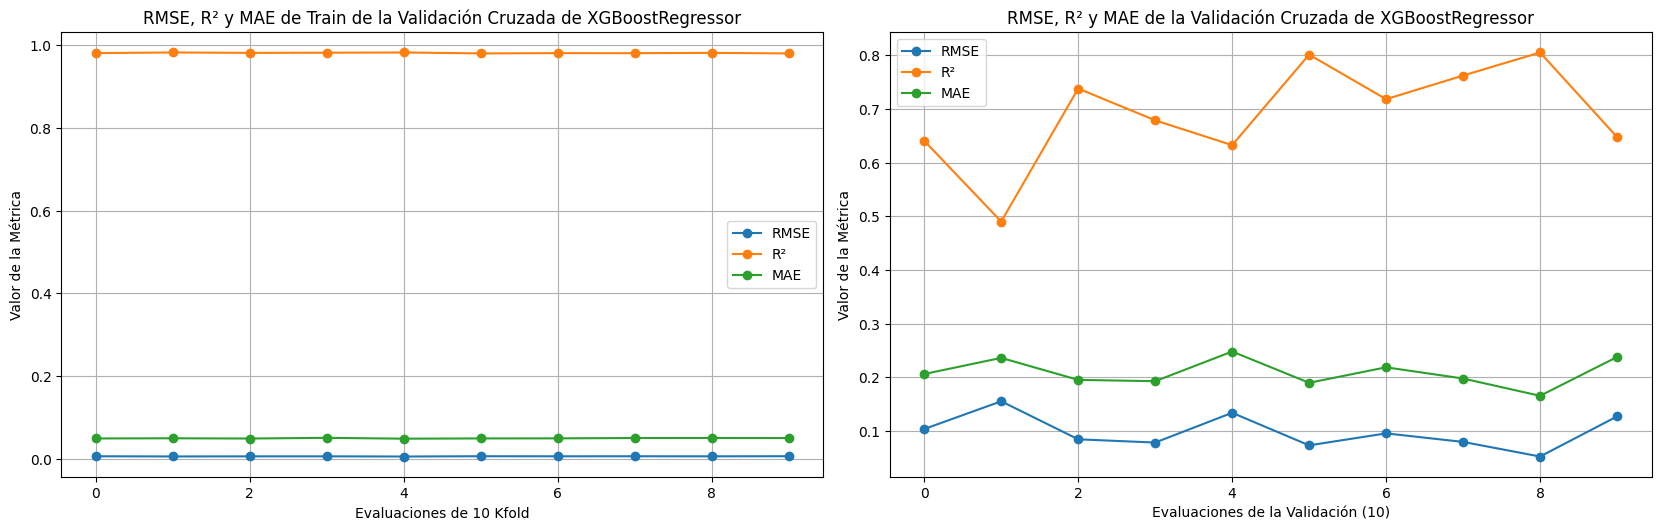

In [112]:
# Graficar los resultados

plt.figure(figsize=(25, 10))

plt.subplot(2, 3, 1)
plt.plot(xgb_scores['train_rmse'], label='RMSE', marker='o')
plt.plot(xgb_scores['train_r2'], label='R²', marker='o')
plt.plot(xgb_scores['train_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de 10 Kfold')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Train de la Validación Cruzada de XGBoostRegressor')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(xgb_scores['test_rmse'], label='RMSE', marker='o')
plt.plot(xgb_scores['test_r2'], label='R²', marker='o')
plt.plot(xgb_scores['test_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de la Validación (10)')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de la Validación Cruzada de XGBoostRegressor')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("Plots figures/Metricas de Validacion cruzada XGBoostRegressor.jpg", bbox_inches='tight')

plt.show()

### Validación Cruzada LGBMRegressor

In [74]:
outer_cv = KFold(n_splits=10, shuffle=True, random_state=seed)

# Definir las métricas para cross_validate
scoring = {
    'rmse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error)
}

start_time = time.time()

lgbm_scores = cross_validate(lgbm_model, X_train, y_train, cv=outer_cv, scoring=scoring, return_train_score=True)

end_time = time.time()

total_time = end_time - start_time
print("time", total_time)

# Mostrar los resultados promedios de cada métrica de cross_validate
print("Resultados de cross_validate (promedio en 10 folds):")
print("RMSE promedio (cross_validate): ", np.mean(lgbm_scores['test_rmse']))
print("R² promedio (cross_validate): ", np.mean(lgbm_scores['test_r2']))
print("MAE promedio (cross_validate): ", np.mean(lgbm_scores['test_mae']))

time 20000.622223377228
Resultados de cross_validate (promedio en 10 folds):
RMSE promedio (cross_validate):  0.1016560699994921
R² promedio (cross_validate):  0.6820678041418807
MAE promedio (cross_validate):  0.21311729190277298


In [75]:
  # Imprimir los resultados
print("Metrics LGBMRegressor...")

for metric in scoring:
    train_metric = "train_" + metric
    test_metric = "test_" + metric
    print(f'{metric}:')
    print(f'   Train: {lgbm_scores[train_metric]} with mean:{lgbm_scores[train_metric].mean()} and std: {lgbm_scores[train_metric].std()}')
    print(f'   Test: {lgbm_scores[test_metric]}  with mean:{lgbm_scores[test_metric].mean()} and std: {lgbm_scores[test_metric].std()}')
    print("----------------------------------------------------------------------------------------------------------------")

Metrics LGBMRegressor...
rmse:
   Train: [0.00271095 0.00196237 0.0024476  0.00293773 0.00266966 0.00274115
 0.00274359 0.00292199 0.00289524 0.00294846] with mean:0.00269787405817341 and std: 0.00028601522103979045
   Test: [0.09826376 0.1626851  0.08859771 0.08189454 0.14860824 0.07702372
 0.09339583 0.08006975 0.05435867 0.13166337]  with mean:0.1016560699994921 and std: 0.03283295694651988
----------------------------------------------------------------------------------------------------------------
r2:
   Train: [0.99166941 0.99393556 0.99239305 0.9911017  0.99156994 0.99134148
 0.99140971 0.99087958 0.99115135 0.99071009] with mean:0.9916161870535039 and std: 0.0008916522093622541
   Test: [0.65974069 0.46644133 0.72563419 0.66512113 0.59254283 0.79132194
 0.72481285 0.76124037 0.79839802 0.6354247 ]  with mean:0.6820678041418807 and std: 0.0964019793204064
----------------------------------------------------------------------------------------------------------------
mae:
   Tr

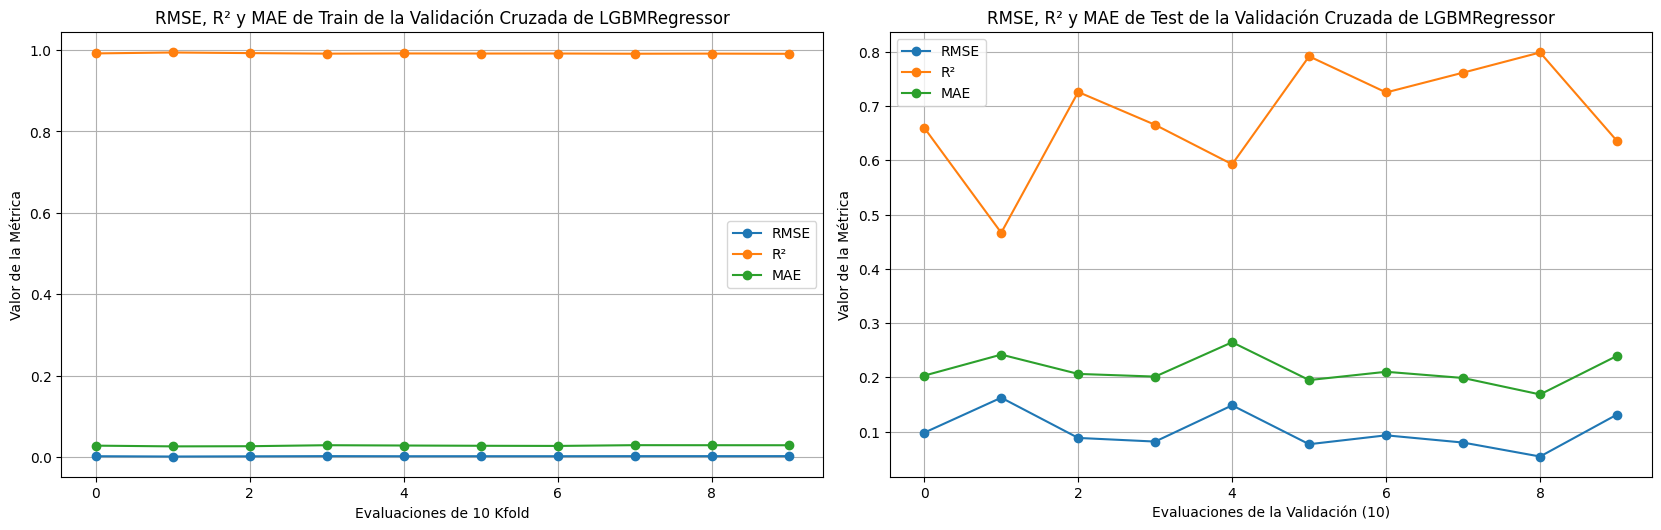

In [76]:
# Graficar los resultados

plt.figure(figsize=(25, 10))

plt.subplot(2, 3, 1)
plt.plot(lgbm_scores['train_rmse'], label='RMSE', marker='o')
plt.plot(lgbm_scores['train_r2'], label='R²', marker='o')
plt.plot(lgbm_scores['train_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de 10 Kfold')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Train de la Validación Cruzada de LGBMRegressor')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(lgbm_scores['test_rmse'], label='RMSE', marker='o')
plt.plot(lgbm_scores['test_r2'], label='R²', marker='o')
plt.plot(lgbm_scores['test_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de la Validación (10)')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Test de la Validación Cruzada de LGBMRegressor')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("Plots figures/Metricas de Validacion cruzada LGBMRegressor.jpg", bbox_inches='tight')

plt.show()

### Validación Cruzada GradientBoostingRegressor

In [26]:
outer_cv = KFold(n_splits=10, shuffle=True, random_state=seed)

# Definir las métricas para cross_validate
scoring = {
    'rmse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error)
}

start_time = time.time()

gb_scores = cross_validate(gb_model, X_train, y_train, cv=outer_cv, scoring=scoring, return_train_score=True)

end_time = time.time()

total_time = end_time - start_time
print("time", total_time)

# Mostrar los resultados promedios de cada métrica de cross_validate
print("Resultados de cross_validate (promedio en 10 folds):")
print("RMSE promedio (cross_validate): ", np.mean(gb_scores['test_rmse']))
print("R² promedio (cross_validate): ", np.mean(gb_scores['test_r2']))
print("MAE promedio (cross_validate): ", np.mean(gb_scores['test_mae']))

time 333.4053874015808
Resultados de cross_validate (promedio en 10 folds):
RMSE promedio (cross_validate):  0.09882981067423416
R² promedio (cross_validate):  0.6916697613806122
MAE promedio (cross_validate):  0.21187863190126474


In [27]:
  # Imprimir los resultados
print("Metrics GradientBoosting...")

for metric in scoring:
    train_metric = "train_" + metric
    test_metric = "test_" + metric
    print(f'{metric}:')
    print(f'   Train: {gb_scores[train_metric]} with mean:{gb_scores[train_metric].mean()} and std: {gb_scores[train_metric].std()}')
    print(f'   Test: {gb_scores[test_metric]}  with mean:{gb_scores[test_metric].mean()} and std: {gb_scores[test_metric].std()}')
    print("----------------------------------------------------------------------------------------------------------------")


Metrics GradientBoosting...
rmse:
   Train: [0.01028925 0.00939394 0.01010283 0.01035629 0.01049882 0.01096242
 0.0107396  0.01086356 0.01152453 0.01058278] with mean:0.010531401901538893 and std: 0.0005381687708550572
   Test: [0.09913516 0.15678858 0.0731299  0.07599707 0.13563595 0.09067969
 0.09686143 0.07894429 0.05179343 0.12933262]  with mean:0.09882981067423416 and std: 0.03082920710563682
----------------------------------------------------------------------------------------------------------------
r2:
   Train: [0.96838179 0.97096925 0.96860114 0.96863113 0.9668476  0.96537275
 0.96637393 0.96609151 0.96477786 0.96665614] with mean:0.9672703098039197 and std: 0.0017635875074427873
   Test: [0.65672329 0.48578014 0.77353431 0.68923673 0.62811053 0.75432424
 0.71460162 0.76459637 0.80791184 0.64187854]  with mean:0.6916697613806122 and std: 0.0895100126203111
----------------------------------------------------------------------------------------------------------------
mae:
 

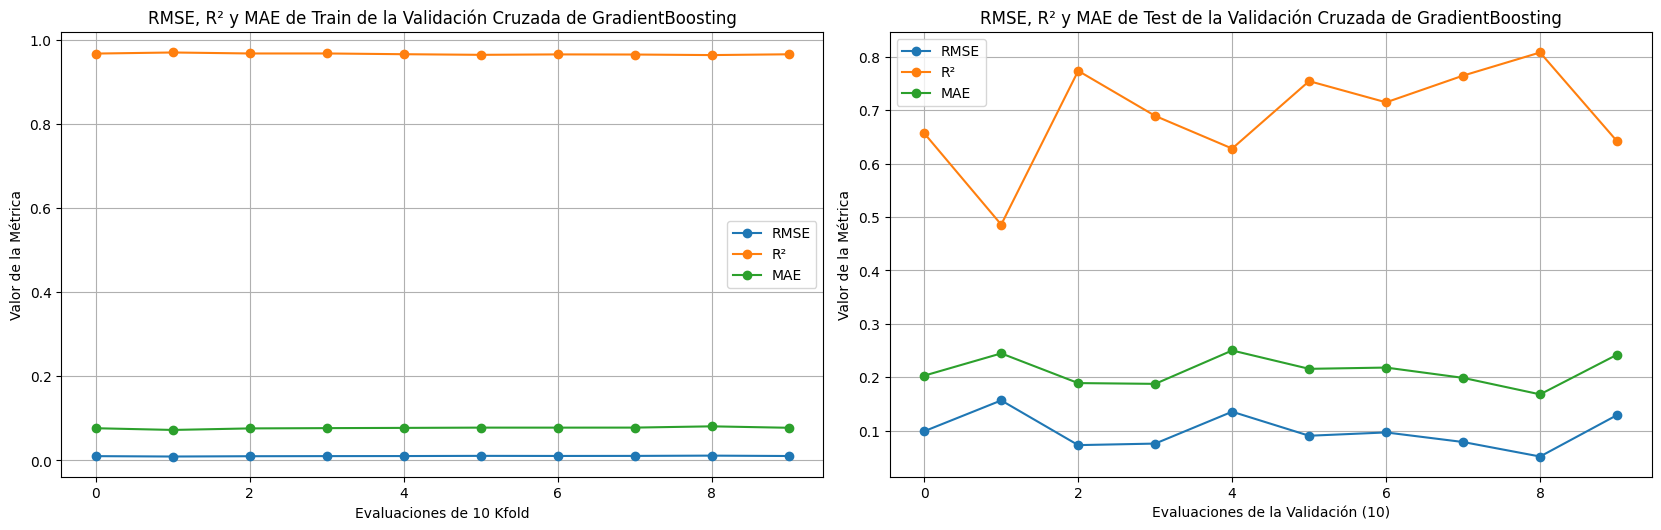

In [28]:
# Graficar los resultados

plt.figure(figsize=(25, 10))

plt.subplot(2, 3, 1)
plt.plot(gb_scores['train_rmse'], label='RMSE', marker='o')
plt.plot(gb_scores['train_r2'], label='R²', marker='o')
plt.plot(gb_scores['train_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de 10 Kfold')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Train de la Validación Cruzada de GradientBoosting')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(gb_scores['test_rmse'], label='RMSE', marker='o')
plt.plot(gb_scores['test_r2'], label='R²', marker='o')
plt.plot(gb_scores['test_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de la Validación (10)')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Test de la Validación Cruzada de GradientBoosting')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("Plots figures/Metricas de Validacion cruzada GradientBoosting.jpg", bbox_inches='tight')

plt.show()

### Validación Cruzada AdaBoostRegressor

In [29]:
outer_cv = KFold(n_splits=10, shuffle=True, random_state=seed)

# Definir las métricas para cross_validate
scoring = {
    'rmse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error)
}

start_time = time.time()

ab_scores = cross_validate(ad_model, X_train, y_train, cv=outer_cv, scoring=scoring, return_train_score=True)

end_time = time.time()

total_time = end_time - start_time
print("time", total_time)

# Mostrar los resultados promedios de cada métrica de cross_validate
print("Resultados de cross_validate (promedio en 10 folds):")
print("RMSE promedio (cross_validate): ", np.mean(ab_scores['test_rmse']))
print("R² promedio (cross_validate): ", np.mean(ab_scores['test_r2']))
print("MAE promedio (cross_validate): ", np.mean(ab_scores['test_mae']))

time 243.73351645469666
Resultados de cross_validate (promedio en 10 folds):
RMSE promedio (cross_validate):  0.1557264212230215
R² promedio (cross_validate):  0.5147304052577645
MAE promedio (cross_validate):  0.29376280017588924


In [30]:
  # Imprimir los resultados
print("Metrics AdaBoost...")

for metric in scoring:
    train_metric = "train_" + metric
    test_metric = "test_" + metric
    print(f'{metric}:')
    print(f'   Train: {ab_scores[train_metric]} with mean:{ab_scores[train_metric].mean()} and std: {ab_scores[train_metric].std()}')
    print(f'   Test: {ab_scores[test_metric]}  with mean:{ab_scores[test_metric].mean()} and std: {ab_scores[test_metric].std()}')
    print("----------------------------------------------------------------------------------------------------------------")


Metrics AdaBoost...
rmse:
   Train: [0.12347529 0.12524781 0.1264837  0.12650203 0.12137345 0.12526699
 0.12132414 0.12501188 0.12826612 0.11930007] with mean:0.12422514806415334 and std: 0.0026595417505557344
   Test: [0.15893274 0.18025429 0.12709847 0.10610063 0.19631038 0.15989808
 0.17854071 0.1421044  0.11656961 0.1914549 ]  with mean:0.1557264212230215 and std: 0.03012385492754724
----------------------------------------------------------------------------------------------------------------
r2:
   Train: [0.6205684  0.61293773 0.60689769 0.61682953 0.61673599 0.60431633
 0.62012979 0.6097996  0.60798339 0.62411344] with mean:0.6140311883552052 and std: 0.006306106392428638
   Test: [0.44966134 0.40881962 0.6064066  0.56613882 0.46175212 0.56679293
 0.47393682 0.57625952 0.56767406 0.46986223]  with mean:0.5147304052577645 and std: 0.06502442971454393
----------------------------------------------------------------------------------------------------------------
mae:
   Train: [

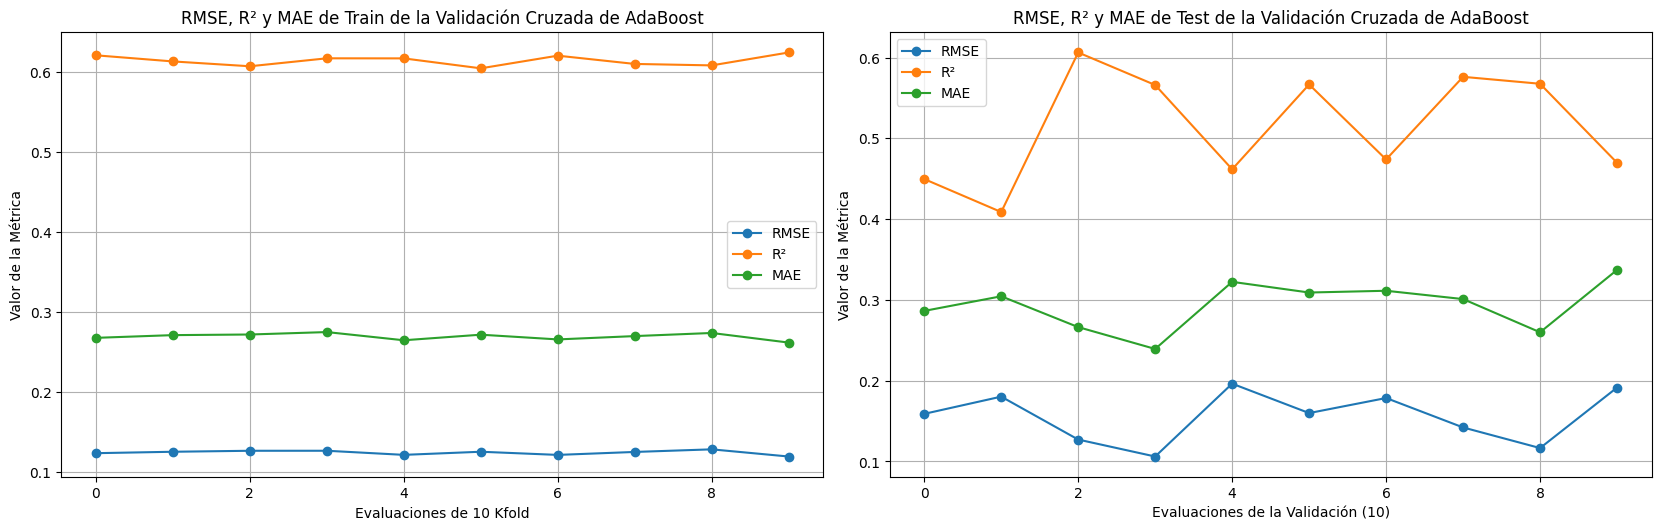

In [31]:
# Graficar los resultados

plt.figure(figsize=(25, 10))

plt.subplot(2, 3, 1)
plt.plot(ab_scores['train_rmse'], label='RMSE', marker='o')
plt.plot(ab_scores['train_r2'], label='R²', marker='o')
plt.plot(ab_scores['train_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de 10 Kfold')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Train de la Validación Cruzada de AdaBoost')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(ab_scores['test_rmse'], label='RMSE', marker='o')
plt.plot(ab_scores['test_r2'], label='R²', marker='o')
plt.plot(ab_scores['test_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de la Validación (10)')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Test de la Validación Cruzada de AdaBoost')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("Plots figures/Metricas de Validacion cruzada AdaBoost.jpg", bbox_inches='tight')

plt.show()

### Validación Cruzada RandomForestRegressor

In [32]:
outer_cv = KFold(n_splits=10, shuffle=True, random_state=seed)

# Definir las métricas para cross_validate
scoring = {
    'rmse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error)
}

start_time = time.time()

rf_scores = cross_validate(rf_model, X_train, y_train, cv=outer_cv, scoring=scoring, return_train_score=True)

end_time = time.time()

total_time = end_time - start_time
print("time", total_time)

# Mostrar los resultados promedios de cada métrica de cross_validate
print("Resultados de cross_validate (promedio en 10 folds):")
print("RMSE promedio (cross_validate): ", np.mean(rf_scores['test_rmse']))
print("R² promedio (cross_validate): ", np.mean(rf_scores['test_r2']))
print("MAE promedio (cross_validate): ", np.mean(rf_scores['test_mae']))

time 334.48029804229736
Resultados de cross_validate (promedio en 10 folds):
RMSE promedio (cross_validate):  0.11106263218750065
R² promedio (cross_validate):  0.6524223579586611
MAE promedio (cross_validate):  0.22327359959542364


In [33]:
  # Imprimir los resultados
print("Metrics Random Forest...")

for metric in scoring:
    train_metric = "train_" + metric
    test_metric = "test_" + metric
    print(f'{metric}:')
    print(f'   Train: {rf_scores[train_metric]} with mean:{rf_scores[train_metric].mean()} and std: {rf_scores[train_metric].std()}')
    print(f'   Test: {rf_scores[test_metric]}  with mean:{rf_scores[test_metric].mean()} and std: {rf_scores[test_metric].std()}')
    print("----------------------------------------------------------------------------------------------------------------")


Metrics Random Forest...
rmse:
   Train: [0.02074231 0.0193601  0.02109954 0.02147503 0.01959893 0.02107773
 0.02090176 0.02079269 0.02174973 0.02022702] with mean:0.020702483682814098 and std: 0.0007271397679351968
   Test: [0.11984537 0.16752613 0.08337392 0.08809365 0.15472888 0.08608734
 0.12322453 0.08798815 0.06053052 0.13922784]  with mean:0.11106263218750065 and std: 0.033342352742769796
----------------------------------------------------------------------------------------------------------------
r2:
   Train: [0.93626023 0.9401701  0.93442414 0.93495284 0.93811195 0.93342131
 0.93455584 0.93509963 0.93352684 0.9362694 ] with mean:0.9356792283675983 and std: 0.0020050855943163338
   Test: [0.58500975 0.45056419 0.74181102 0.63977203 0.57576113 0.76676616
 0.63692376 0.73762852 0.77550828 0.61447874]  with mean:0.6524223579586611 and std: 0.09822583539308972
----------------------------------------------------------------------------------------------------------------
mae:
  

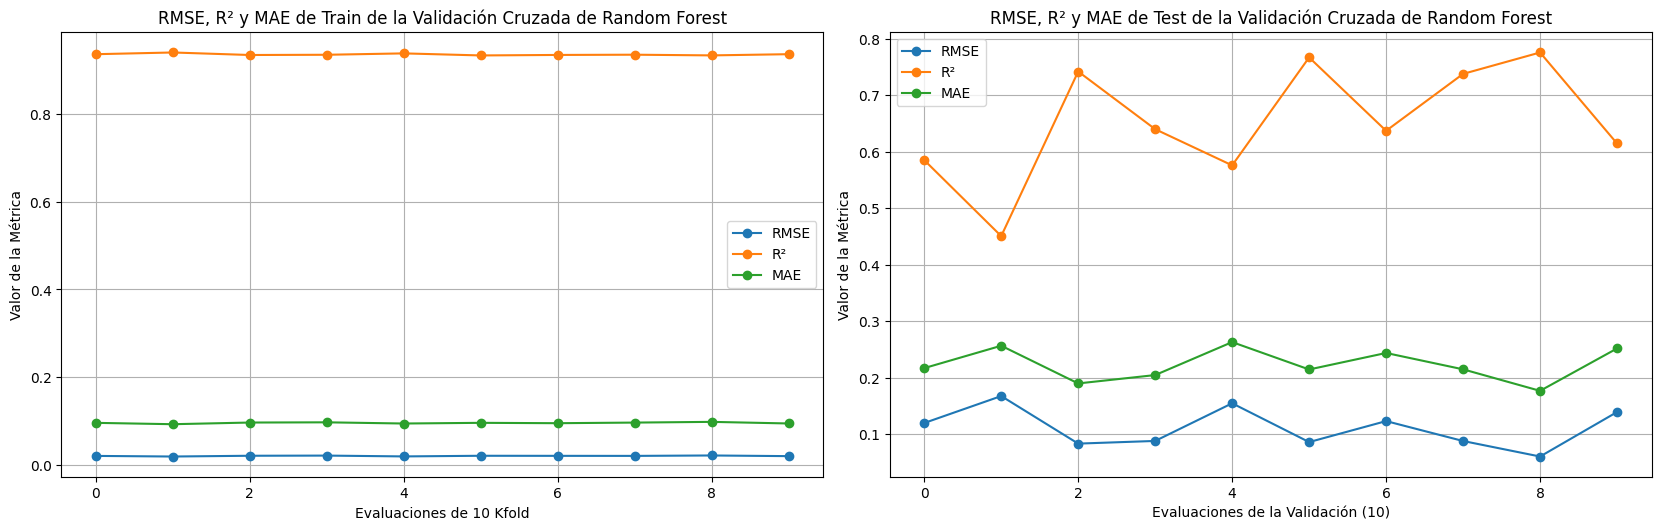

In [34]:
# Graficar los resultados

plt.figure(figsize=(25, 10))

plt.subplot(2, 3, 1)
plt.plot(rf_scores['train_rmse'], label='RMSE', marker='o')
plt.plot(rf_scores['train_r2'], label='R²', marker='o')
plt.plot(rf_scores['train_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de 10 Kfold')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Train de la Validación Cruzada de Random Forest')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(rf_scores['test_rmse'], label='RMSE', marker='o')
plt.plot(rf_scores['test_r2'], label='R²', marker='o')
plt.plot(rf_scores['test_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de la Validación (10)')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Test de la Validación Cruzada de Random Forest')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("Plots figures/Metricas de Validacion cruzada Random Forest.jpg", bbox_inches='tight')

plt.show()

### Validación Cruzada SVR

In [35]:
outer_cv = KFold(n_splits=10, shuffle=True, random_state=seed)

# Definir las métricas para cross_validate
scoring = {
    'rmse': make_scorer(mean_squared_error),
    'r2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error)
}

start_time = time.time()

svr_scores = cross_validate(svr_model, X_train, y_train, cv=outer_cv, scoring=scoring, return_train_score=True)

end_time = time.time()

total_time = end_time - start_time
print("time", total_time)

# Mostrar los resultados promedios de cada métrica de cross_validate
print("Resultados de cross_validate (promedio en 10 folds):")
print("RMSE promedio (cross_validate): ", np.mean(svr_scores['test_rmse']))
print("R² promedio (cross_validate): ", np.mean(svr_scores['test_r2']))
print("MAE promedio (cross_validate): ", np.mean(svr_scores['test_mae']))

time 33.001097679138184
Resultados de cross_validate (promedio en 10 folds):
RMSE promedio (cross_validate):  0.14752771023945904
R² promedio (cross_validate):  0.5317146982007693
MAE promedio (cross_validate):  0.26214707225392186


In [36]:
  # Imprimir los resultados
print("Metrics SVRs...")

for metric in scoring:
    train_metric = "train_" + metric
    test_metric = "test_" + metric
    print(f'{metric}:')
    print(f'   Train: {svr_scores[train_metric]} with mean:{svr_scores[train_metric].mean()} and std: {svr_scores[train_metric].std()}')
    print(f'   Test: {svr_scores[test_metric]}  with mean:{svr_scores[test_metric].mean()} and std: {svr_scores[test_metric].std()}')
    print("----------------------------------------------------------------------------------------------------------------")


Metrics SVRs...
rmse:
   Train: [0.00118464 0.0015826  0.00118936 0.00150372 0.00140117 0.0013992
 0.00148969 0.00170768 0.00159913 0.00161149] with mean:0.0014668683910628684 and std: 0.0001665016165378431
   Test: [0.14467407 0.22053445 0.10257134 0.1063447  0.1698924  0.10910538
 0.10906151 0.12769318 0.18665578 0.1987443 ]  with mean:0.14752771023945904 and std: 0.04130242088852483
----------------------------------------------------------------------------------------------------------------
r2:
   Train: [0.99635967 0.99510917 0.99630355 0.99544529 0.99557549 0.99558031
 0.99533573 0.99466982 0.99511262 0.99492257] with mean:0.9954414209846121 and std: 0.0005213431561493173
   Test: [0.49903506 0.27671269 0.68236125 0.56514077 0.53418548 0.70440407
 0.67865455 0.61923229 0.30774292 0.44967792]  with mean:0.5317146982007693 and std: 0.14348429607845134
----------------------------------------------------------------------------------------------------------------
mae:
   Train: [0

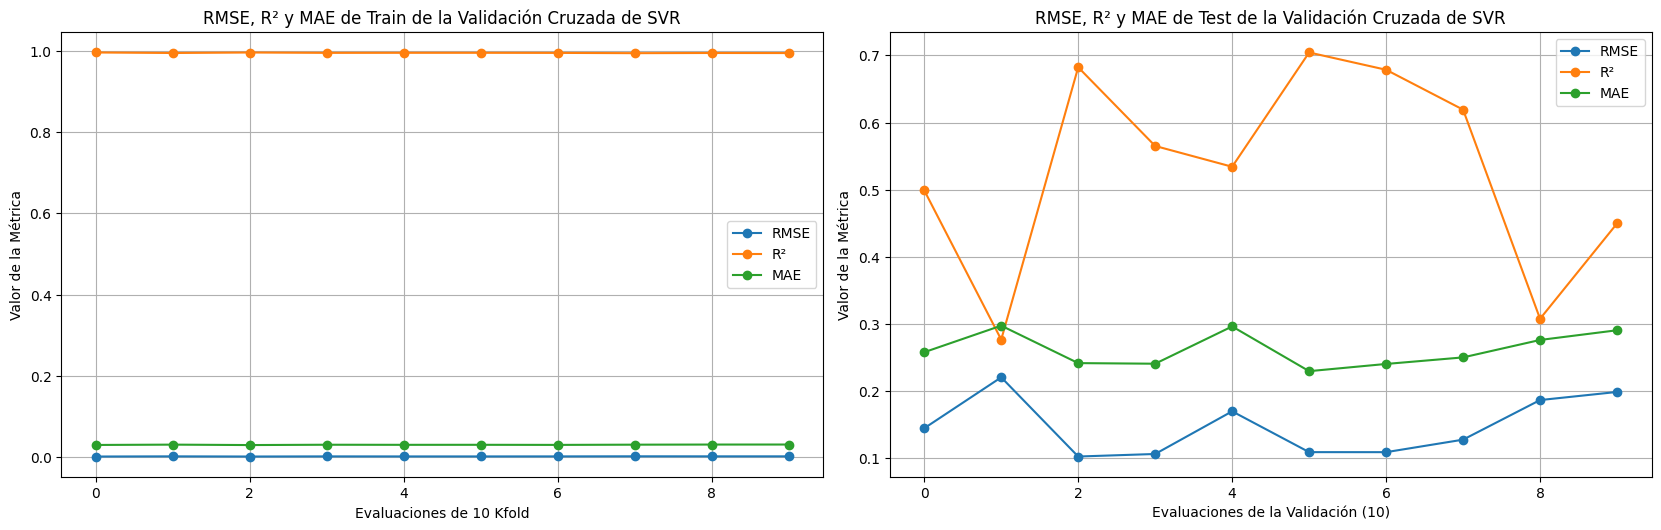

In [37]:
# Graficar los resultados

plt.figure(figsize=(25, 10))

plt.subplot(2, 3, 1)
plt.plot(svr_scores['train_rmse'], label='RMSE', marker='o')
plt.plot(svr_scores['train_r2'], label='R²', marker='o')
plt.plot(svr_scores['train_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de 10 Kfold')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Train de la Validación Cruzada de SVR')
plt.legend()
plt.grid(True)

plt.subplot(2, 3, 2)
plt.plot(svr_scores['test_rmse'], label='RMSE', marker='o')
plt.plot(svr_scores['test_r2'], label='R²', marker='o')
plt.plot(svr_scores['test_mae'], label='MAE', marker='o')
plt.xlabel('Evaluaciones de la Validación (10)')
plt.ylabel('Valor de la Métrica')
plt.title('RMSE, R² y MAE de Test de la Validación Cruzada de SVR')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("Plots figures/Metricas de Validacion cruzada SVR.jpg", bbox_inches='tight')

plt.show()

## Comparación de validación Cruzada de los 6 modelos

In [ ]:
cv_models = [{'model': 'XGBRegressor', 'RMSE': np.mean(xgb_scores['test_rmse']), 'R²': np.mean(xgb_scores['test_r2']), 'MAE': np.mean(xgb_scores['test_mae'])},
                {'model': 'LightGBM', 'RMSE': np.mean(lgbm_scores['test_rmse']), 'R²': np.mean(lgbm_scores['test_r2']), 'MAE': np.mean(lgbm_scores['test_mae'])},
                {'model': 'Gradient Boosting', 'RMSE': np.mean(gb_scores['test_rmse']), 'R²': np.mean(gb_scores['test_r2']), 'MAE': np.mean(gb_scores['test_mae'])},
                {'model': 'AdaBoost Regressor', 'RMSE': np.mean(ab_scores['test_rmse']), 'R²': np.mean(ab_scores['test_r2']), 'MAE': np.mean(ab_scores['test_mae'])},
                {'model': 'Random Forest', 'RMSE': np.mean(rf_scores['test_rmse']), 'R²': np.mean(rf_scores['test_r2']), 'MAE': np.mean(rf_scores['test_mae'])},
                {'model': 'Support Vector Regressor', 'RMSE': np.mean(svr_scores['test_rmse']), 'R²': np.mean(svr_scores['test_r2']), 'MAE': np.mean(svr_scores['test_mae'])}]
cv_models_df = pd.DataFrame(cv_models)

In [114]:
cv_models_df

,model,RMSE,R²,MAE
0,XGBRegressor,0.098449,0.691599,0.208870
1,LightGBM,0.101656,0.682068,0.213117
2,Gradient Boosting,0.098830,0.691670,0.211879
3,AdaBoost Regressor,0.155726,0.514730,0.293763
4,Random Forest,0.111063,0.652422,0.223274
5,Support Vector Regressor,0.147528,0.531715,0.262147


### Barras de comparación de los resultados de Validación Cruzada

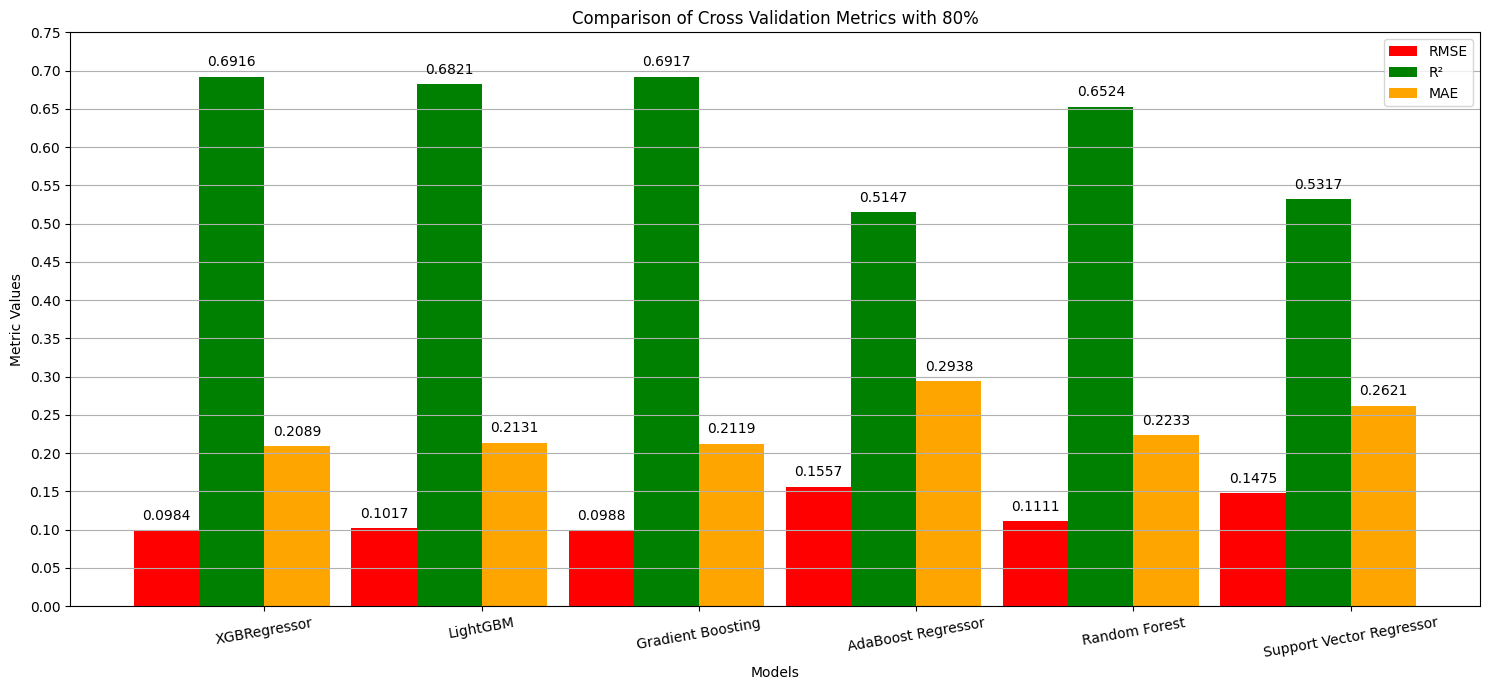

In [126]:
# Ancho de las barras
bar_width = 0.3
models = ['XGBRegressor', 'LightGBM', 'Gradient Boosting', 'AdaBoost Regressor', 'Random Forest', 'Support Vector Regressor']


index = np.arange(len(models))

# Crear la figura y los ejes
plt.figure(figsize=(15, 7))

# Colores de los modelos
colors = {'XGBRegressor': '#7CFC00',
            'Gradient Boosting': '#00FFFF',
            'LightGBM': 'g',
            'AdaBoost Regressor': '#8A2BE2',
            'Random Forest': '#FF8C00',
            'Support Vector Regressor': 'purple'}


# Gráficos de barras con anotaciones
plt.bar(index - bar_width*1.5, cv_models_df['RMSE'], bar_width, label='RMSE', color='red')
for i, valor in enumerate(cv_models_df['RMSE']):
    plt.text(i - bar_width*1.5, valor + 0.01, f"{valor:.4f}", ha='center', va='bottom')

plt.bar(index - bar_width/2, cv_models_df['R²'], bar_width, label='R²', color='green')
for i, valor in enumerate(cv_models_df['R²']):
    plt.text(i - bar_width/2, valor + 0.01, f"{valor:.4f}", ha='center', va='bottom')

plt.bar(index + bar_width/2, cv_models_df['MAE'], bar_width, label='MAE', color='orange')
for i, valor in enumerate(cv_models_df['MAE']):
    plt.text(i + bar_width/2, valor + 0.01, f"{valor:.4f}", ha='center', va='bottom')

# Etiquetas y títulos
plt.xlabel('Models')
plt.ylabel('Metric Values')
plt.title('Comparison of Cross Validation Metrics with 80%')
plt.xticks(index, models, rotation=10)
plt.yticks(np.arange(0, cv_models_df['R²'].max() + 0.1, 0.05))
plt.ylim(0, 0.75)
plt.legend()

# Ajustar el layout
plt.tight_layout()
plt.grid(axis='y')

plt.savefig("Plots figures/Metricas de Validacion cruzada con barras.jpg", bbox_inches='tight')

# Mostrar el gráfico
plt.show()

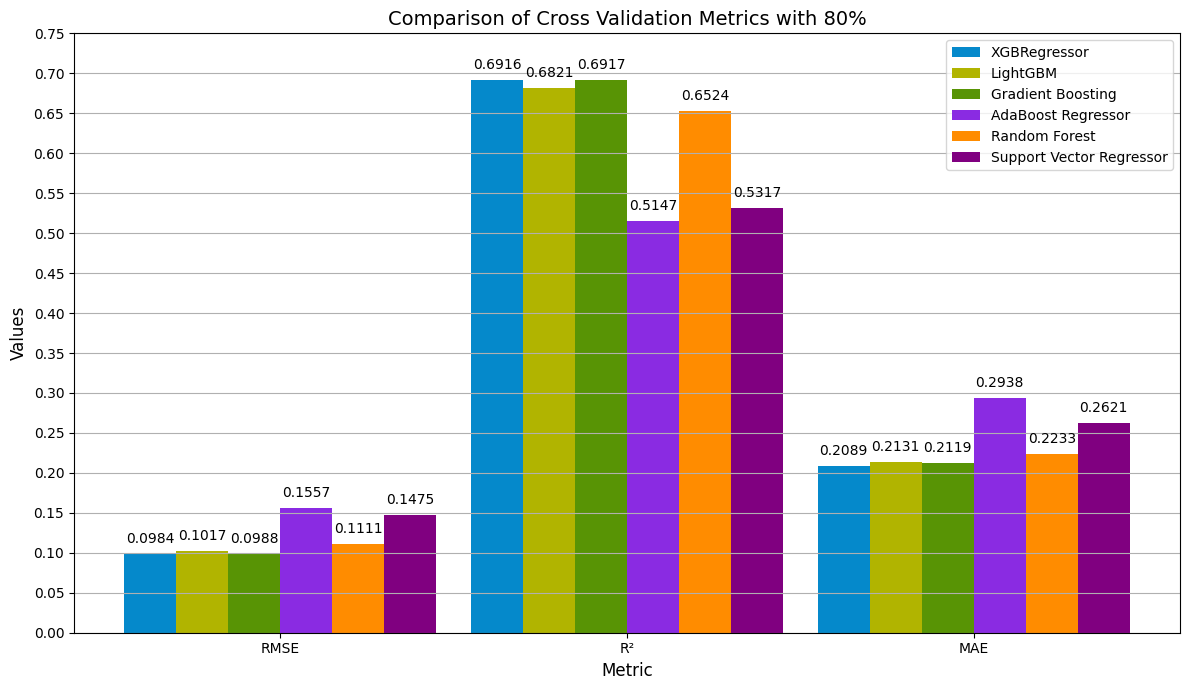

In [116]:
colors = ['#0589cb', '#b1b400', '#589405', '#8A2BE2', '#FF8C00', 'purple', '#7CFC00']

#models_test_df = result_models_test_df.iloc[:,:-3]
#models_test_df = result_models_test_df[['model', 'RMSE', 'R²',	'MAE']]

models = cv_models_df['model']
metrics = cv_models_df.columns[1:]
values = cv_models_df.iloc[:, 1:].values

errors = np.random.uniform(0.001, 0.01, values.shape)  # Simular errores para las barras


# Configurar el gráfico
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.15
x = np.arange(len(metrics))

# Graficar barras para cada modelo
for i, model in enumerate(models):
    #bars = ax.bar(x + i * bar_width, values[i], bar_width, yerr=errors[i], capsize=3,  color=colors[i], label=model)
    bars = ax.bar(x + i * bar_width, values[i], bar_width, color=colors[i], label=model)
    
    # Añadir valores encima de cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom', fontsize=10)

# Configurar etiquetas y título
ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Comparison of Cross Validation Metrics with 80%', fontsize=14)
ax.set_xticks(x + bar_width * (len(models) / 2 - 0.5))
ax.set_xticklabels(metrics, fontsize=10)
ax.set_yticks(np.arange(0, cv_models_df['R²'].max() + 0.1, 0.05))
ax.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.savefig("Plots figures/Metricas de Validacion cruzada con barras 2.jpg", bbox_inches='tight')

plt.show()

### Comparacion de los kFold de CV

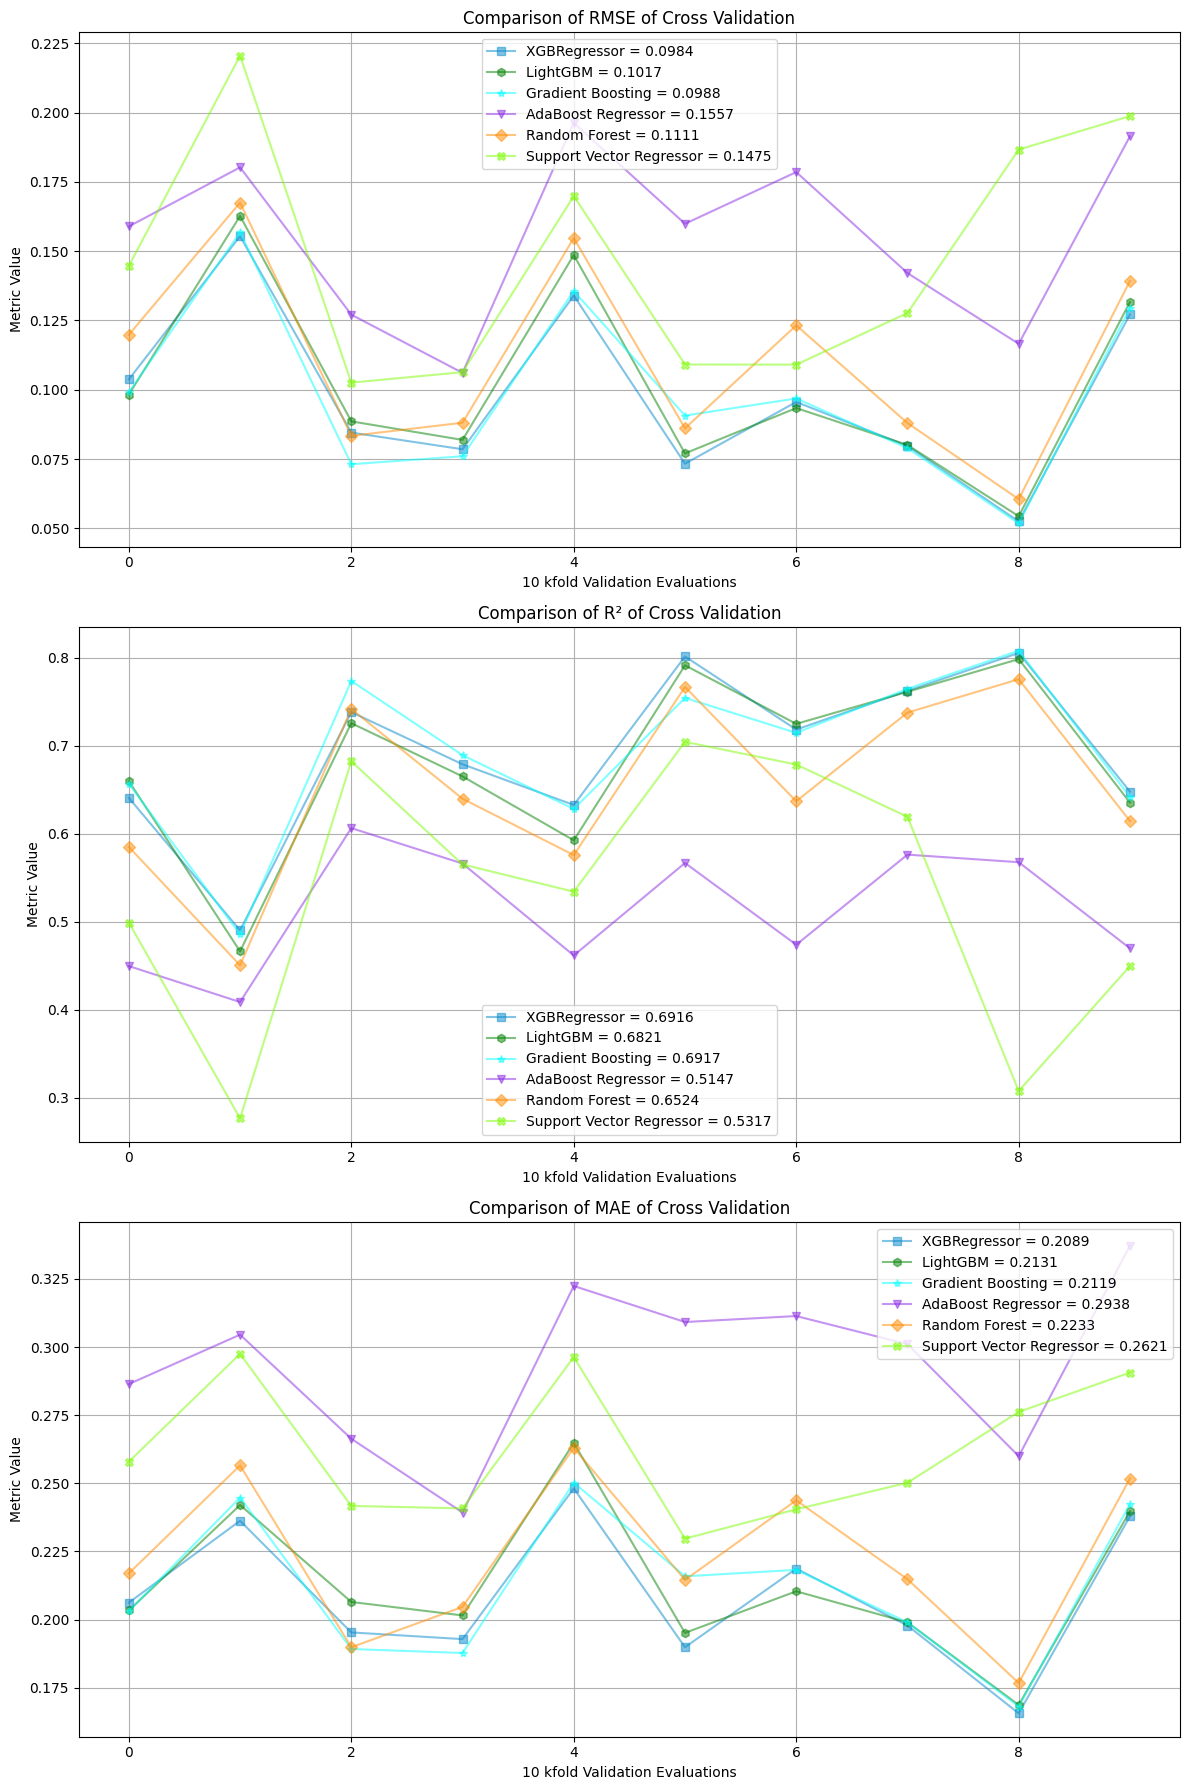

In [117]:
# Graficar los resultados

plt.figure(figsize=(12, 18))  #{row["R²"]:.4f}

plt.subplot(3, 1, 1)
plt.plot(xgb_scores['test_rmse'], label=f'XGBRegressor = {np.mean(xgb_scores["test_rmse"]):.4f}', color='#0589CB', alpha=0.5,  marker="s")
plt.plot(lgbm_scores['test_rmse'], label=f'LightGBM = {np.mean(lgbm_scores["test_rmse"]):.4f}',  color='g', alpha=0.5, marker="h")
plt.plot(gb_scores['test_rmse'], label=f'Gradient Boosting = {np.mean(gb_scores["test_rmse"]):.4f}',  color='#00FFFF', alpha=0.5, marker="*")
plt.plot(ab_scores['test_rmse'], label=f'AdaBoost Regressor = {np.mean(ab_scores["test_rmse"]):.4f}', color='#8A2BE2', alpha=0.5,  marker="v")
plt.plot(rf_scores['test_rmse'], label=f'Random Forest = {np.mean(rf_scores["test_rmse"]):.4f}',  color='#FF8C00', alpha=0.5, marker="D")
plt.plot(svr_scores['test_rmse'], label=f'Support Vector Regressor = {np.mean(svr_scores["test_rmse"]):.4f}', color='#7CFC00', alpha=0.5, marker="X")
plt.xlabel('10 kfold Validation Evaluations')
plt.ylabel('Metric Value')
plt.title('Comparison of RMSE of Cross Validation')
plt.legend()
plt.grid(True)
plt.subplot(3, 1, 2)
plt.plot(xgb_scores['test_r2'], label=f'XGBRegressor = {np.mean(xgb_scores["test_r2"]):.4f}',  color='#0589cb', alpha=0.5, marker="s")
plt.plot(lgbm_scores['test_r2'], label=f'LightGBM = {np.mean(lgbm_scores["test_r2"]):.4f}', color='g', alpha=0.5, marker="h")
plt.plot(gb_scores['test_r2'], label=f'Gradient Boosting = {np.mean(gb_scores["test_r2"]):.4f}', color='#00FFFF', alpha=0.5,  marker="*")
plt.plot(ab_scores['test_r2'], label=f'AdaBoost Regressor = {np.mean(ab_scores["test_r2"]):.4f}',  color='#8A2BE2', alpha=0.5,  marker="v")
plt.plot(rf_scores['test_r2'], label=f'Random Forest = {np.mean(rf_scores["test_r2"]):.4f}', color='#FF8C00', alpha=0.5,  marker="D")
plt.plot(svr_scores['test_r2'], label=f'Support Vector Regressor = {np.mean(svr_scores["test_r2"]):.4f}',  color='#7CFC00', alpha=0.5, marker="X")
plt.xlabel('10 kfold Validation Evaluations')
plt.ylabel('Metric Value')
plt.title('Comparison of R² of Cross Validation')
plt.legend()
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(xgb_scores['test_mae'], label=f'XGBRegressor = {np.mean(xgb_scores["test_mae"]):.4f}',  color='#0589cb', alpha=0.5, marker="s")
plt.plot(lgbm_scores['test_mae'], label=f'LightGBM = {np.mean(lgbm_scores["test_mae"]):.4f}',  color='g', alpha=0.5, marker="h") 
plt.plot(gb_scores['test_mae'], label=f'Gradient Boosting = {np.mean(gb_scores["test_mae"]):.4f}',  color='#00FFFF', alpha=0.5,  marker="*")
plt.plot(ab_scores['test_mae'], label=f'AdaBoost Regressor = {np.mean(ab_scores["test_mae"]):.4f}',  color='#8A2BE2', alpha=0.5, marker="v")
plt.plot(rf_scores['test_mae'], label=f'Random Forest = {np.mean(rf_scores["test_mae"]):.4f}', color='#FF8C00', alpha=0.5, marker="D")
plt.plot(svr_scores['test_mae'], label=f'Support Vector Regressor = {np.mean(svr_scores["test_mae"]):.4f}', color='#7CFC00', alpha=0.5, marker="X")
plt.xlabel('10 kfold Validation Evaluations')
plt.ylabel('Metric Value')
plt.title('Comparison of MAE of Cross Validation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig("Plots figures/Metricas de kfold de Validacion cruzada.jpg", bbox_inches='tight')

plt.show()

# Etapa 6 del desarrollo: Evaluación con el 20% de prueba.

## Modelos con mejores parametros

In [121]:
models = [
    ('XGBRegressor', XGBRegressor(**best_params_xgb, 
                                    booster='gbtree', 
                                    objective='reg:squarederror',
                                    eval_metric='rmse', 
                                    tree_method='hist', 
                                    n_jobs=-1,
                                    random_state=seed)),

    ('LightGBM', LGBMRegressor(**best_params_lgbm, 
                                boosting_type='gbdt',
                                objective='regression',
                                metric='rmse', 
                                n_jobs=-1,
                                verbosity=-1,
                                random_state=seed)),

    ('Gradient Boosting',  GradientBoostingRegressor(**best_params_gb, 
                                                        loss='squared_error', 
                                                        #max_features='sqrt', 
                                                        random_state=seed)),

    ('AdaBoost Regressor', AdaBoostRegressor(**best_params_ad, 
                                                loss='square', 
                                                random_state=seed)),
    
    ('Random Forest', RandomForestRegressor(**best_params_rf, 
                                            criterion="squared_error",
                                            n_jobs=-1, 
                                            random_state=seed)),
    
    ('Support Vector Regressor', SVR(**best_params_svr, 
                                        kernel='rbf', 
                                        gamma='scale'))
]

## Entrenamiento

In [122]:
# @title Codigo con StandardScaler 0 a 1 y log pki
# entrenamiento de modelos optimizados con split 80% y testeo con 20% prueba de dataset 1459x3048 y random_state de 41

result_models_train = []
result_models_test = []

time_models = []
y_predict_train = []
y_predict_test = []

for name, model in models:
    print(f"\t Entrenando a {name}...")
    start_time = time.time()

    #model.fit(X, y)
    model.fit(X_train, y_train)

    end_time = time.time()
    total_time = end_time - start_time
    time_models.append(total_time)
    
    y_pred = model.predict(X_train)

    y_predict_train.append(y_pred)

    print("time: ", total_time)

    # RMSE
    rmse = mean_squared_error(y_train, y_pred)

    # MAE
    mae = mean_absolute_error(y_train, y_pred)

    # R²
    r2 = r2_score(y_train, y_pred)

    print("\n\t Train: ")
    print(f"\nRMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R²: {r2}")

    result_models_train.append({
        'model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'time': total_time,
    })
    print("--------------------------------------------------------------------------------------")
    print("\n")

    y_pred = model.predict(X_test)

    y_predict_test.append(y_pred)

    # RMSE
    rmse = mean_squared_error(y_test, y_pred)

    # MAE
    mae = mean_absolute_error(y_test, y_pred)

    # R²
    r2 = r2_score(y_test, y_pred)

    print("\t Test: ")
    print(f"\nRMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R²: {r2}")

    result_models_test.append({
        'model': name,
        'RMSE': rmse,
        'MAE': mae,
        'R²': r2,
        'time': total_time,
    })
    print("-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------")
    print("\n")
    joblib.dump(model, f'Trained models/training - {name.lower().replace(" ", "_")}.pkl')
    

result_models_train_df = pd.DataFrame(result_models_train)
result_models_test_df = pd.DataFrame(result_models_test)

	 Entrenando a XGBRegressor...
time:  548.8829696178436

	 Train: 

RMSE: 0.005565950659052148
MAE: 0.049446857520648084
R²: 0.9828549656049451
--------------------------------------------------------------------------------------


	 Test: 

RMSE: 0.07641886712610993
MAE: 0.20222863041589823
R²: 0.7580394240100851
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


	 Entrenando a LightGBM...
time:  2209.242104291916

	 Train: 

RMSE: 0.0023152828112678694
MAE: 0.0281619139365399
R²: 0.9928681359456702
--------------------------------------------------------------------------------------


	 Test: 

RMSE: 0.08058520519971088
MAE: 0.20766969600588933
R²: 0.7448477921792493
-------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [91]:
# con StandardScaler y log pki con random state de 41
result_models_train_df

,model,RMSE,MAE,R²,time
0,XGBRegressor,0.005566,0.049447,0.982855,559.696275
1,LightGBM,0.002315,0.028162,0.992868,2268.889169
2,Gradient Boosting,0.012031,0.082819,0.962940,37.748299
3,AdaBoost Regressor,0.124536,0.270744,0.616385,27.473996
4,Random Forest,0.020428,0.095755,0.937075,42.848178
5,Support Vector Regressor,0.001403,0.030224,0.995679,2.365562


In [92]:
# con StandardScaler y log pki con random state de 41
result_models_test_df

,model,RMSE,MAE,R²,time
0,XGBRegressor,0.076419,0.202229,0.758039,559.696275
1,LightGBM,0.080585,0.207670,0.744848,2268.889169
2,Gradient Boosting,0.084782,0.212655,0.731559,37.748299
3,AdaBoost Regressor,0.143377,0.289867,0.546035,27.473996
4,Random Forest,0.090204,0.221797,0.714393,42.848178
5,Support Vector Regressor,0.108514,0.235996,0.656417,2.365562


## Graficos de Comparación de resultados de entrenamiento con 20% de prueba y modelos optimizados

### Barra de Comparación de metricas

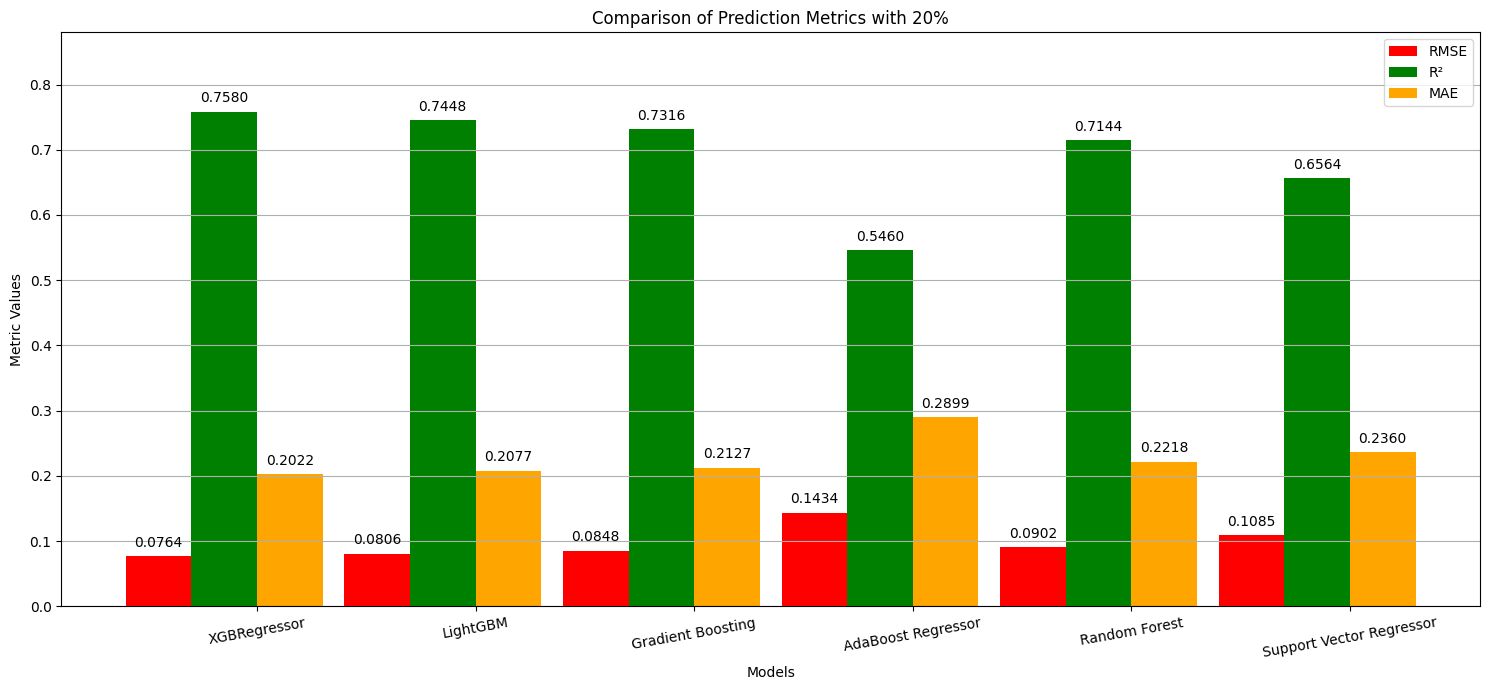

In [107]:
# Ancho de las barras
bar_width = 0.3
models = ['XGBRegressor', 'LightGBM', 'Gradient Boosting', 'AdaBoost Regressor', 'Random Forest', 'Support Vector Regressor']

index = np.arange(len(models))

# Crear la figura y los ejes
plt.figure(figsize=(15, 7))

# Gráficos de barras con anotaciones
plt.bar(index - bar_width*1.5, result_models_test_df['RMSE'], bar_width, label='RMSE', color='red')
for i, valor in enumerate(result_models_test_df['RMSE']):
    plt.text(i - bar_width*1.5, valor + 0.01, f"{valor:.4f}", ha='center', va='bottom')

plt.bar(index - bar_width/2, result_models_test_df['R²'], bar_width, label='R²', color='green')
for i, valor in enumerate(result_models_test_df['R²']):
    plt.text(i - bar_width/2, valor + 0.01, f"{valor:.4f}", ha='center', va='bottom')

plt.bar(index + bar_width/2, result_models_test_df['MAE'], bar_width, label='MAE', color='orange')
for i, valor in enumerate(result_models_test_df['MAE']):
    plt.text(i + bar_width/2, valor + 0.01, f"{valor:.4f}", ha='center', va='bottom')

# Etiquetas y títulos
plt.xlabel('Models')
plt.ylabel('Metric Values')
plt.title('Comparison of Prediction Metrics with 20%')
plt.xticks(index, models, rotation=10)
#plt.yticks(np.arange(0, result_models_df2['R²'].max() + 0.1, 0.05))
plt.ylim(0, 0.88)
plt.legend()

# Ajustar el layout
plt.tight_layout()
plt.grid(axis='y')

plt.savefig("Plots figures/Metricas de Entrenamiento con barras.jpg", bbox_inches='tight')

# Mostrar el gráfico
plt.show()

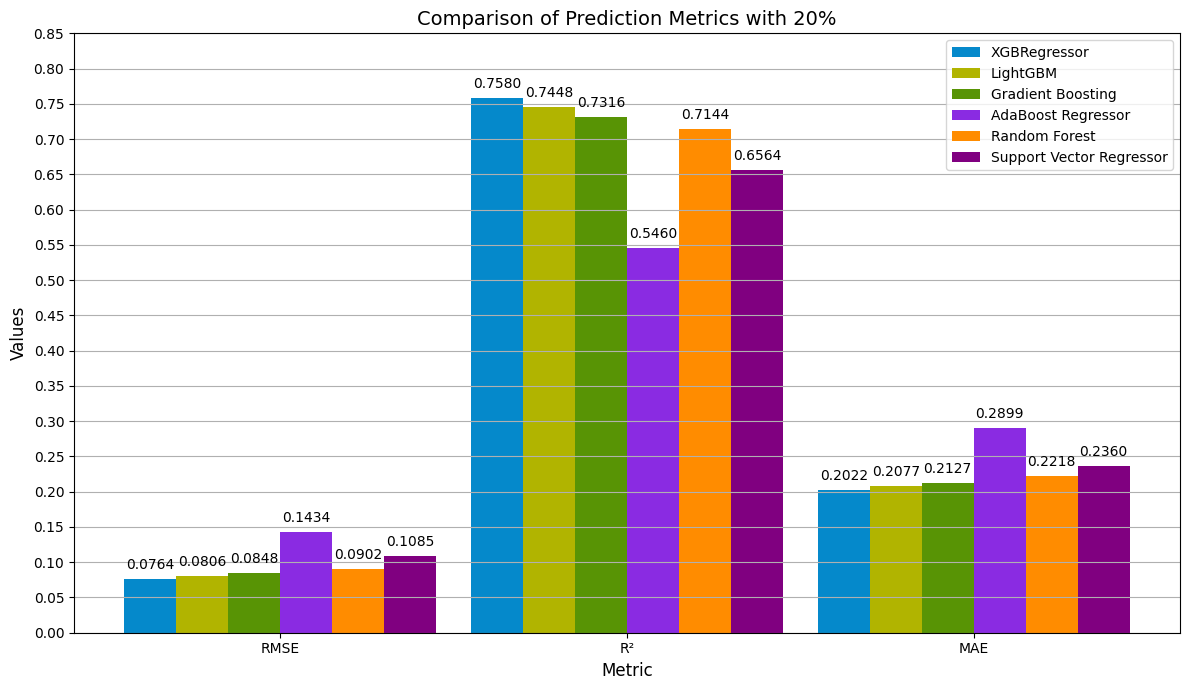

In [108]:
# Configurar el gráfico

colors = ['#0589cb', '#b1b400', '#589405', '#8A2BE2', '#FF8C00', 'purple', '#7CFC00']

#models_test_df = result_models_test_df.iloc[:,:-3]
models_test_df = result_models_test_df[['model', 'RMSE', 'R²',	'MAE']]

models = models_test_df['model']
metrics = models_test_df.columns[1:]
values = models_test_df.iloc[:, 1:].values

errors = np.random.uniform(0.001, 0.01, values.shape)  # Simular errores para las barras


# Configurar el gráfico
fig, ax = plt.subplots(figsize=(12, 7))
bar_width = 0.15
x = np.arange(len(metrics))

# Graficar barras para cada modelo
for i, model in enumerate(models):
    #bars = ax.bar(x + i * bar_width, values[i], bar_width, yerr=errors[i], capsize=3,  color=colors[i], label=model)
    bars = ax.bar(x + i * bar_width, values[i], bar_width, color=colors[i], label=model)
    
    # Añadir valores encima de cada barra
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom', fontsize=10)

# Configurar etiquetas y título
ax.set_xlabel('Metric', fontsize=12)
ax.set_ylabel('Values', fontsize=12)
ax.set_title('Comparison of Prediction Metrics with 20%', fontsize=14)
ax.set_xticks(x + bar_width * (len(models) / 2 - 0.5))
ax.set_xticklabels(metrics, fontsize=10)
ax.set_yticks(np.arange(0, models_test_df['R²'].max() + 0.1, 0.05))
ax.legend()
plt.grid(axis='y')

plt.tight_layout()
plt.savefig("Plots figures/Metricas de Entrenamiento con barras 3.jpg", bbox_inches='tight')

plt.show()

### Comparación de Predicciones de entrenamiento con train

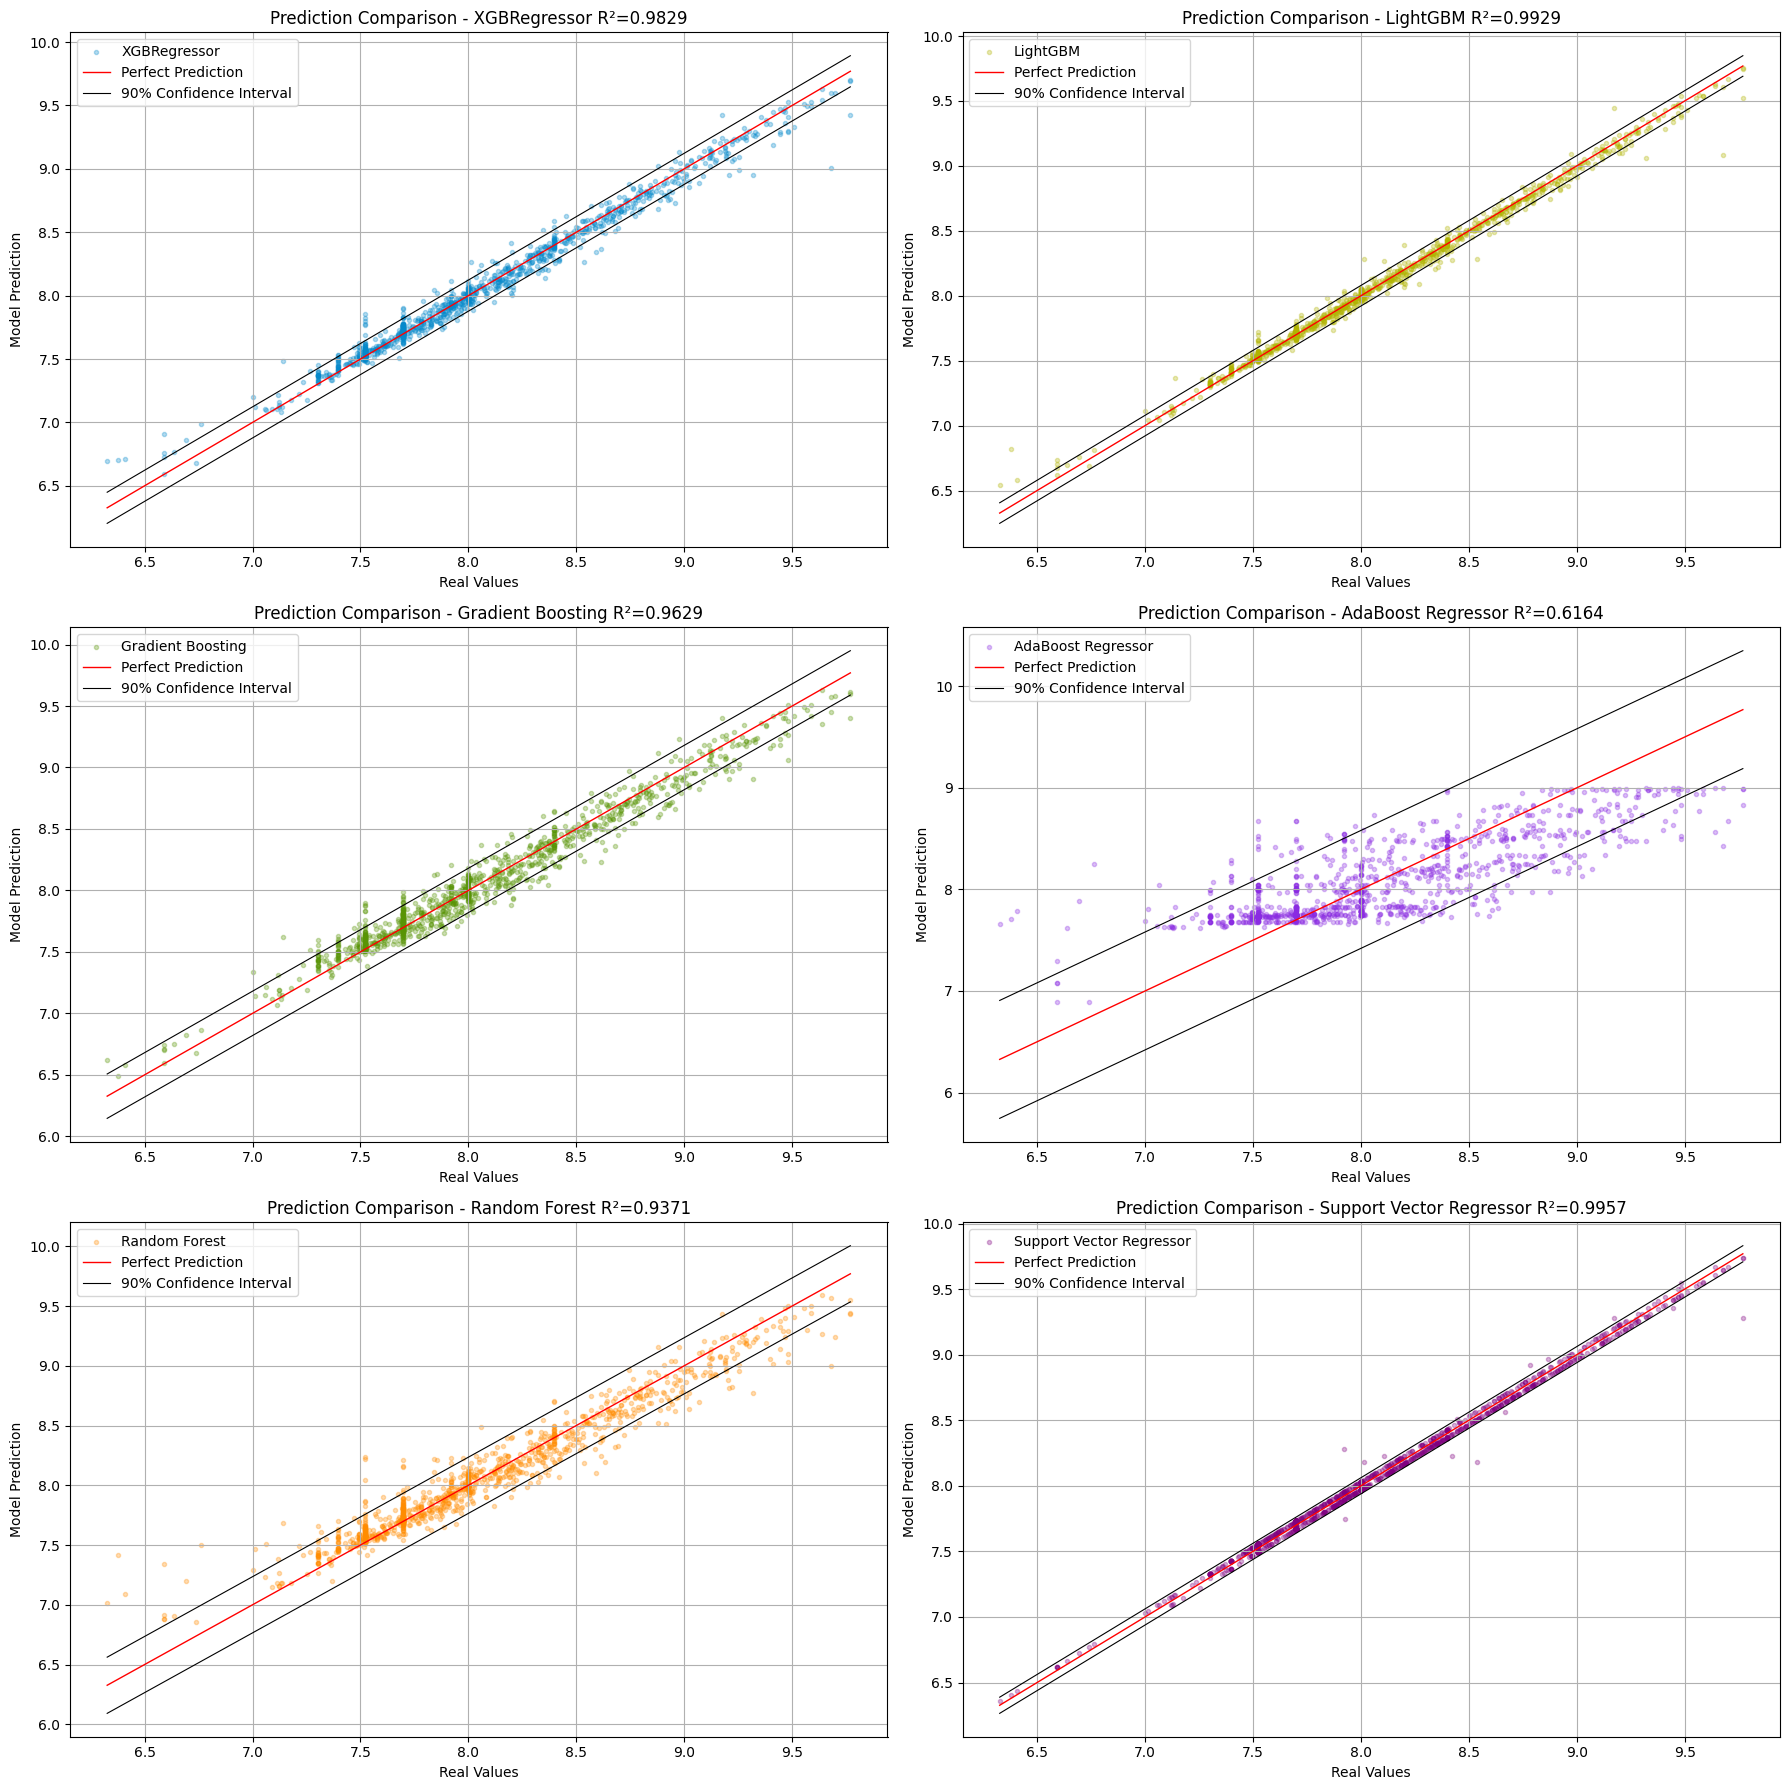

In [123]:
# @title Grafico de Comparacion de Predicciones de entrenamiento con train
colors = ['#0589cb', '#b1b400', '#589405', '#8A2BE2', '#FF8C00', 'purple', '#7CFC00']

# Configura el gráfico
plt.figure(figsize=(18, 18))

for i, row in result_models_train_df.iterrows():
    # Calcula residuos y desviación estándar para el modelo actual
    residuals = y_train - y_predict_train[i]
    std_residuals = np.std(residuals)
    
    # Define z-score para intervalo de confianza del 90%
    z = stats.norm.ppf(0.95)
    ci_offset = z * std_residuals
    
    # Dibuja el scatter plot y la línea de predicción perfecta
    plt.subplot(3, 2, i + 1)  # Ajusta el diseño de subgráficos según sea necesario
    plt.scatter(y_train, y_predict_train[i], color=colors[i], label=row['model'], alpha=0.3, s=10, marker="8")    
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='r', lw=1, label='Perfect Prediction')

    # Dibuja el intervalo de confianza usando la desviación estándar calculada
    plt.plot([y_train.min(), y_train.max()], [y_train.min() + ci_offset, y_train.max() + ci_offset], color='black', lw=0.8, linestyle='-', label='90% Confidence Interval')
    plt.plot([y_train.min(), y_train.max()], [y_train.min() - ci_offset, y_train.max() - ci_offset], color='black', lw=0.8, linestyle='-')
    
    plt.xlabel('Real Values')
    plt.ylabel('Model Prediction')
    plt.title(f'Prediction Comparison - {row["model"]} R²={row["R²"]:.4f}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.savefig("Plots figures/Comparacion_de_test_con_intervalo.jpg", bbox_inches='tight')
plt.show()

### Comparación de Predicciones de entrenamiento con test

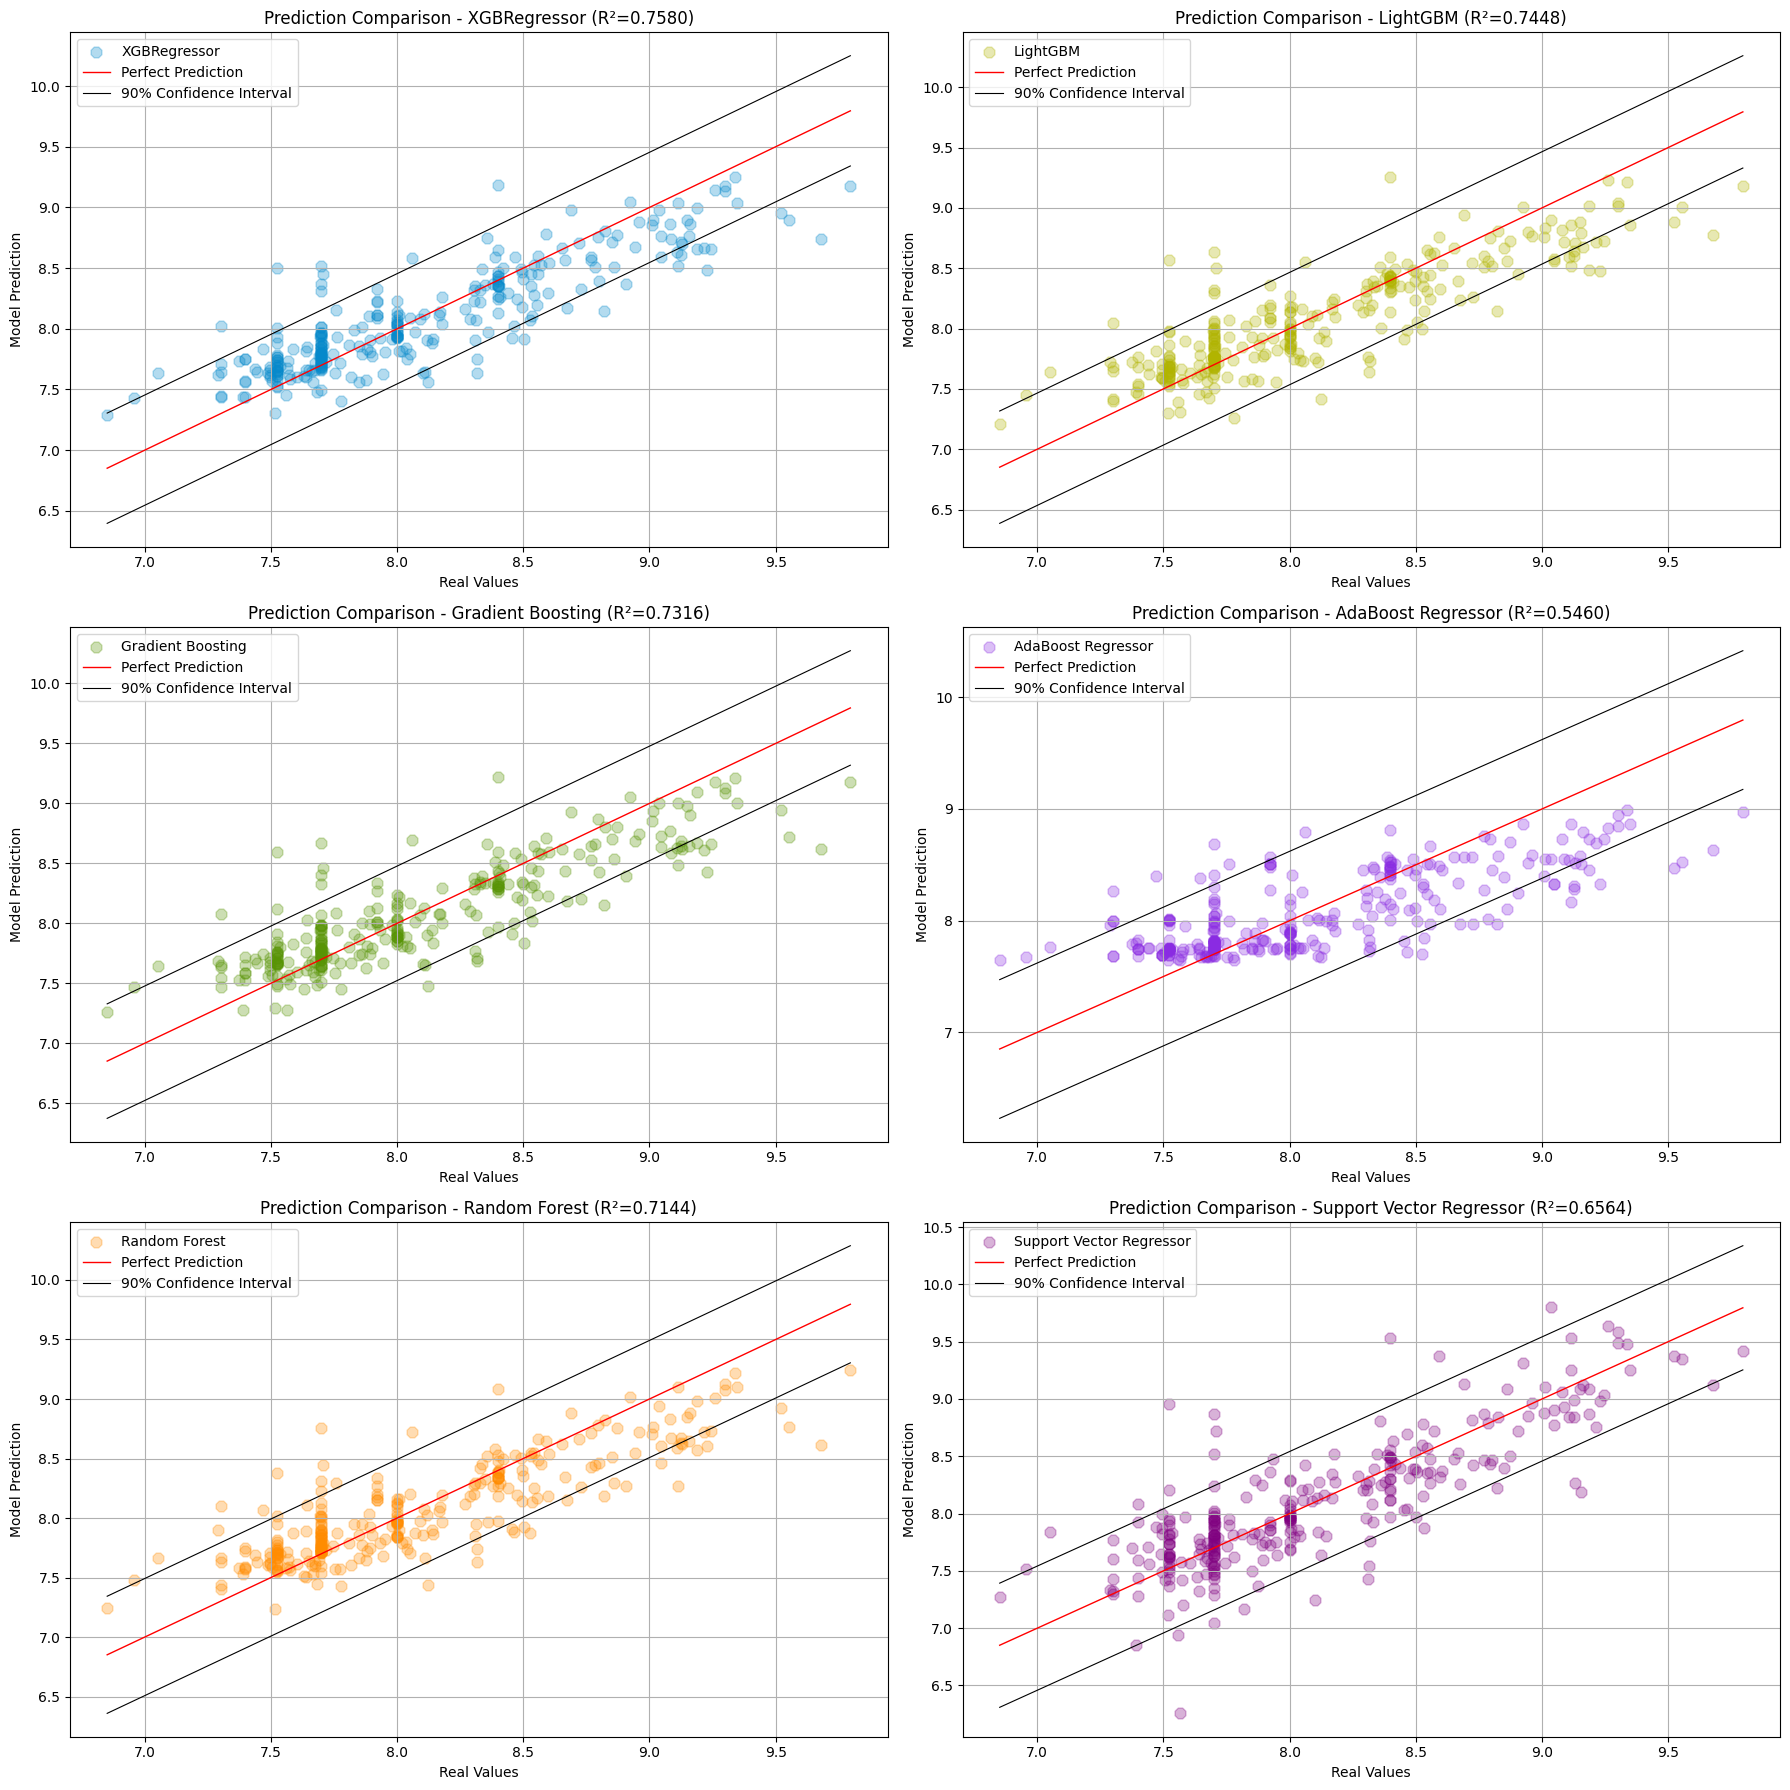

In [124]:
colors = ['#0589cb', '#b1b400', '#589405', '#8A2BE2', '#FF8C00', 'purple', '#7CFC00']

# Configura el gráfico
plt.figure(figsize=(18, 18))

for i, row in result_models_test_df.iterrows():
    # Calcula residuos y desviación estándar para el modelo actual
    residuals = y_test - y_predict_test[i]
    std_residuals = np.std(residuals)
    
    # Define z-score para intervalo de confianza del 90%
    z = stats.norm.ppf(0.95)
    ci_offset = z * std_residuals
    
    # Dibuja el scatter plot y la línea de predicción perfecta
    plt.subplot(3, 2, i + 1)  # Ajusta el diseño de subgráficos según sea necesario
    plt.scatter(y_test, y_predict_test[i], color=colors[i], label=row['model'], alpha=0.3, s=70, marker="8")    
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='r', lw=1, label='Perfect Prediction')

    # Dibuja el intervalo de confianza usando la desviación estándar calculada
    plt.plot([y_test.min(), y_test.max()], [y_test.min() + ci_offset, y_test.max() + ci_offset], color='black', lw=0.8, linestyle='-', label='90% Confidence Interval')
    plt.plot([y_test.min(), y_test.max()], [y_test.min() - ci_offset, y_test.max() - ci_offset], color='black', lw=0.8, linestyle='-')
    
    plt.xlabel('Real Values')
    plt.ylabel('Model Prediction')
    plt.title(f'Prediction Comparison - {row["model"]} (R²={row["R²"]:.4f})')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.savefig("Plots figures/Comparacion_de_test_con_intervalo 2.jpg", bbox_inches='tight')
plt.show()